Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!


# CoronaVirus Prediction

### Number of Day to Predict 21

In [1]:
num_days_R_prediction=21

In [2]:
#!pip install rpy2
import rpy2
%load_ext rpy2.ipython
%Rpush num_days_R_prediction

In [3]:
%%R
max_days_prediction<-num_days_R_prediction

In [4]:
bypass_weather=1 # =1 bypass weather_pi api calls
#
number_past_days_training=12 # =(8/14) * num_days_R_prediction  # Number of Past days on training # max to be on 6.Feb.2020

### Load Data from Github - John Hopkins Institute 

In [5]:
# Get data from Github
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

#url_1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_1 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url_1, error_bad_lines=False)

#url_2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_2 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url_2, error_bad_lines=False)

#url_3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
url_3 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recover = pd.read_csv(url_3, error_bad_lines=False)

# fix region names
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Mainland China", "China")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "United States")

death['Country/Region']= death['Country/Region'].str.replace("Mainland China", "China")
death['Country/Region']= death['Country/Region'].str.replace("US", "United States")

recover['Country/Region']= recover['Country/Region'].str.replace("Mainland China", "China")
recover['Country/Region']= recover['Country/Region'].str.replace("US", "United States")

In [6]:
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                                 NaN             Afghanistan  33.939110   
1                                 NaN                 Albania  41.153300   
2                                 NaN                 Algeria  28.033900   
3                                 NaN                 Andorra  42.506300   
4                                 NaN                  Angola -11.202700   
5                                 NaN     Antigua and Barbuda  17.060800   
6                                 NaN               Argentina -38.416100   
7                                 NaN                 Armenia  40.069100   
8        Australian Capital Territory               Australia -35.473500   
9                     New South Wales               Australia -33.868800   
10                 Northern Territory               Australia -12.463400   
11                         Queensland               Australia -27.469800   
12                    South Australia               Australia -34.928500   
13                           Tasmania               Australia -42.882100   
14                           Victoria               Australia -37.813600   
15                  Western Australia               Australia -31.950500   
16                                NaN                 Austria  47.516200   
17                                NaN              Azerbaijan  40.143100   
18                                NaN                 Bahamas  25.025885   
19                                NaN                 Bahrain  26.027500   
20                                NaN              Bangladesh  23.685000   
21                                NaN                Barbados  13.193900   
22                                NaN                 Belarus  53.709800   
23                                NaN                 Belgium  50.833300   
24                                NaN                   Benin   9.307700   
25                                NaN                  Bhutan  27.514200   
26                                NaN                 Bolivia -16.290200   
27                                NaN  Bosnia and Herzegovina  43.915900   
28                                NaN                  Brazil -14.235000   
29                                NaN                  Brunei   4.535300   
..                                ...                     ...        ...   
236                               NaN             Timor-Leste  -8.874217   
237                               NaN                  Belize  17.189900   
238                               NaN                    Laos  19.856270   
239                               NaN                   Libya  26.335100   
240                               NaN      West Bank and Gaza  31.952200   
241                               NaN           Guinea-Bissau  11.803700   
242                               NaN                    Mali  17.570692   
243                               NaN   Saint Kitts and Nevis  17.357822   
244             Northwest Territories                  Canada  64.825500   
245                             Yukon                  Canada  64.282300   
246                               NaN                  Kosovo  42.602636   
247                               NaN                   Burma  21.916200   
248                          Anguilla          United Kingdom  18.220600   
249            British Virgin Islands          United Kingdom  18.420700   
250          Turks and Caicos Islands          United Kingdom  21.694000   
251                               NaN              MS Zaandam   0.000000   
252                               NaN                Botswana -22.328500   
253                               NaN                 Burundi  -3.373100   
254                               NaN            Sierra Leone   8.460555   
255  Bonaire, Sint Eustatius and Saba             Netherlands  12.178400   
256                               NaN                  Malawi -13.25430

## Get Population

In [7]:
population=pd.read_csv('/home/notebookuser/notebooks/covid19/data/population.csv', sep=',', encoding='latin1') 
confirmed=pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death=pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [8]:
# merge region confirmed + death + recover
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                                 NaN             Afghanistan  33.939110   
1                                 NaN                 Albania  41.153300   
2                                 NaN                 Algeria  28.033900   
3                                 NaN                 Andorra  42.506300   
4                                 NaN                  Angola -11.202700   
5                                 NaN     Antigua and Barbuda  17.060800   
6                                 NaN               Argentina -38.416100   
7                                 NaN                 Armenia  40.069100   
8        Australian Capital Territory               Australia -35.473500   
9                     New South Wales               Australia -33.868800   
10                 Northern Territory               Australia -12.463400   
11                         Queensland               Australia -27.469800   
12                    South Australia               Australia -34.928500   
13                           Tasmania               Australia -42.882100   
14                           Victoria               Australia -37.813600   
15                  Western Australia               Australia -31.950500   
16                                NaN                 Austria  47.516200   
17                                NaN              Azerbaijan  40.143100   
18                                NaN                 Bahamas  25.025885   
19                                NaN                 Bahrain  26.027500   
20                                NaN              Bangladesh  23.685000   
21                                NaN                Barbados  13.193900   
22                                NaN                 Belarus  53.709800   
23                                NaN                 Belgium  50.833300   
24                                NaN                   Benin   9.307700   
25                                NaN                  Bhutan  27.514200   
26                                NaN                 Bolivia -16.290200   
27                                NaN  Bosnia and Herzegovina  43.915900   
28                                NaN                  Brazil -14.235000   
29                                NaN                  Brunei   4.535300   
..                                ...                     ...        ...   
238                               NaN             Timor-Leste  -8.874217   
239                               NaN                  Belize  17.189900   
240                               NaN                    Laos  19.856270   
241                               NaN                   Libya  26.335100   
242                               NaN      West Bank and Gaza  31.952200   
243                               NaN           Guinea-Bissau  11.803700   
244                               NaN                    Mali  17.570692   
245                               NaN   Saint Kitts and Nevis  17.357822   
246             Northwest Territories                  Canada  64.825500   
247                             Yukon                  Canada  64.282300   
248                               NaN                  Kosovo  42.602636   
249                               NaN                   Burma  21.916200   
250                          Anguilla          United Kingdom  18.220600   
251            British Virgin Islands          United Kingdom  18.420700   
252          Turks and Caicos Islands          United Kingdom  21.694000   
253                               NaN              MS Zaandam   0.000000   
254                               NaN                Botswana -22.328500   
255                               NaN                 Burundi  -3.373100   
256                               NaN            Sierra Leone   8.460555   
257  Bonaire, Sint Eustatius and Saba             Netherlands  12.178400   
258                               NaN                  Malawi -13.25430

In [9]:
# merge region death
death.iloc[185:195,:]

Province/State                    Country/Region        Lat        Long  \
185            NaN                            Poland  51.919400   19.145100   
186            NaN                          Portugal  39.399900   -8.224500   
187            NaN                             Qatar  25.354800   51.183900   
188            NaN                           Romania  45.943200   24.966800   
189            NaN                            Russia  61.524010  105.318756   
190            NaN                            Rwanda  -1.940300   29.873900   
191            NaN                       Saint Lucia  13.909400  -60.978900   
192            NaN  Saint Vincent and the Grenadines  12.984300  -61.287200   
193            NaN                        San Marino  43.942400   12.457800   
194            NaN                      Saudi Arabia  23.885942   45.079162   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  7/16/20  \
185        0        0        0        0        0        0  ...     1605   
186        0        0        0        0        0        0  ...     1679   
187        0        0        0        0        0        0  ...      152   
188        0        0        0        0        0        0  ...     1971   
189        0        0        0        0        0        0  ...    11920   
190        0        0        0        0        0        0  ...        4   
191        0        0        0        0        0        0  ...        0   
192        0        0        0        0        0        0  ...        0   
193        0        0        0        0        0        0  ...       42   
194        0        0        0        0        0        0  ...     2370   

     7/17/20  7/18/20  7/19/20  7/20/20  7/21/20  7/22/20  7/23/20  \
185     1612     1618     1624     1627     1636     1642     1651   
186     1682     1684     1689     1691     1697     1702     1705   
187      153      154      157      159      160      163      164   
188     1988     2009     2026     2038     2074     2101     2126   
189    12106    12228    12323    12408    12561    12726    12873   
190        4        5        5        5        5        5        5   
191        0        0        0        0        0        0        0   
192        0        0        0        0        0        0        0   
193       42       42       42       42       42       42       42   
194     2407     2447     2486     2523     2557     2601     2635   

      Population                                 region  
185    37,980,000                            Poland_nan  
186    10,290,000                          Portugal_nan  
187     2,870,256                             Qatar_nan  
188    19,530,000                           Romania_nan  
189   144,500,000                            Russia_nan  
190           NaN                            Rwanda_nan  
191           NaN                       Saint Lucia_nan  
192           NaN  Saint Vincent and the Grenadines_nan  
193        33,916                        San Marino_nan  
194    34,695,447                      Saudi Arabia_nan  

[10 rows x 190 columns]

In [10]:
# merge region recover
recover.iloc[175:185,:]

Province/State    Country/Region        Lat        Long  1/22/20  1/23/20  \
175            NaN              Oman  21.512583   55.923255        0        0   
176            NaN          Pakistan  30.375300   69.345100        0        0   
177            NaN            Panama   8.538000  -80.782100        0        0   
178            NaN  Papua New Guinea  -6.314993  143.955550        0        0   
179            NaN          Paraguay -23.442500  -58.443800        0        0   
180            NaN              Peru  -9.190000  -75.015200        0        0   
181            NaN       Philippines  12.879721  121.774017        0        0   
182            NaN            Poland  51.919400   19.145100        0        0   
183            NaN          Portugal  39.399900   -8.224500        0        0   
184            NaN             Qatar  25.354800   51.183900        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  7/16/20  7/17/20  7/18/20  \
175        0        0        0        0  ...    40090    41450    42772   
176        0        0        0        0  ...   178737   198509   204276   
177        0        0        0        0  ...    25842    26520    27494   
178        0        0        0        0  ...        8        8        8   
179        0        0        0        0  ...     1379     1481     1643   
180        0        0        0        0  ...   230994   233982   238086   
181        0        0        0        0  ...    21440    21748    22067   
182        0        0        0        0  ...    28928    29505    29924   
183        0        0        0        0  ...    32476    32790    33153   
184        0        0        0        0  ...   102168   102597   103023   

     7/19/20  7/20/20  7/21/20  7/22/20  7/23/20   Population   \
175    44004    45150    46608    47922    51349     4,636,000   
176   205929   208030   210468   213175   219783   197,000,000   
177    28482    29164    30075    31122    31828     4,299,739   
178        8        8        8        8       11           NaN   
179     1918     2171     2307     2391     2487     7,111,652   
180   241955   245081   248746   252246   255945    32,870,710   
181    22465    23072    23281    23623    24383   104,900,000   
182    30292    30539    30771    31139    31541    37,980,000   
183    33369    33547    33769    33999    34369    10,290,000   
184   103377   103782   104191   104641   105018     2,870,256   

                   region  
175              Oman_nan  
176          Pakistan_nan  
177            Panama_nan  
178  Papua New Guinea_nan  
179          Paraguay_nan  
180              Peru_nan  
181       Philippines_nan  
182            Poland_nan  
183          Portugal_nan  
184             Qatar_nan  

[10 rows x 190 columns]

In [11]:
confirmed.iloc[185:195,:]

Province/State                    Country/Region        Lat        Long  \
185            NaN                            Poland  51.919400   19.145100   
186            NaN                          Portugal  39.399900   -8.224500   
187            NaN                             Qatar  25.354800   51.183900   
188            NaN                           Romania  45.943200   24.966800   
189            NaN                            Russia  61.524010  105.318756   
190            NaN                            Rwanda  -1.940300   29.873900   
191            NaN                       Saint Lucia  13.909400  -60.978900   
192            NaN  Saint Vincent and the Grenadines  12.984300  -61.287200   
193            NaN                        San Marino  43.942400   12.457800   
194            NaN                      Saudi Arabia  23.885942   45.079162   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  7/16/20  \
185        0        0        0        0        0        0  ...    39054   
186        0        0        0        0        0        0  ...    47765   
187        0        0        0        0        0        0  ...   105477   
188        0        0        0        0        0        0  ...    35003   
189        0        0        0        0        0        0  ...   751612   
190        0        0        0        0        0        0  ...     1473   
191        0        0        0        0        0        0  ...       23   
192        0        0        0        0        0        0  ...       35   
193        0        0        0        0        0        0  ...      699   
194        0        0        0        0        0        0  ...   243238   

     7/17/20  7/18/20  7/19/20  7/20/20  7/21/20  7/22/20  7/23/20  \
185    39407    39746    40104    40383    40782    41162    41580   
186    48077    48390    48636    48771    48898    49150    49379   
187   105898   106308   106648   107037   107430   107871   108244   
188    35802    36691    37458    38139    39133    40163    41275   
189   758001   764215   770311   776212   782040   787890   793720   
190     1485     1539     1582     1629     1655     1689     1710   
191       23       23       23       23       23       23       24   
192       35       38       44       50       50       52       52   
193      699      699      699      699      699      699      699   
194   245851   248416   250920   253349   255825   258156   260394   

      Population                                 region  
185    37,980,000                            Poland_nan  
186    10,290,000                          Portugal_nan  
187     2,870,256                             Qatar_nan  
188    19,530,000                           Romania_nan  
189   144,500,000                            Russia_nan  
190           NaN                            Rwanda_nan  
191           NaN                       Saint Lucia_nan  
192           NaN  Saint Vincent and the Grenadines_nan  
193        33,916                        San Marino_nan  
194    34,695,447                      Saudi Arabia_nan  

[10 rows x 190 columns]

In [12]:
confirmed.iloc[220:230,:]

Province/State  Country/Region        Lat        Long  1/22/20  1/23/20  \
220   Cayman Islands  United Kingdom  19.313300  -81.254600        0        0   
221  Channel Islands  United Kingdom  49.372300   -2.364400        0        0   
222        Gibraltar  United Kingdom  36.140800   -5.353600        0        0   
223      Isle of Man  United Kingdom  54.236100   -4.548100        0        0   
224       Montserrat  United Kingdom  16.742498  -62.187366        0        0   
225              NaN  United Kingdom  55.378100   -3.436000        0        0   
226              NaN         Uruguay -32.522800  -55.765800        0        0   
227              NaN   United States  40.000000 -100.000000        1        1   
228              NaN      Uzbekistan  41.377491   64.585262        0        0   
229              NaN       Venezuela   6.423800  -66.589700        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  7/16/20  7/17/20  7/18/20  \
220        0        0        0        0  ...      203      203      203   
221        0        0        0        0  ...      583      583      583   
222        0        0        0        0  ...      180      180      180   
223        0        0        0        0  ...      336      336      336   
224        0        0        0        0  ...       12       12       12   
225        0        0        0        0  ...   292552   293239   294066   
226        0        0        0        0  ...     1026     1037     1044   
227        2        2        5        5  ...  3576157  3647715  3711413   
228        0        0        0        0  ...    15066    15607    16186   
229        0        0        0        0  ...    10854    11191    11483   

     7/19/20  7/20/20  7/21/20  7/22/20  7/23/20   Population   \
220      203      203      203      203      203           NaN   
221      583      583      583      583      583       173,519   
222      180      180      180      182      184        33,693   
223      336      336      336      336      336        84,939   
224       12       12       12       12       12         4,991   
225   294792   295372   295817   296377   297146    66,440,000   
226     1054     1064     1096     1117     1141     3,471,150   
227  3773260  3834677  3899211  3970085  4038748   327,200,000   
228    16752    17149    17881    18379    18986    33,363,556   
229    11891    12334    12774    13164    13613           NaN   

                             region  
220   United Kingdom_Cayman Islands  
221  United Kingdom_Channel Islands  
222        United Kingdom_Gibraltar  
223      United Kingdom_Isle of Man  
224       United Kingdom_Montserrat  
225              United Kingdom_nan  
226                     Uruguay_nan  
227               United States_nan  
228                  Uzbekistan_nan  
229                   Venezuela_nan  

[10 rows x 190 columns]

## Create Time Series + Plots

In [13]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long',' Population '], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [14]:
## JOAO - Fix - Drop Duplicates # Keep Last # Issue With Data source Change from John Hopkins institute
#
ts=create_ts(confirmed.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_d=create_ts(death.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_rec=create_ts(recover.drop_duplicates(subset=['region'], keep='last', inplace=False) )

In [15]:
# JOAO - FIX - Automation WarmUp of Plot Library
import matplotlib.pyplot as plt
import time
plt.legend(loc = 'upper left')
plt.show()

No handles with labels found to put in legend.


<Figure size 640x480 with 1 Axes>

Text(0.5, 1.0, 'Daily Update - Total Recovered - Major_4,25 2nd Areas')

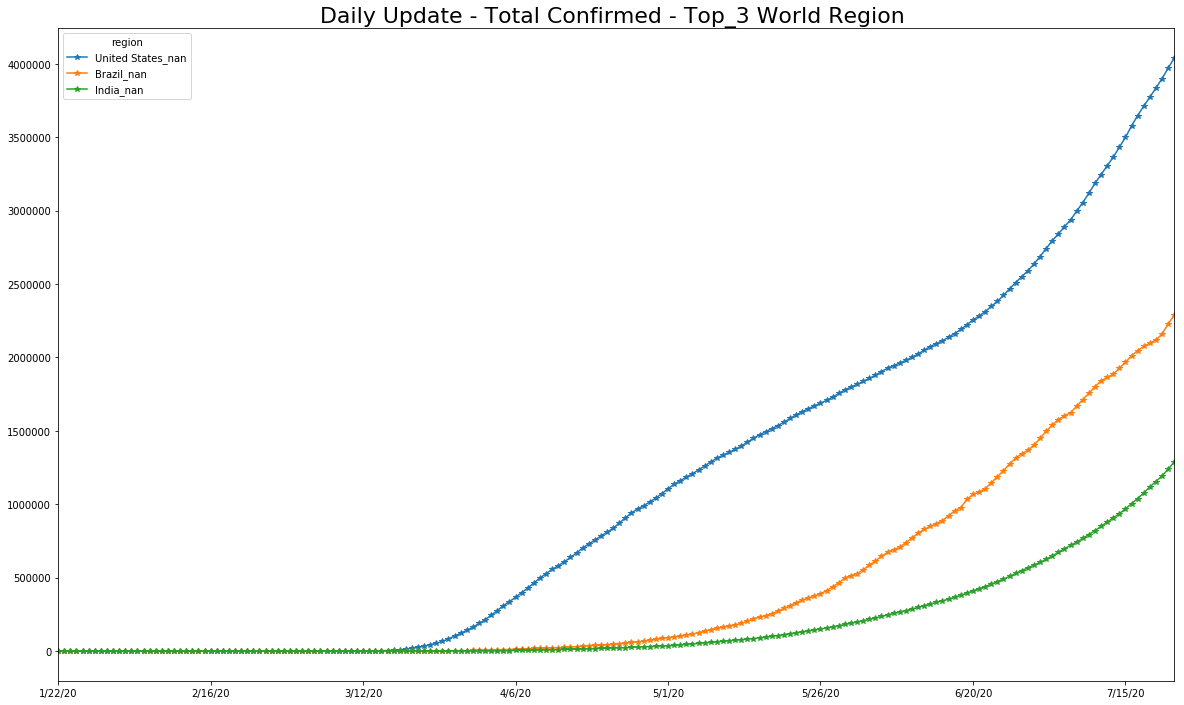

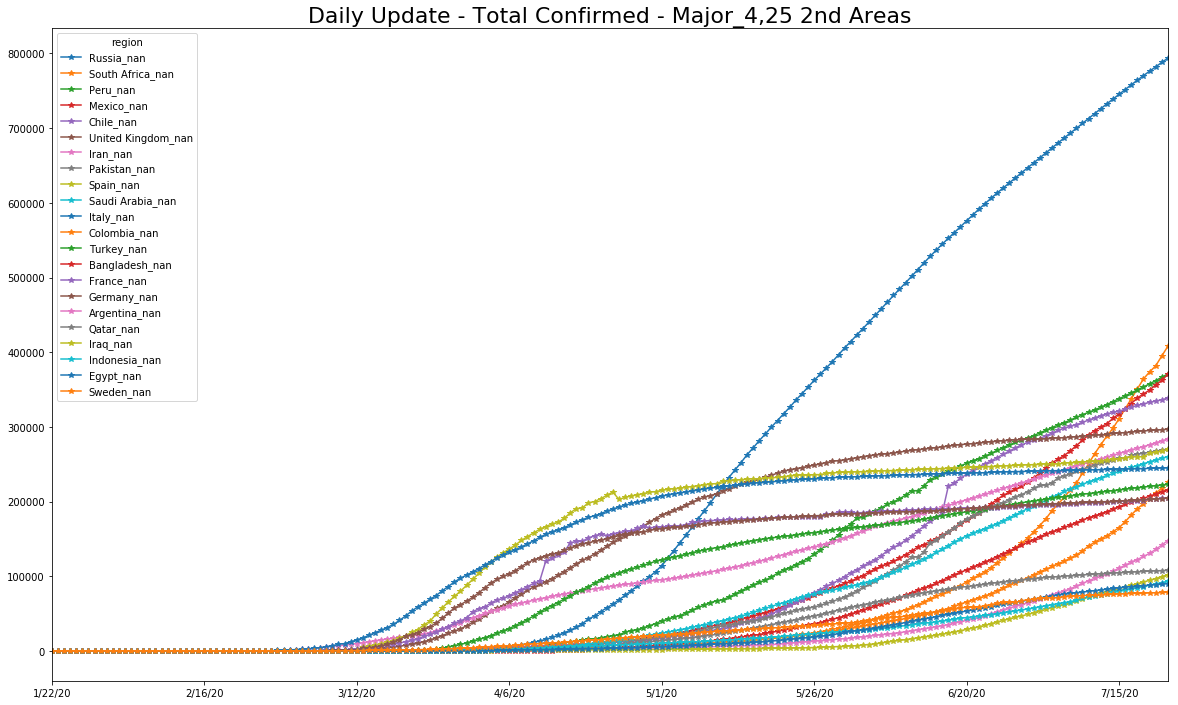

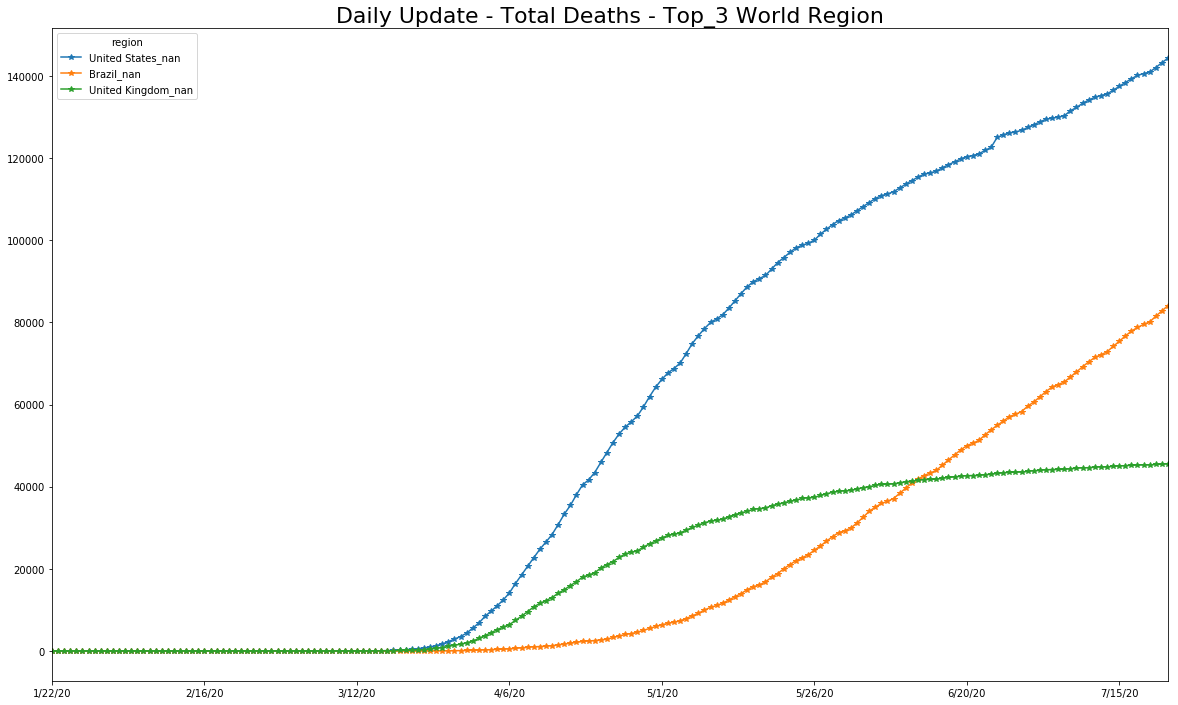

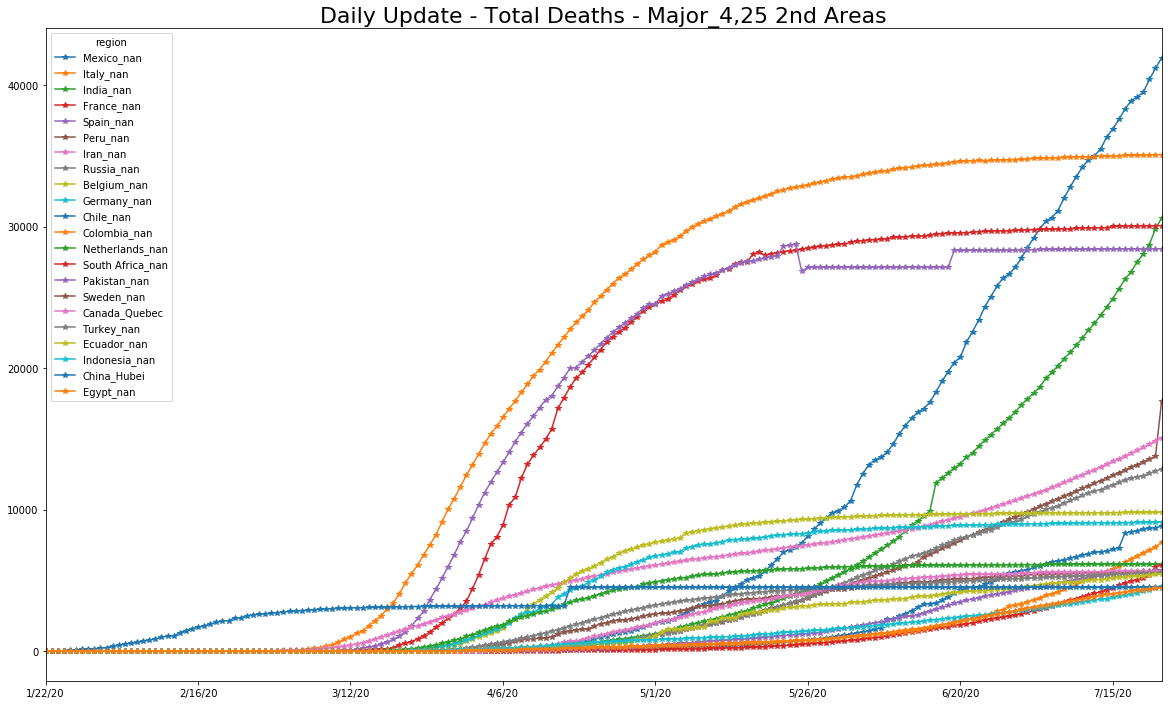

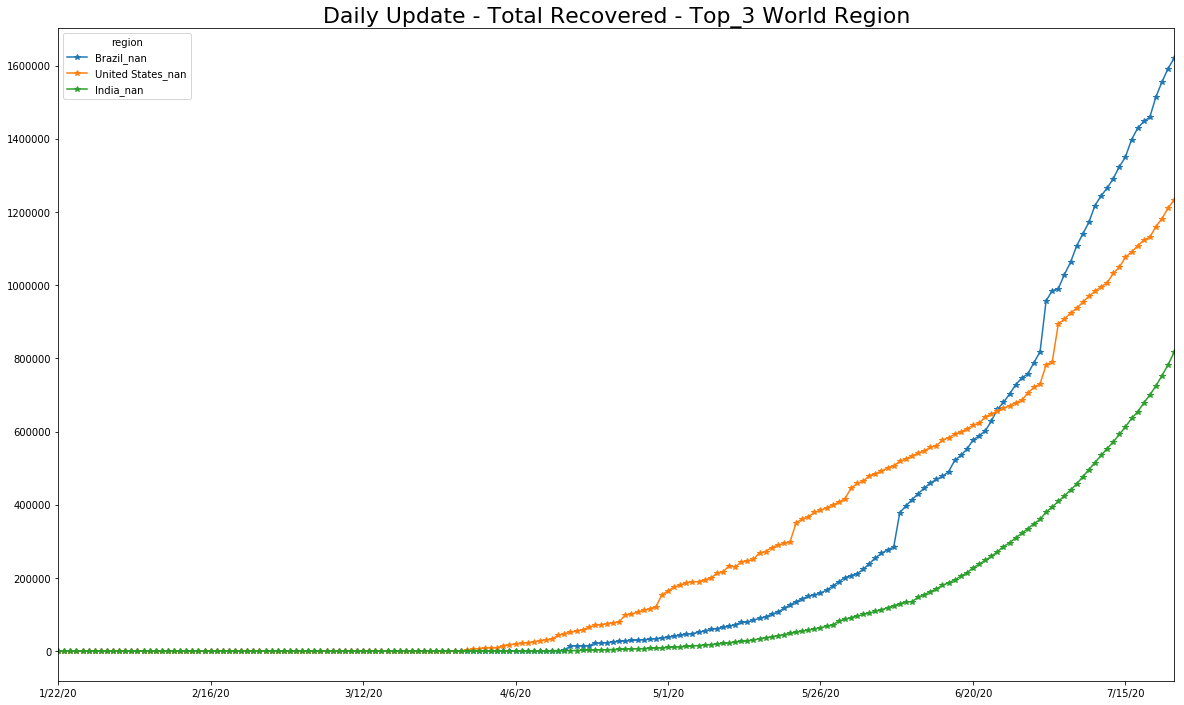

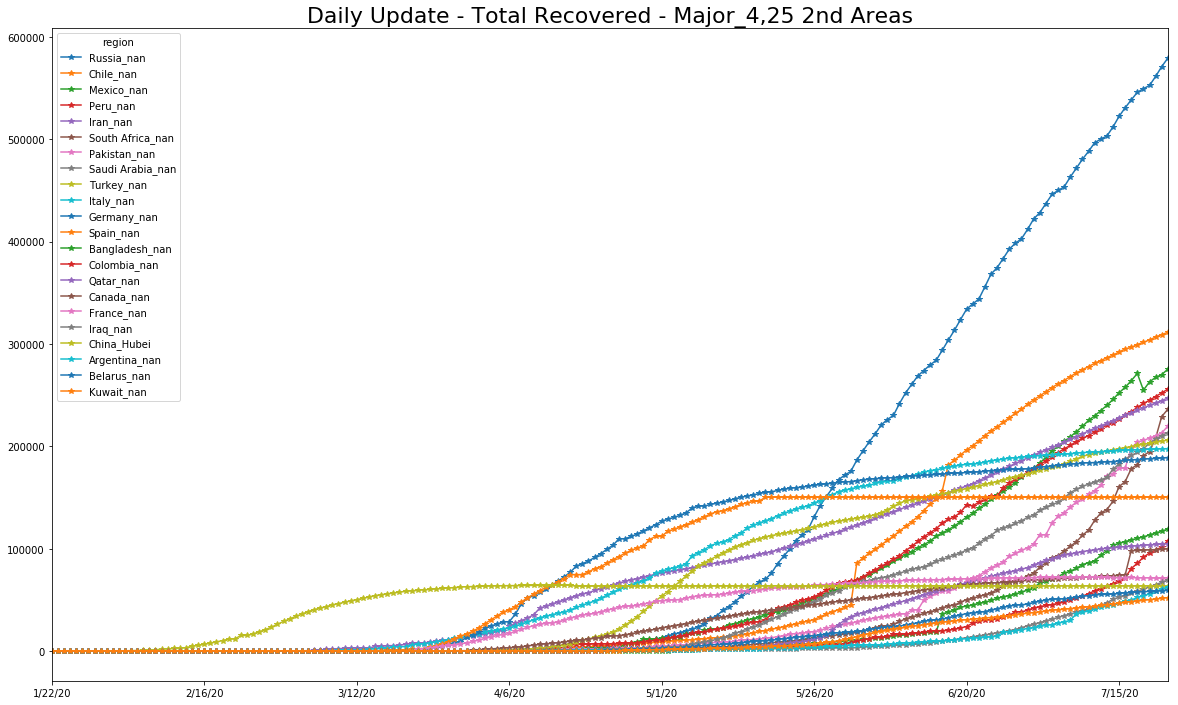

In [16]:
#
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Top_3 World Region ',fontdict={'fontsize': 22})
p.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts_d.max().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Top_3 World Region',fontdict={'fontsize': 22})
p_d.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_r=ts_rec.reindex(ts_rec.max().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Top_3 World Region',fontdict={'fontsize': 22})
p_r.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

### Extract Weather Data

In [17]:
#!pip install pyweatherbit
#
from weatherbit.api import Api
import json  
import pandas as pd  
from pandas.io.json import json_normalize 

### API - Joao
from datetime import datetime
#
#api_key="46f953cbca334ea1b85ab5d47dbc9aa0" # joao@fuelbigdata.com
api_key="27a4e12ebc7f41b2bd6e300015f1a090" # jpacerqueira.consult.bigdata@gmail.com
#

api = Api(api_key)
api.set_granularity('daily')

# # Set the granularity of the API - Options: ['daily','hourly','3hourly']
# # Will only affect forecast requests.

#api.get_forecast(lat='Lat', lon='Lon')
#my_end_date=datetime.today().strftime('%Y-%m-%d')

#### United Kingdom
#lat1='55.378100'
#lon1='-3.436000'
#api.get_history(lat=lat1,lon=lon1, start_date='2020-03-29',end_date=my_end_date)


In [18]:
##
#### My List of Countries and Regions to train and represent data
my_train_list=[
 ### JOAO - LIST of Countries - Start here
     #   'Andorra_nan', 
        'United States_nan',
        'United Kingdom_nan',
        'Italy_nan',
        'Spain_nan',  
        'Netherlands_nan',
        'France_nan', 
        'Belgium_nan',
        'Portugal_nan',
        'Switzerland_nan',
        'Germany_nan',
        'Japan_nan',
        'Poland_nan',
  ### JOAO - LIST of Countries - Finish here
        'Korea, South_nan',
        'China_Hubei',
        'China_Beijing',
        'China_Guangdong',
        'China_Shanghai',
      #  'China_Shanxi',
      #  'China_Sichuan',  'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'China_Anhui', 'China_Beijing',
      #  'China_Chongqing', 'China_Fujian', 'China_Gansu',
      #  'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
      #  'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
      #  'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
      #  'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
      #  'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
      #  'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      #  'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'Morocco_nan',
        'Australia_New South Wales',
      # 'Australia_Queensland',
      # 'Australia_South Australia', 'Australia_Victoria', 
        'Brazil_nan',
      # 'Cambodia_nan',
      # 'Canada_British Columbia',
        'Canada_Ontario',
        'Canada_Quebec',
      # 'Egypt_nan',
        'China_Hong Kong',
        'China_Macau',
        'Finland_nan',
        'India_nan',
        'Iran_nan',
        'Malaysia_nan',
      # 'Nepal_nan',
        'Norway_nan',
        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
     #  'Sri Lanka_nan', 'Thailand_nan', 'United Arab Emirates_nan',
        'Sweden_nan',
        'Austria_nan',
     #  'Taiwan*_nan', 
     #  'Vietnam_nan',
        'Turkey_nan',
        'Peru_nan',
        'Chile_nan',
        'Mexico_nan'
       ]
#

#### Weather History

In [19]:
# ################## already done since API is limited to 500 call per day
## consume Wether data From 15/03/2020 forward to end_date=30/03/2020
#
### Location in confirmed array to start in pos 1='Albania_nan' 61 = 'China_Hong Kong'
### Only run for Countries in above : my_train_list 
vpos=len(confirmed.iloc[1])-1 #90# 89 #88 #87 #86 #85 #84 #83 #82 #81 #80 #79 #78 #77 #76 #75 #74 #1 #73
print('xcountry_region='+confirmed.iloc[1,vpos])

my_weather_fetch_list= my_train_list # ['Canada_Quebec'] #  ['Iran_nan'] #['Brazil_nan'] #

start_date_init=pd.to_datetime('today').strftime('%Y/%m/%d') # '2020-04-18'
print('start_date_init=',start_date_init)
offset_days=-1 # -1 to start yesterday pick today # API free-tier just picks one per api call!
max_days=1 #1

w=pd.DataFrame(columns=['date','region','min','max'])
if bypass_weather != 1 :
    for h in range(0,max_days):
        offset_days=h
        start_date=pd.to_datetime(start_date_init)
        #
        end_date=(start_date+pd.DateOffset(days=offset_days+1)).strftime('%Y-%m-%d')
        start_date=(start_date+pd.DateOffset(days=offset_days)).strftime('%Y-%m-%d')
        prnt_start_date=pd.to_datetime(start_date).strftime('%Y/%m/%d')
        prnt_end_date=pd.to_datetime(end_date).strftime('%Y/%m/%d')
        #
        for i in range (1,len(confirmed)):
            if confirmed.iloc[i,vpos] not in my_weather_fetch_list:
                continue
            if confirmed.iloc[i,vpos] in my_weather_fetch_list:
                #
                # Clean JSON structure return from API Call
                jas=""
                jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date,end_date=end_date).json
                if (((json_normalize(jas['data'])['min_temp'].values[0])=='')
                     or (np.isnan((json_normalize(jas['data'])['min_temp'].values[0])) == True )):
                    continue
                try:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
                except Exception:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':None,'max':None}, ignore_index=True)
    #        
#
table_columns=['date','region','min','max']
w = w[w.columns.intersection(table_columns)]

xcountry_region=Albania_nan
start_date_init= 2020/07/24


In [20]:
w.to_csv('data/w_v2_v227.csv', index = False, header=True)

In [21]:
w[:]

Empty DataFrame
Columns: [date, region, min, max]
Index: []

## Kalman Filter With R

In [22]:
# Joao - FIX - Improve Performance 
### Drop the Months of Jan, Feb < 06/02 as
### they are too in the Past and model no longuer trains in China Hubei only!

ts=ts[15:]
ts_d=ts_d[15:]
ts_rec=ts_rec[15:]

In [23]:
ts[:3]

region  Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
2/6/20                0            0            0            0           0   
2/7/20                0            0            0            0           0   
2/8/20                0            0            0            0           0   

region  Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
2/6/20                        0              0            0   
2/7/20                        0              0            0   
2/8/20                        0              0            0   

region  Australia_Australian Capital Territory  Australia_New South Wales  \
2/6/20                                       0                          4   
2/7/20                                       0                          4   
2/8/20                                       0                          4   

region  ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Venezuela_nan  \
2/6/20  ...                 11            0               0              0   
2/7/20  ...                 11            0               0              0   
2/8/20  ...                 11            0               0              0   

region  Vietnam_nan  West Bank and Gaza_nan  Western Sahara_nan  Yemen_nan  \
2/6/20           10                       0                   0          0   
2/7/20           10                       0                   0          0   
2/8/20           13                       0                   0          0   

region  Zambia_nan  Zimbabwe_nan  
2/6/20           0             0  
2/7/20           0             0  
2/8/20           0             0  

[3 rows x 266 columns]

In [24]:
ts[-4:]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
7/20/20            35526         4171        23691          884         749   
7/21/20            35615         4290        24278          884         779   
7/22/20            35727         4358        24872          889         812   
7/23/20            35928         4466        25484          889         851   

region   Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
7/20/20                       76         130774        34981   
7/21/20                       76         136118        35254   
7/22/20                       76         141900        35693   
7/23/20                       76         148027        36162   

region   Australia_Australian Capital Territory  Australia_New South Wales  \
7/20/20                                     113                       3599   
7/21/20                                     113                       3614   
7/22/20                                     113                       3633   
7/23/20                                     113                       3640   

region   ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Venezuela_nan  \
7/20/20  ...            3834677         1064           17149          12334   
7/21/20  ...            3899211         1096           17881          12774   
7/22/20  ...            3970085         1117           18379          13164   
7/23/20  ...            4038748         1141           18986          13613   

region   Vietnam_nan  West Bank and Gaza_nan  Western Sahara_nan  Yemen_nan  \
7/20/20          384                    8916                  10       1619   
7/21/20          401                    9228                  10       1629   
7/22/20          408                    9398                  10       1640   
7/23/20          412                    9744                  10       1654   

region   Zambia_nan  Zimbabwe_nan  
7/20/20        3326          1713  
7/21/20        3386          1820  
7/22/20        3583          2034  
7/23/20        3789          2124  

[4 rows x 266 columns]

In [25]:
# Create data for R script
ts_conf=ts.reset_index()
ts_conf=ts_conf.rename(columns = {'index':'date'})
ts_conf['date']=pd.to_datetime(ts_conf['date'] ,errors ='coerce')
ts_conf.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv')

ts_rec=ts_rec.reset_index()
ts_rec=ts_rec.rename(columns = {'index':'date'})
ts_rec['date']=pd.to_datetime(ts_rec['date'] ,errors ='coerce')
ts_rec.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_rec_r.csv')


ts_d=ts_d.reset_index()
ts_d=ts_d.rename(columns = {'index':'date'})
ts_d['date']=pd.to_datetime(ts_d['date'] ,errors ='coerce')
ts_d.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_d_r.csv')


In [26]:
%%R

#install.packages('pracma')
#install.packages('Metrics')
#install.packages('readr')
#install.packages('reshape')

Sys.setenv(TZ='GMT')
Sys.timezone()

[1] "GMT"


In [27]:
%%R
require(pracma)
require(Metrics)
require(readr)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

R[write to console]: Loading required package: pracma

R[write to console]: Loading required package: Metrics

R[write to console]: Loading required package: readr

R[write to console]: Parsed with column specification:
cols(
  .default = col_double(),
  date = col_date(format = "")
)

R[write to console]: See spec(...) for full column specifications.



In [28]:
p=%R pred_all

In [29]:
############ Merge R output due to package problem
### Joao FIX - 
# t=ts_d    -  deaths
# t=ts_rec  -  recovered
# t=ts      -  confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
temp=temp.reset_index(drop=True)
temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']

# JOAO - FIX - temp fixed
# Y,X,X2 nan issue from p revolved

p_pd=pd.DataFrame(p,columns=['Y','X','X2'])

p_pd['nindex'] = range(1, 1+len(p_pd))
temp['nindex']= range(1,1+len(temp))

#temp_1 = temp.join(p_pd)
temp_1 = temp.merge(p_pd, on='nindex', how='inner', suffixes=('_1', '_2')).rename(columns={"Y_2": "Y", "X_2": "X", "X2_2" : "X2"})
temp_1 = temp_1.drop(columns=['Y_1', 'X_1','X2_1','nindex'])


temp=temp_1
temp.to_csv(r'/home/notebookuser/notebooks/covid19/data/temp.csv')

## Pre Proccessing Data for ML Model

### Extract Weather Forecast Data

In [30]:
#
### Joao - Test Later Weather from new file : w_v2.csv and w_v2_v2.csv
w_v2=pd.read_csv('data/w_v2.csv', sep=',', encoding='latin1')
w_v2['date']=pd.to_datetime(w_v2['date'],format='%Y/%m/%d')

w_v2_v2=pd.read_csv('data/w_v2_v2.csv', sep=',', encoding='latin1')
w_v2_v2['date']=pd.to_datetime(w_v2_v2['date'],format='%Y/%m/%d')

w_v2_v227=pd.read_csv('data/w_v2_v227.csv', sep=',', encoding='latin1')
w_v2_v227['date']=pd.to_datetime(w_v2_v227['date'],format='%Y/%m/%d')

w=pd.read_csv('data/w.csv', sep=',', encoding='latin1')
w['date']=pd.to_datetime(w['date'],format='%d/%m/%Y')

w_forecast=pd.read_csv('data/w_forecast.csv', sep=',', encoding='latin1')
w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%d/%m/%Y')

### Append Weather fetched now to file w_v2_v2
w_n_forward=w_v2_v2.append(w_v2_v227) 
w_n_forward=w_n_forward.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_n_forward=w_n_forward.sort_values(by=['region','date'], ascending=True)
w_n_forward.to_csv(r'data/w_v2_v2.csv', index = False, header=True)

In [31]:
w_total=pd.DataFrame(columns=['date','region','min','max'])
w_total=w.append(w_forecast).append(w_v2).append(w_v2_v2).append(w_v2_v227) 
w_total=w_total.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_total=w_total.sort_values(by=['region','date'], ascending=True)

w_total.to_csv(r'data/w_total.csv', index = False, header=True)

In [32]:
w_in_model=pd.read_csv('data/w_total.csv', sep=',', encoding='latin1')
#
w_in_model['date']=pd.to_datetime(w_in_model['date'],format='%Y/%m/%d')
w_in_model.to_csv(r'data/w_in_model.csv', index = False, header=True)

In [33]:
w_in_model.tail(2)

date       region   min   max
6899 2020-05-10  Vietnam_nan  26.9  33.0
6900 2020-05-11  Vietnam_nan  25.0  33.0

### Build Train Set Data Structure

In [34]:
### JOAO - Fix -
## t=ts confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)

In [35]:
### JOAO - Fix -
t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
#
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
for i in range(1,len(t)):
    if(t.iloc[i,1] is t.iloc[i-2,1]):
        t.iloc[i,3]=t.iloc[i-1,2]-t.iloc[i-2,2]
        t.iloc[i,6]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-2,2]*100 -1 +1))*100
        t.iloc[i,9]=t.iloc[i-1,2]
    if(t.iloc[i,1] is t.iloc[i-4,1]):
        t.iloc[i,4]=t.iloc[i-1,2]-t.iloc[i-4,2]
        t.iloc[i,7]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-4,2]*100 -1 +1))*100
    if(t.iloc[i,1] is t.iloc[i-8,1]):
        t.iloc[i,5]=t.iloc[i-1,2]-t.iloc[i-8,2]
        t.iloc[i,8]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-8,2]*100 -1 +1))*100
t=t.fillna(0)  
t=t.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)

### Joao - Fix NaN Kalman_Filter
t['kalman_prediction']=np.nan_to_num(t['kalman_prediction'])
t['kalman_prediction']=round(t['kalman_prediction'])

#
train=t.merge(confirmed[['region',' Population ']],how='left',on='region')
train=train.rename(columns = {' Population ':'population'})
train['population']=train['population'].str.replace(r" ", '')
train['population']=train['population'].str.replace(r",", '')
train['population']=train['population'].fillna(10000000) ### Fill 10M if nan
train['population']=train['population'].astype('int32')
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
# train['infected_rate']=train['last_day']/train['population']*10000
train['infected_rate']=(((train['last_day'] +1)*100)/((train['population'] +1)*100000) *10) # *100 - % converter
 #
#### Joao , merge w weather only !?!
##train=train.merge(w,how='left',on=['date','region'])
train=train.merge(w_in_model,how='left',on=['date','region'])
#
train=train.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(train)):
    if(np.isnan(train.iloc[i,13])):
        if(train.iloc[i,1] is train.iloc[i-1,1]):
            train.iloc[i,13]=train.iloc[i-1,13]
            train.iloc[i,14]=train.iloc[i-1,14]

/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in long_scalars
  
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  if sys.path[0] == '':
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in long_scalars
  from ipykernel import kernelapp as app


In [36]:
# Joao - Fix - Nulls are an issue
train_notnull=train[train['kalman_prediction'] != 0.0 ] #.any(axis=1)]
train_notnull[:]

date           region  confirmed  1_day_change  3_day_change  \
19    2020-02-25  Afghanistan_nan          1             1             1   
20    2020-02-26  Afghanistan_nan          1             0             1   
21    2020-02-27  Afghanistan_nan          1             0             1   
22    2020-02-28  Afghanistan_nan          1             0             0   
23    2020-02-29  Afghanistan_nan          1             0             0   
24    2020-03-01  Afghanistan_nan          1             0             0   
25    2020-03-02  Afghanistan_nan          1             0             0   
26    2020-03-03  Afghanistan_nan          1             0             0   
27    2020-03-04  Afghanistan_nan          1             0             0   
28    2020-03-05  Afghanistan_nan          1             0             0   
29    2020-03-06  Afghanistan_nan          1             0             0   
30    2020-03-07  Afghanistan_nan          1             0             0   
31    2020-03-08  Afghanistan_nan          4             0             0   
32    2020-03-09  Afghanistan_nan          4             3             3   
33    2020-03-10  Afghanistan_nan          5             0             3   
34    2020-03-11  Afghanistan_nan          7             1             4   
35    2020-03-12  Afghanistan_nan          7             2             3   
36    2020-03-13  Afghanistan_nan          7             0             3   
37    2020-03-14  Afghanistan_nan         11             0             2   
38    2020-03-15  Afghanistan_nan         16             4             4   
39    2020-03-16  Afghanistan_nan         21             5             9   
40    2020-03-17  Afghanistan_nan         22             5            14   
41    2020-03-18  Afghanistan_nan         22             1            11   
42    2020-03-19  Afghanistan_nan         22             0             6   
43    2020-03-20  Afghanistan_nan         24             0             1   
44    2020-03-21  Afghanistan_nan         24             2             2   
45    2020-03-22  Afghanistan_nan         40             0             2   
46    2020-03-23  Afghanistan_nan         40            16            18   
47    2020-03-24  Afghanistan_nan         74             0            16   
48    2020-03-25  Afghanistan_nan         84            34            50   
...          ...              ...        ...           ...           ...   
45530 2020-06-25     Zimbabwe_nan        551             5            41   
45531 2020-06-26     Zimbabwe_nan        561            21            39   
45532 2020-06-27     Zimbabwe_nan        567            10            36   
45533 2020-06-28     Zimbabwe_nan        567             6            37   
45534 2020-06-29     Zimbabwe_nan        574             0            16   
45535 2020-06-30     Zimbabwe_nan        591             7            13   
45536 2020-07-01     Zimbabwe_nan        605            17            24   
45537 2020-07-02     Zimbabwe_nan        617            14            38   
45538 2020-07-03     Zimbabwe_nan        625            12            43   
45539 2020-07-04     Zimbabwe_nan        698             8            34   
45540 2020-07-05     Zimbabwe_nan        716            73            93   
45541 2020-07-06     Zimbabwe_nan        734            18            99   
45542 2020-07-07     Zimbabwe_nan        787            18           109   
45543 2020-07-08     Zimbabwe_nan        885            53            89   
45544 2020-07-09     Zimbabwe_nan        885            98           169   
45545 2020-07-10     Zimbabwe_nan        942             0           151   
45546 2020-07-11     Zimbabwe_nan        982            57           155   
45547 2020-07-12     Zimbabwe_nan        985            40            97   
45548 2020-07-13     Zimbabwe_nan       1034             3           100   
45549 2020-07-14     Zimbabwe_nan       1064            49            92   
45550 2020-07-15     Zimbabwe_nan       1089            30  

In [37]:
# Joao - Fix - Nulls are an issue
train_nulls=train[train['kalman_prediction'].isnull() ] #.any(axis=1)]
train_nulls[:]

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [38]:
# Joao - Fix - Nulls are an issue

train_nulls=train[train.isnull().any(axis=1)]
train_nulls[:]
train[-1:]

date        region  confirmed  1_day_change  3_day_change  \
45559 2020-07-24  Zimbabwe_nan          0            90           411   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
45559           762          104.42527         123.993579         155.947871   

       last_day  kalman_prediction  population  infected_rate  min  max  
45559      2124             2237.0    14862924       0.000001  NaN  NaN

In [39]:
train.to_csv(r'data/train.csv', index = False, header=True)

##Shared -- Ratio in Confirmed - 21Day Forecast -- train 25April2020 - I
ratiod=pd.read_csv('data/train.csv', sep=',', encoding='latin1')
todayd=datetime.today().strftime('%Y-%m-%d')
ratiofn="World v2 -- Confirmed - "+str(num_days_R_prediction)+"Day Forecast -- train "+todayd+".csv"

ratiod['population_percentage : infected_rate confirmed']=ratiod['infected_rate']*100
ratiod['population_percentage : factor 9/10 infected_rate confirmed']=ratiod['infected_rate']*1000
ratiod['delta : new_cases']=ratiod['kalman_prediction']-ratiod['last_day']
ratiod['delta : new_cases per 1M hab']=ratiod['delta : new_cases']/ratiod['population']*1000000
ratiod=ratiod.rename(columns={'kalman_prediction': 'confirmed_prediction', 'last_day': 'confirmed_yesterday'})

ratiod.to_csv(r'data/'+ratiofn, index = False, header=True)

ratiod[-3:]

date        region  confirmed  1_day_change  3_day_change  \
45557  2020-07-22  Zimbabwe_nan       2034           107           342   
45558  2020-07-23  Zimbabwe_nan       2124           214           423   
45559  2020-07-24  Zimbabwe_nan          0            90           411   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
45557           756         106.246935         123.140054         171.053571   
45558           945         111.758791         126.257604         186.777778   
45559           762         104.425270         123.993579         155.947871   

       confirmed_yesterday  confirmed_prediction  population  infected_rate  \
45557                 1820                1914.0    14862924       0.000001   
45558                 2034                2095.0    14862924       0.000001   
45559                 2124                2237.0    14862924       0.000001   

       min  max  population_percentage : infected_rate confirmed  \
45557  NaN  NaN                                         0.000123   
45558  NaN  NaN                                         0.000137   
45559  NaN  NaN                                         0.000143   

       population_percentage : factor 9/10 infected_rate confirmed  \
45557                                           0.001225             
45558                                           0.001369             
45559                                           0.001430             

       delta : new_cases  delta : new_cases per 1M hab  
45557               94.0                      6.324462  
45558               61.0                      4.104172  
45559              113.0                      7.602811

## Kalman 1 day Prediction with Evaluation

                region           mse          rmse           mae
256  United States_nan  9.967375e+10  315711.50206  29232.130178


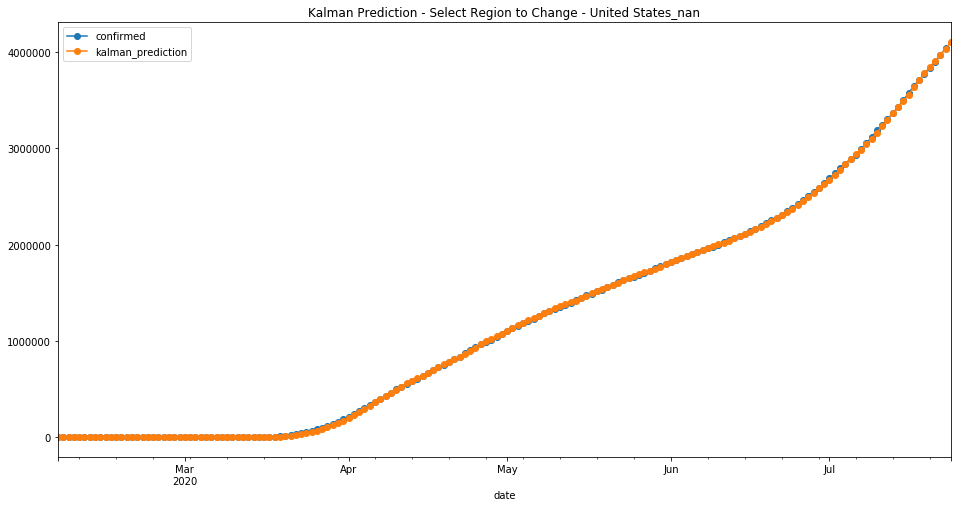

In [40]:
# Select region
region='United States_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

         region           mse          rmse          mae
208  Russia_nan  3.787842e+09  61545.443605  5416.733728


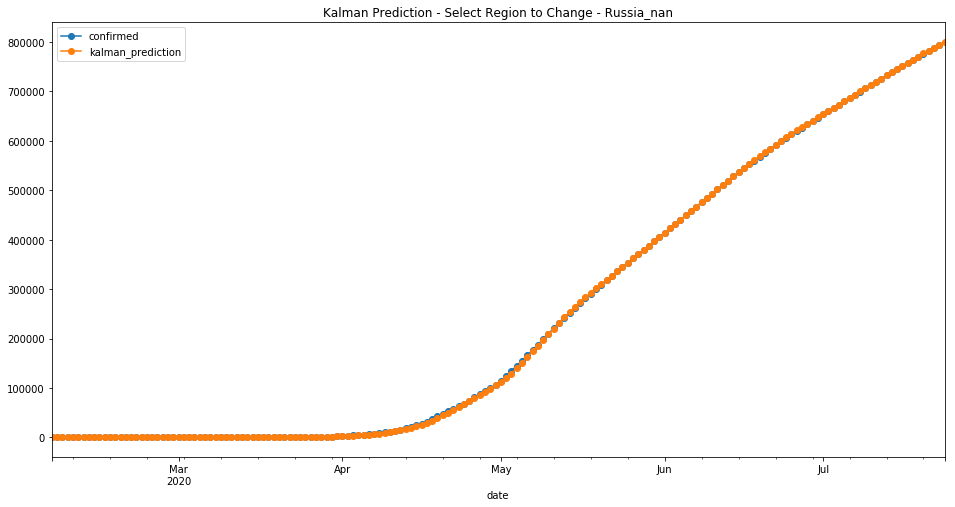

In [41]:
# Select region
region='Russia_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

        region           mse           rmse           mae
30  Brazil_nan  3.155109e+10  177626.262547  18360.189349


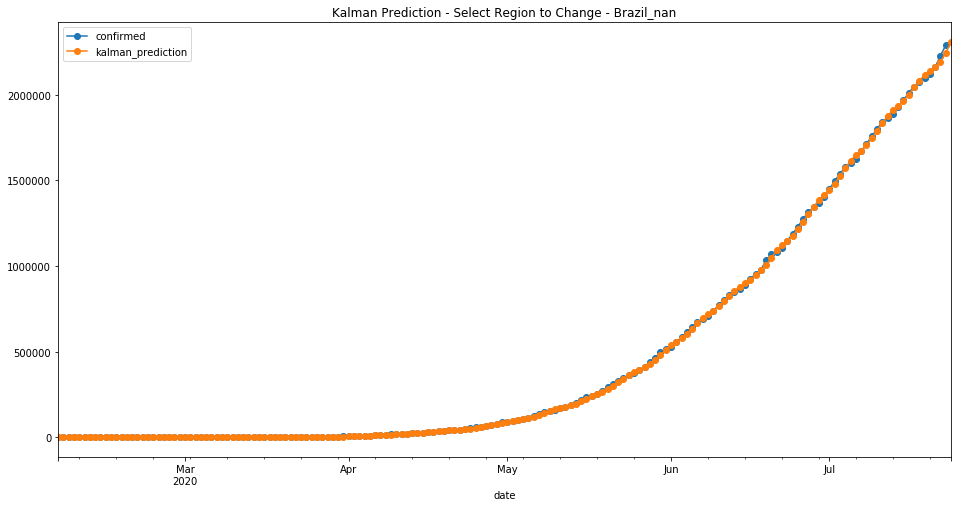

In [42]:
# Select region
region='Brazil_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

                 region           mse         rmse          mae
255  United Kingdom_nan  5.253505e+08  22920.52636  2307.674556


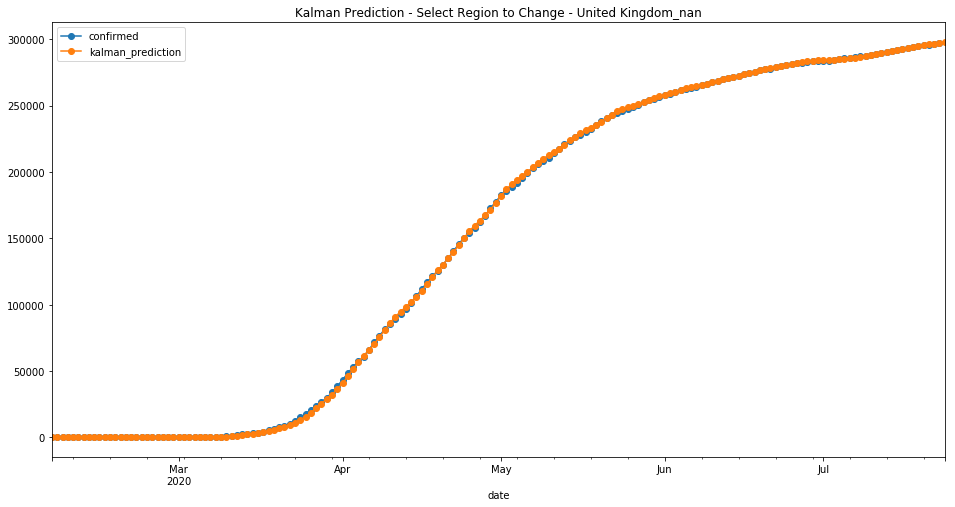

In [43]:
# Select region
region='United Kingdom_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

## Regression - 1 Day Prediction

In [44]:
#!pip install h2o
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
h2o.init(min_mem_size='5G')
import numpy as np
from sklearn.linear_model import LinearRegression

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  ----------------------------------------
H2O cluster uptime:         3 days 14 hours 25 mins
H2O cluster timezone:       Etc/GMT
H2O data parsing timezone:  UTC
H2O cluster version:        3.22.0.1
H2O cluster version age:    1 year, 8 months and 27 days !!!
H2O cluster name:           H2O_from_python_unknownUser_ebbe38
H2O cluster total nodes:    1
H2O cluster free memory:    1.365 Gb
H2O cluster total cores:    8
H2O cluster allowed cores:  8
H2O cluster status:         locked, healthy
H2O connection url:         http://localhost:54321
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         XGBoost, Algos, AutoML, Core V3, Core V4
Python version:             3.7.3 final
--------------------------  ----------------------------------------

In [45]:

train=train.fillna(0)

########################################################

### Joao - Training  progression - When growth happened 2020/03/05 to 2020/04/12
### Joao - FIX - Refresh this daily forward

### Old Fixed manual ### Last run 17April2020
##
#train_df=train[train['date']>'2020-03-04']
#train_df=train[train['date']<'2020-04-16']
#boots=train_df[train_df['date']>='2020-04-08'] # some bootstrap to give more weight for recent days
#train_df=train_df.append([boots[boots['date']>='2020-04-12']]*1000,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
#region_to_train=my_train_list
#train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
#test=train[train['date']>='2020-04-03']
#test=test[test['date']<'2020-04-17']
#test_v2=test[test['region'].isin(region_to_train)]
#valid_v2=test_v2[test_v2['date']>='2020-04-16']

########################################################

# Set minimum of 14 training day 2weeks.
#
if number_past_days_training>=7 : 
    ntraindays=number_past_days_training 
else : 
    ntraindays=7
#
to_day=pd.to_datetime('today')
first_train_date=(to_day+pd.DateOffset(days=-ntraindays)).strftime('%Y-%m-%d') # ntraindays/7 weeks =ntraindays days training
last_train_date=(to_day+pd.DateOffset(days=-1)).strftime('%Y-%m-%d')
first_bootstrap_date=(to_day+pd.DateOffset(days=-9)).strftime('%Y-%m-%d')
boost_bootstrap_date=(to_day+pd.DateOffset(days=-4)).strftime('%Y-%m-%d')
first_test_date=(to_day+pd.DateOffset(days=-10)).strftime('%Y-%m-%d')
last_test_date=to_day.strftime('%Y-%m-%d')
first_valid_date=(to_day+pd.DateOffset(days=-2)).strftime('%Y-%m-%d')

print('first_train_date=',first_train_date)
print('last_train_date=',last_train_date)
print('first_bootstrap_date=',first_bootstrap_date)
print('boost_bootstrap_date=',boost_bootstrap_date)
print('first_test_date=',first_test_date)
print('last_test_date=',last_test_date)
print('first_valid_date=',first_valid_date)

train_df=train[train['date']>first_train_date]
train_df=train[train['date']<last_train_date]
boots=train_df[train_df['date']>=first_bootstrap_date] # some bootstrap to give more weight for recent days
train_df=train_df.append([boots[boots['date']>=boost_bootstrap_date]]*5,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
region_to_train=my_train_list
train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
test=train[train['date']>first_test_date]
test=test[test['date']<=last_test_date]
test_v2=test[test['region'].isin(region_to_train)]
valid_v2=test_v2[test_v2['date']>=first_valid_date]


first_train_date= 2020-07-12
last_train_date= 2020-07-23
first_bootstrap_date= 2020-07-15
boost_bootstrap_date= 2020-07-20
first_test_date= 2020-07-14
last_test_date= 2020-07-24
first_valid_date= 2020-07-22


In [46]:
x_col=[#'region',
            '1_day_change', '3_day_change','7_day_change',
            '1_day_change_rate', 
            '3_day_change_rate',
            '7_day_change_rate', 
            'last_day',
            'min', 'max',
            'infected_rate',
            'kalman_prediction'
          #  ,'population_percent_infected_rate_confirmed'
          #  ,'delta_new_cases'
          #  ,'delta_new_cases_per_1M_hab'
          ]

In [47]:
x=train_df[x_col]
y=train_df['confirmed']
reg = LinearRegression().fit(x,y)

pred2=reg.predict(test[x_col]); pred2=pd.DataFrame(pred2); pred2=round(pred2)
pred2['confirmed']=test['confirmed'].values; pred2['date']=test['date'].values; pred2['region']=test['region'].values


In [48]:
pred2.iloc[:25]

0  confirmed       date           region
0   35072.0      34994 2020-07-15  Afghanistan_nan
1   35264.0      35070 2020-07-16  Afghanistan_nan
2   35145.0      35229 2020-07-17  Afghanistan_nan
3   35381.0      35301 2020-07-18  Afghanistan_nan
4   35421.0      35475 2020-07-19  Afghanistan_nan
5   35660.0      35526 2020-07-20  Afghanistan_nan
6   35656.0      35615 2020-07-21  Afghanistan_nan
7   35737.0      35727 2020-07-22  Afghanistan_nan
8   35860.0      35928 2020-07-23  Afghanistan_nan
9   36108.0          0 2020-07-24  Afghanistan_nan
10   3755.0       3752 2020-07-15      Albania_nan
11   3834.0       3851 2020-07-16      Albania_nan
12   3951.0       3906 2020-07-17      Albania_nan
13   3978.0       4008 2020-07-18      Albania_nan
14   4112.0       4090 2020-07-19      Albania_nan
15   4183.0       4171 2020-07-20      Albania_nan
16   4250.0       4290 2020-07-21      Albania_nan
17   4397.0       4358 2020-07-22      Albania_nan
18   4427.0       4466 2020-07-23      Albania_nan
19   4559.0          0 2020-07-24      Albania_nan
20  20759.0      20770 2020-07-15      Algeria_nan
21  21328.0      21355 2020-07-16      Algeria_nan
22  21931.0      21948 2020-07-17      Algeria_nan
23  22538.0      22549 2020-07-18      Algeria_nan
24  23153.0      23084 2020-07-19      Algeria_nan

In [49]:
pred2.iloc[175:195]

0  confirmed       date          region
175  27985.0      27890 2020-07-20  Azerbaijan_nan
176  28341.0      28242 2020-07-21  Azerbaijan_nan
177  28689.0      28633 2020-07-22  Azerbaijan_nan
178  29082.0      28980 2020-07-23  Azerbaijan_nan
179  29378.0          0 2020-07-24  Azerbaijan_nan
180    122.0        119 2020-07-15     Bahamas_nan
181    125.0        124 2020-07-16     Bahamas_nan
182    131.0        129 2020-07-17     Bahamas_nan
183    136.0        138 2020-07-18     Bahamas_nan
184    148.0        153 2020-07-19     Bahamas_nan
185    167.0        174 2020-07-20     Bahamas_nan
186    192.0        194 2020-07-21     Bahamas_nan
187    211.0        219 2020-07-22     Bahamas_nan
188    241.0        274 2020-07-23     Bahamas_nan
189    317.0          0 2020-07-24     Bahamas_nan
190  34588.0      34560 2020-07-15     Bahrain_nan
191  34953.0      35084 2020-07-16     Bahrain_nan
192  35497.0      35473 2020-07-17     Bahrain_nan
193  35821.0      36004 2020-07-18     Bahrain_nan
194  36460.0      36422 2020-07-19     Bahrain_nan

In [50]:
pred2.iloc[220:240]

0  confirmed       date       region
220  65406.0      65443 2020-07-15  Belarus_nan
221  65584.0      65623 2020-07-16  Belarus_nan
222  65768.0      65782 2020-07-17  Belarus_nan
223  65904.0      65953 2020-07-18  Belarus_nan
224  66086.0      66095 2020-07-19  Belarus_nan
225  66213.0      66213 2020-07-20  Belarus_nan
226  66313.0      66348 2020-07-21  Belarus_nan
227  66468.0      66521 2020-07-22  Belarus_nan
228  66661.0      66688 2020-07-23  Belarus_nan
229  66808.0          0 2020-07-24  Belarus_nan
230  62853.0      62872 2020-07-15  Belgium_nan
231  63002.0      63238 2020-07-16  Belgium_nan
232  63522.0      63499 2020-07-17  Belgium_nan
233  63670.0      63706 2020-07-18  Belgium_nan
234  63818.0      63706 2020-07-19  Belgium_nan
235  63722.0      64094 2020-07-20  Belgium_nan
236  64433.0      64258 2020-07-21  Belgium_nan
237  64454.0      64627 2020-07-22  Belgium_nan
238  64921.0      64847 2020-07-23  Belgium_nan
239  65050.0          0 2020-07-24  Belgium_nan

In [51]:
#
train_h20 = h2o.H2OFrame(train_df)
###train_h20_hubei = h2o.H2OFrame(train_df_hubei) # different model for Hubei
#
### Joao - Italian Model
train_h20_v2 = h2o.H2OFrame(train_df_v2) # different model for V2 region ### Spain This time


test_h20 = h2o.H2OFrame(test)
#test_h20_hubei = h2o.H2OFrame(test_hubei)
test_h20_v2 = h2o.H2OFrame(test_v2)

valid_h20_v2=h2o.H2OFrame(valid_v2)

#training_columns = ['region','1_day_change', '3_day_change', '7_day_change','1_day_change_rate','3_day_change_rate','7_day_change_rate','last_day', 'kalman_prediction','infected_rate', 'min', 'max']
training_cols_v2 = ['region']+x_col #+['population_percent_infected_rate_confirmed','delta_new_cases','delta_new_cases_per_1M_hab']
training_columns = training_cols_v2

# Output parameter train against input parameters
response_column = 'confirmed'

# model = H2ORandomForestEstimator(ntrees=300, max_depth=12)
# model.train(x=training_columns, y=response_column, training_frame=train_h20)

###model_hubei = H2ORandomForestEstimator(ntrees=300, max_depth=12)
###model_hubei.train(x=training_columns, y=response_column, training_frame=train_h20_hubei)

### Joao - Model V2
model_v2 = H2ORandomForestEstimator(ntrees=500, max_depth=23)
model_v2.train(x=training_columns, y=response_column, training_frame=train_h20_v2, validation_frame=valid_h20_v2)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/utils/shared_utils.py:177: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%


In [52]:
#Print Model

print('# MSE on the training data = ',model_v2.mse())
print('# MSE on the validation data = ',model_v2.mse(valid=True))
print('# R^2 on the training data = ',model_v2.r2())
print('# R^2 on the validation data = ',model_v2.r2(valid=True))

# MSE on the training data =  19264079.037459567
# MSE on the validation data =  228557289283.66364
# R^2 on the training data =  0.9998573197517467
# R^2 on the validation data =  0.4152919595863027


In [53]:
model_v2.show()

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1595276999661_24


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 19264079.037459567
RMSE: 4389.08635566214
MAE: 712.2093643767726
RMSLE: 0.29284702818705216
Mean Residual Deviance: 19264079.037459567

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 228557289283.66364
RMSE: 478076.65628397255
MAE: 112585.05490044692
RMSLE: 6.396638103356359
Mean Residual Deviance: 228557289283.66364
Scoring History: 


timestamp            duration    number_of_trees    training_rmse       training_mae        training_deviance    validation_rmse     validation_mae      validation_deviance
---  -------------------  ----------  -----------------  ------------------  ------------------  -------------------  ------------------  ------------------  ---------------------
     2020-07-24 10:55:40  0.007 sec   0.0                nan                 nan                 nan                  nan                 nan                 nan
     2020-07-24 10:55:40  0.079 sec   1.0                7924.829723148494   1840.2666421013612  62802926.14089783    460982.24931914656  110989.48451576577  212504634187.3398
     2020-07-24 10:55:40  0.131 sec   2.0                11157.514092235378  2108.414775062249   124490120.71843106   456749.8297157322   107056.55828912409  208620406945.35037
     2020-07-24 10:55:41  0.180 sec   3.0                9199.672692773243   1845.0741942847185  84633977.65415771    454471.53677201155  105590.64917285451  206544377735.91382
     2020-07-24 10:55:41  0.233 sec   4.0                16864.87478539936   1937.217956035191   284424001.52719903   467030.3697054884   112895.66906288078  218117366227.24515
---  ---                  ---         ---                ---                 ---                 ---                  ---                 ---                 ---
     2020-07-24 10:55:52  12.049 sec  199.0              4747.947912805997   796.2311355705634   22543009.382718816   479890.25929583726  113365.0404610957   230294660967.0259
     2020-07-24 10:55:56  16.088 sec  266.0              4693.511686127962   765.6133009066858   22029051.947819747   479830.32401113486  113030.23772055515  230237139840.63065
     2020-07-24 10:56:00  20.089 sec  340.0              4577.264216362859   737.3392192354827   20951347.706395894   478025.66384557175  112616.34260460996  228508535294.99954
     2020-07-24 10:56:04  24.104 sec  418.0              4491.02030466       721.178249444861    20169263.376868397   478767.5138099277   112849.77499513912  229218332279.7393
     2020-07-24 10:56:08  28.085 sec  500.0              4389.08635566214    712.2093643767726   19264079.037459567   478076.65628397255  112585.05490044692  228557289283.66364


See the whole table with table.as_data_frame()
Variable Importances: 


variable           relative_importance    scaled_importance    percentage
-----------------  ---------------------  -------------------  ------------
kalman_prediction  1.34492e+17            1                    0.332867
last_day           1.1881e+17             0.883396             0.294053
7_day_change       5.89871e+16            0.438591             0.145992
3_day_change       4.3877e+16             0.326242             0.108595
1_day_change       2.53234e+16            0.188289             0.0626751
region             9.25719e+15            0.0688308            0.0229115
infected_rate      9.09157e+15            0.0675993            0.0225015
1_day_change_rate  9.55231e+14            0.00710251           0.00236419
min                8.88738e+14            0.00660811           0.00219962
max                8.77506e+14            0.00652459           0.00217182
7_day_change_rate  8.13493e+14            0.00604863           0.00201339
3_day_change_rate  6.68995e+14            0.00497423           0.00165576

In [54]:
#model_hubei.varimp(True).iloc[:,:] # Feature importance for Hubei Model RF
### Joao -  Model V2
modlv2=model_v2.varimp(True).iloc[:,:] # Feature importance for Model V2 Global RF
modlv2.sort_values('percentage',ascending=False)

variable  relative_importance  scaled_importance  percentage
0   kalman_prediction         1.344920e+17           1.000000    0.332867
1            last_day         1.188097e+17           0.883396    0.294053
2        7_day_change         5.898706e+16           0.438591    0.145992
3        3_day_change         4.387698e+16           0.326242    0.108595
4        1_day_change         2.532335e+16           0.188289    0.062675
5              region         9.257193e+15           0.068831    0.022911
6       infected_rate         9.091569e+15           0.067599    0.022502
7   1_day_change_rate         9.552315e+14           0.007103    0.002364
8                 min         8.887381e+14           0.006608    0.002200
9                 max         8.775060e+14           0.006525    0.002172
10  7_day_change_rate         8.134925e+14           0.006049    0.002013
11  3_day_change_rate         6.689946e+14           0.004974    0.001656

In [55]:
## Joao - Model Predictions - Country_nan _v2
performance = model_v2.model_performance(test_data=test_h20_v2)
# # Model Create Predictions
pred=model_v2.predict(test_h20_v2);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
pred['confirmed']=test_v2['confirmed'].values
pred['date']=test_v2['date'].values
pred['region']=test_v2['region'].values

drf prediction progress: |████████████████████████████████████████████████| 100%


## Correlation Matrix And Temperature

Correlation Matrix


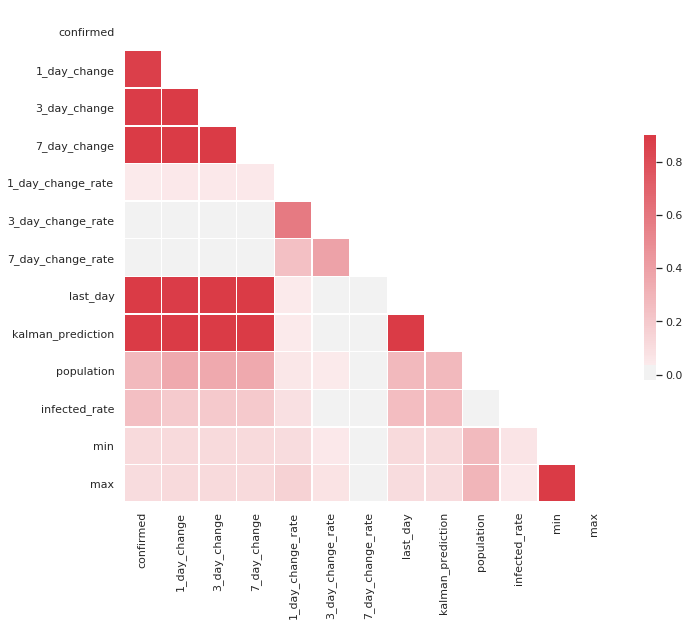

In [56]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
# Compute the correlation matrix
corr = train.iloc[:,2:].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print ('Correlation Matrix')

In [57]:
print('Correlation To Confirmed') 
print (corr.confirmed)

Correlation To Confirmed
confirmed            1.000000
1_day_change         0.875185
3_day_change         0.887562
7_day_change         0.900078
1_day_change_rate    0.039675
3_day_change_rate    0.009738
7_day_change_rate   -0.008811
last_day             0.981394
kalman_prediction    0.981498
population           0.278617
infected_rate        0.248809
min                  0.118551
max                  0.109714
Name: confirmed, dtype: float64


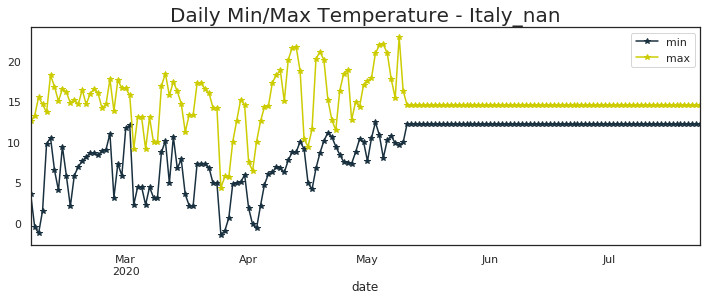

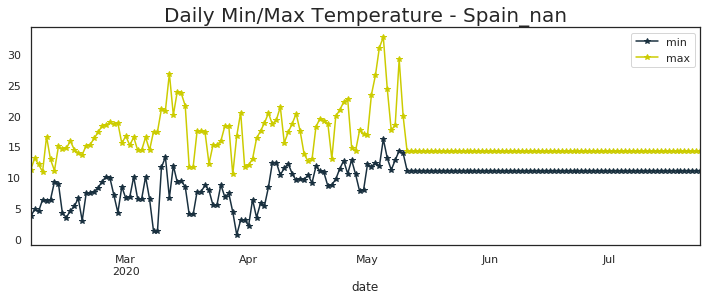

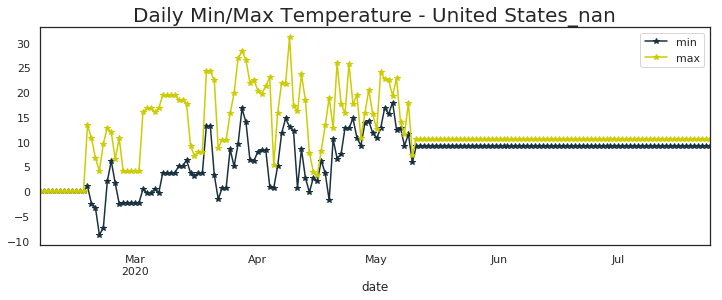

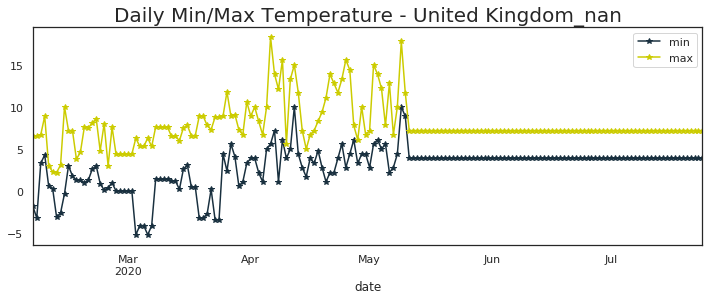

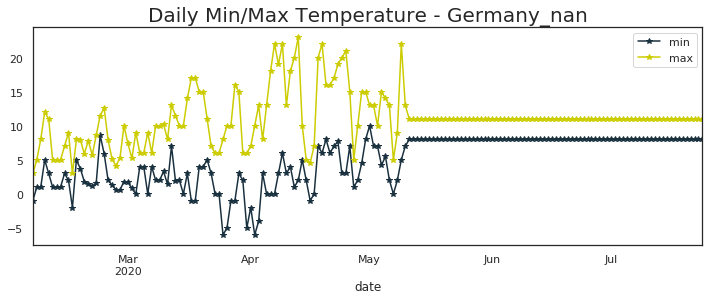

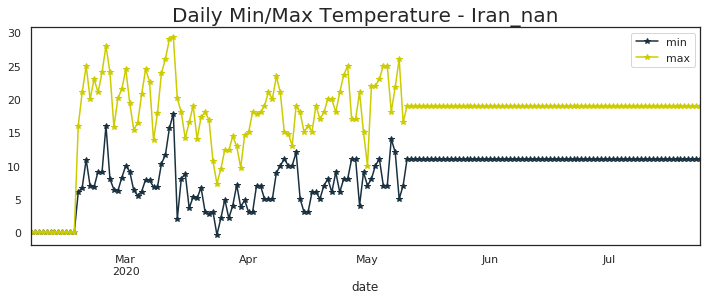

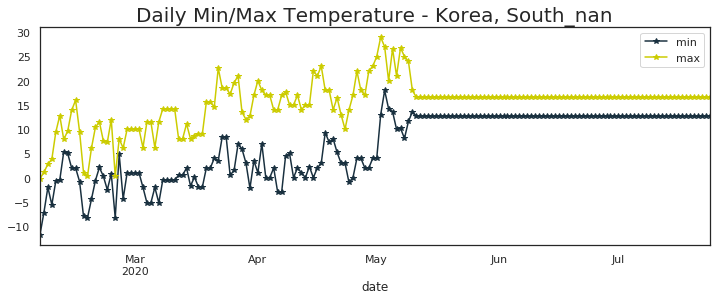

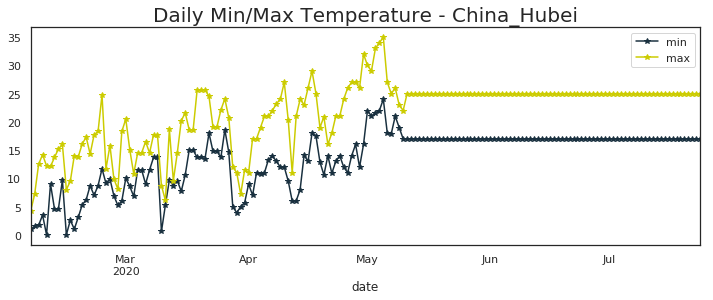

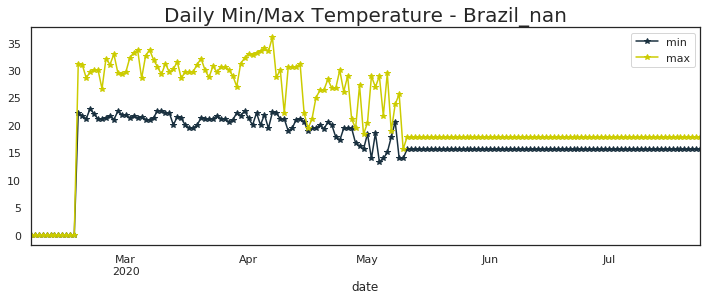

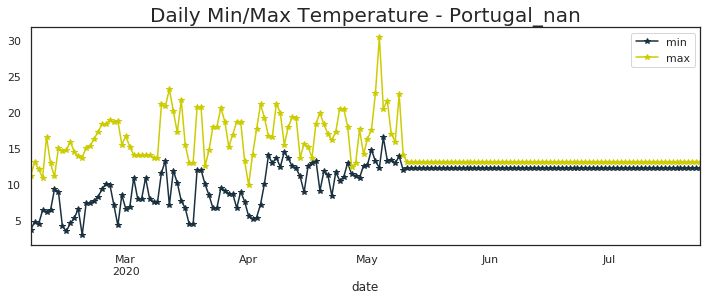

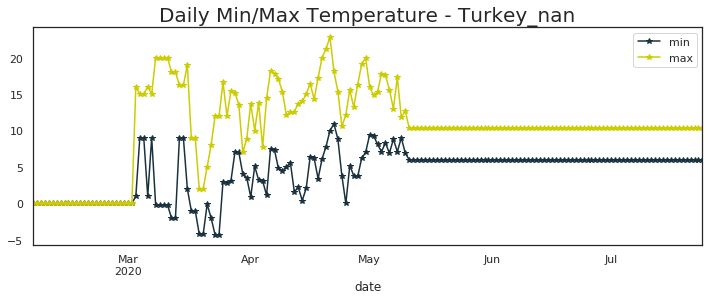

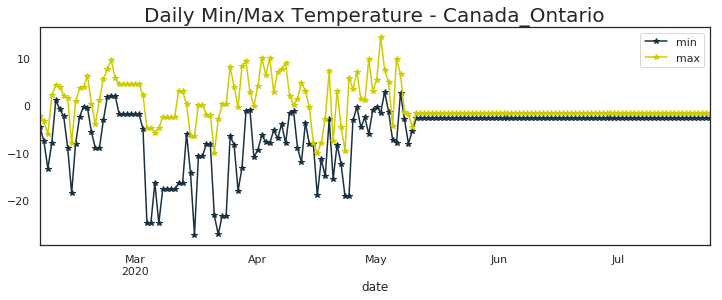

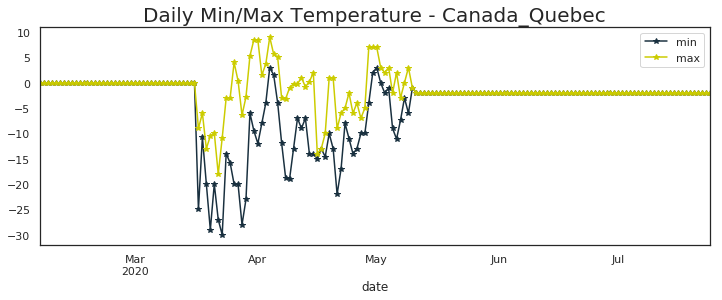

In [58]:
import matplotlib.pyplot as plt
p=train[['date','region','min','max']].set_index('date')
#
#rg1='China_Hubei'
#p=p[p['region']==rg1]
#p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+rg1,fontdict={'fontsize': 20})
#
## JOAO - Temp. Teast Italy - Data Supply finishes 13/03/2020
region_s=['Italy_nan','Spain_nan','United States_nan','United Kingdom_nan','Germany_nan','Iran_nan',
          'Korea, South_nan','China_Hubei','Brazil_nan','Portugal_nan','Turkey_nan',
          'Canada_Ontario','Canada_Quebec']
p=train[['date','region','min','max']].set_index('date')
for i in range(0,len(region_s)):     
    pv=p[p['region']==region_s[i]]
    pv.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+region_s[i],fontdict={'fontsize': 20})
#

In [59]:
avg_temp=train[['region','confirmed','min','max']]  # from 20-02-20 to 06-04-2020
avg_temp=avg_temp.groupby(by='region').max()
avg_temp=avg_temp.sort_values('confirmed',ascending=False)
print( 'Most infected Areas Avg Temperature')
print(avg_temp.iloc[:100,1:])

Most infected Areas Avg Temperature
                               min   max
region                                  
United States_nan             17.9  31.1
Brazil_nan                    23.0  36.0
India_nan                     30.0  43.0
Russia_nan                    13.0  30.0
South Africa_nan               0.0   0.0
Peru_nan                       0.0   0.0
Mexico_nan                     0.0   0.0
Chile_nan                      0.0   0.0
United Kingdom_nan            10.0  18.3
Iran_nan                      17.8  29.3
Pakistan_nan                  16.0  28.0
Spain_nan                     16.2  32.7
Saudi Arabia_nan               0.0   0.0
Italy_nan                     12.4  22.9
Colombia_nan                   0.0   0.0
Turkey_nan                    10.9  22.8
Bangladesh_nan                 0.0   0.0
France_nan                    14.2  23.8
Germany_nan                   10.0  23.0
Argentina_nan                  0.0   0.0
Qatar_nan                      0.0   0.0
Iraq_nan             

### Kalman X Days Ahead Prediction

In [60]:
%%R

#install.packages('reshape')

NULL


In [61]:
%%R

require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL

### JOAO - FIX
#
### Flexy Days maximum forward prediction =A Hint!= "Error increases as number of days increases"
days_prediction<-max_days_prediction # Set i days prediction # max_days_prediction=90 days forward prediction with Kalman Filter

for (i in 1: days_prediction) { 
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}

cols(
  .default = col_double(),
  date = col_date(format = "")
)




In [62]:
all_new=%R all_new

In [63]:
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

Text(0.5, 1.0, 'Kalman Prediction - Select Country/Region to Change - Spain_nan')

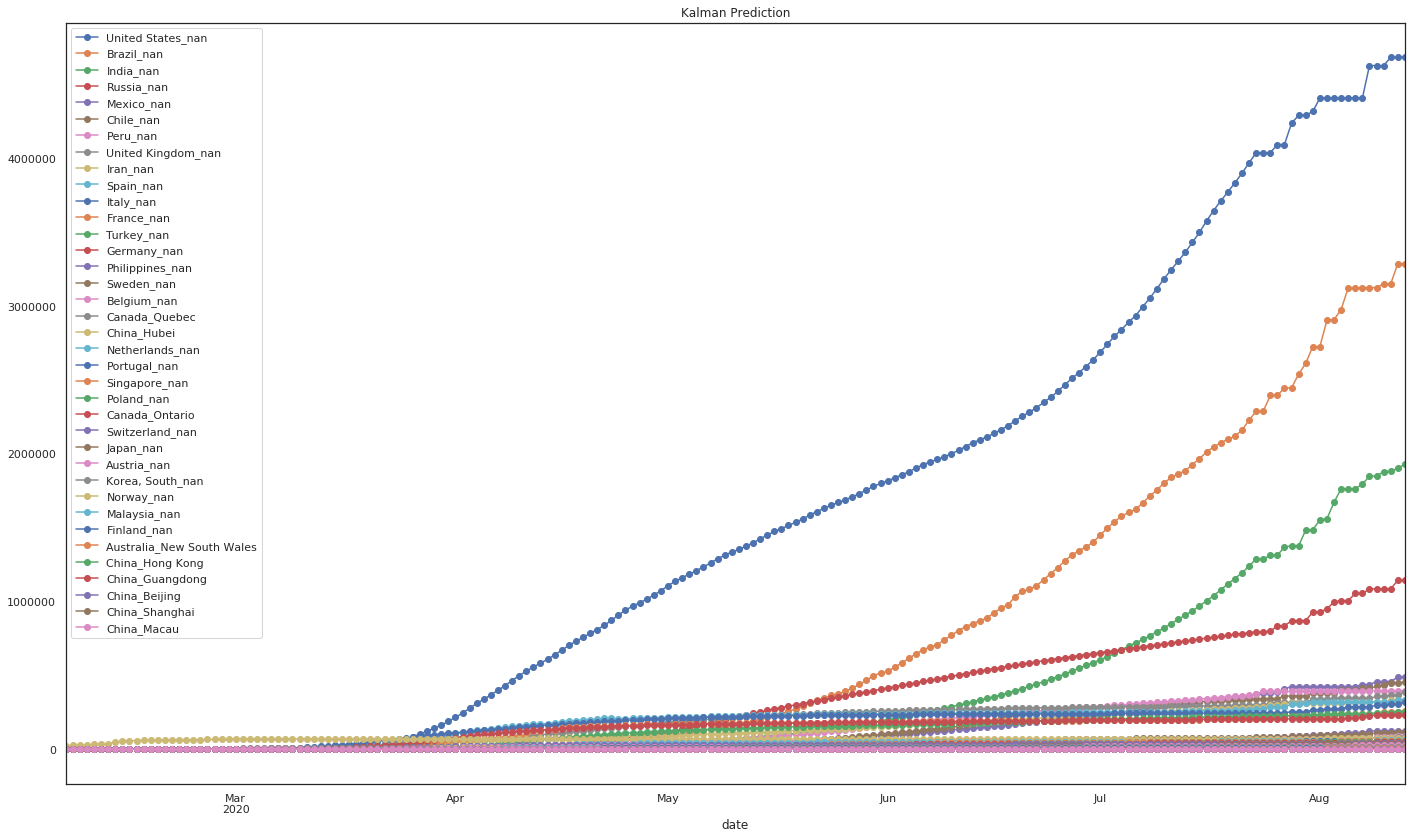

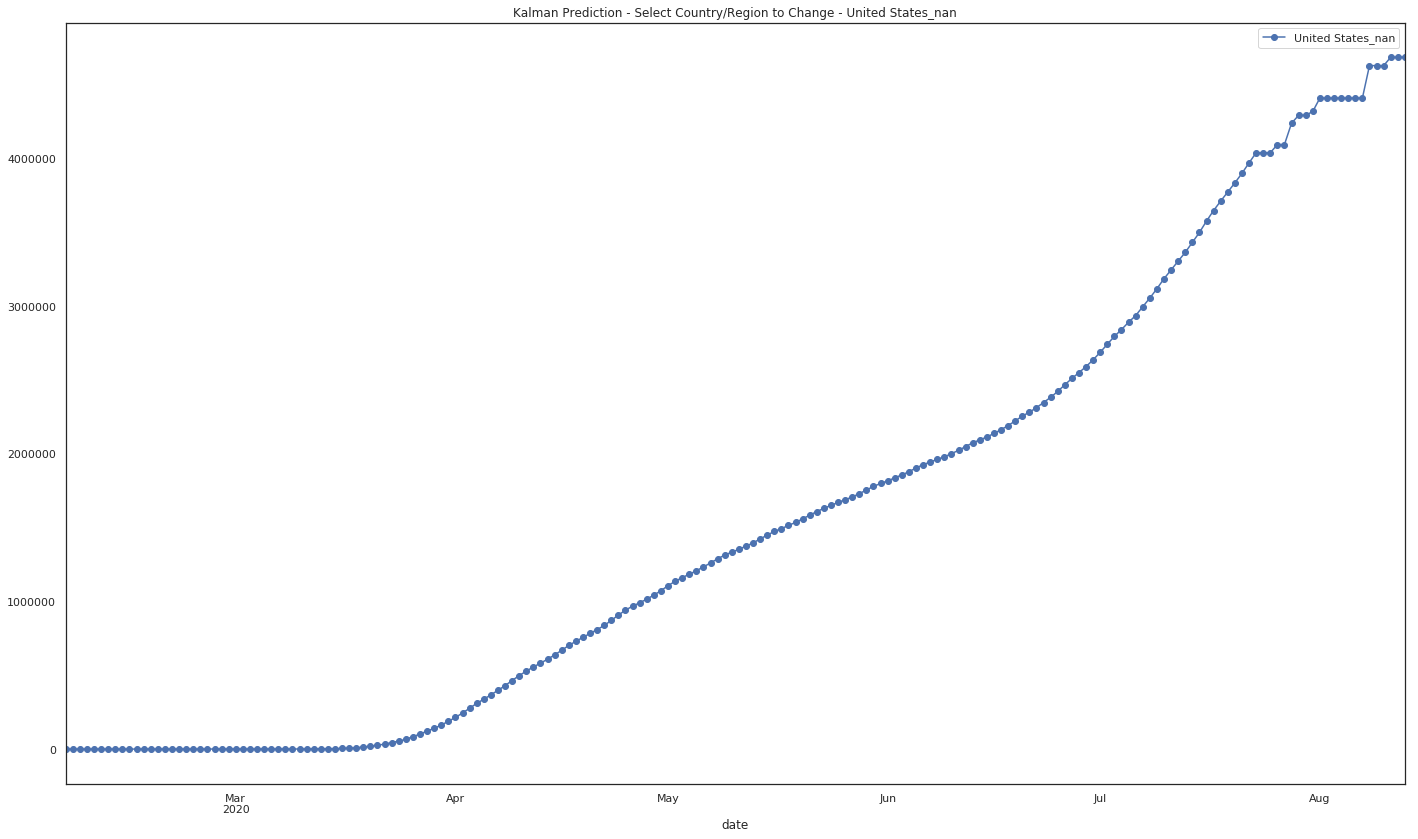

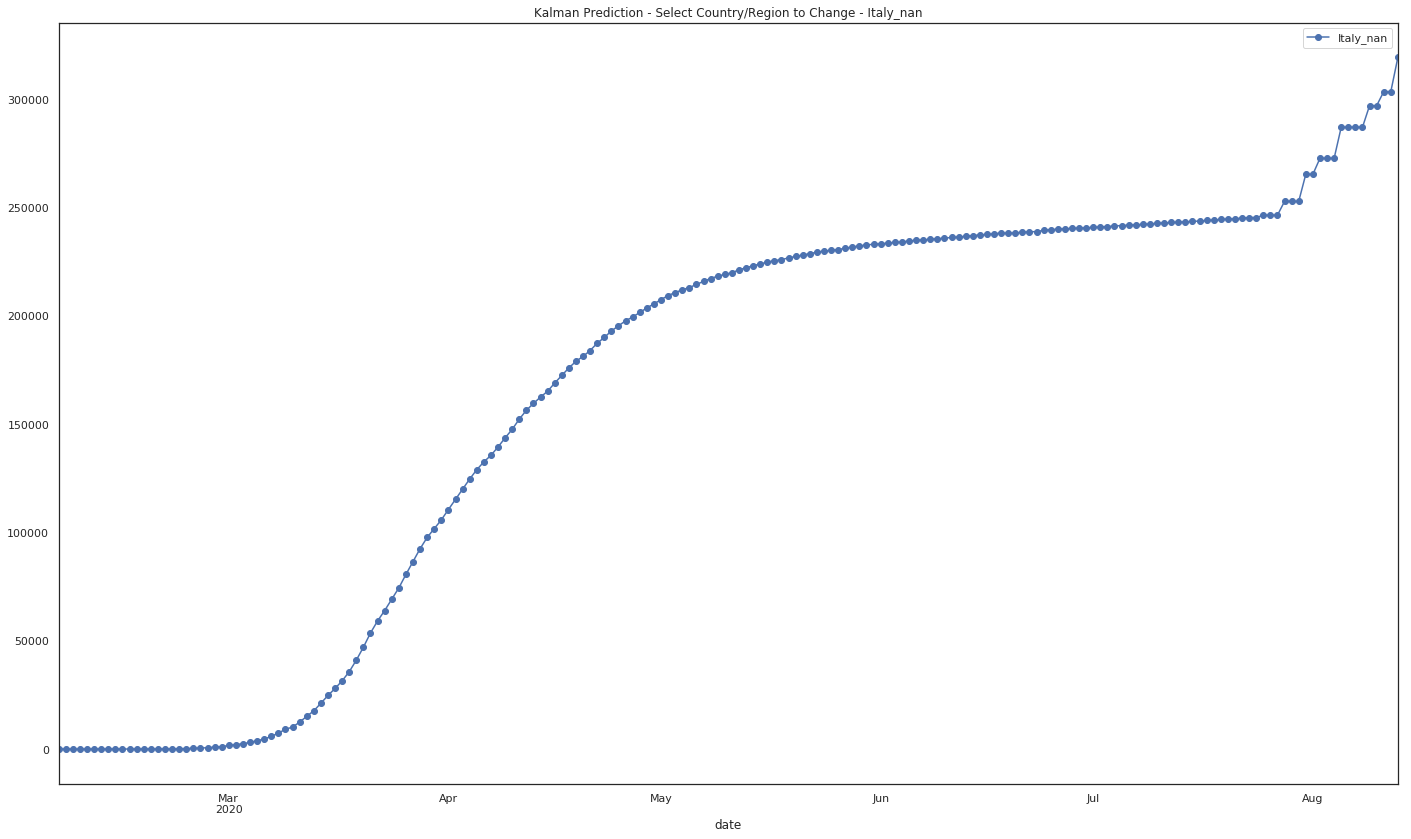

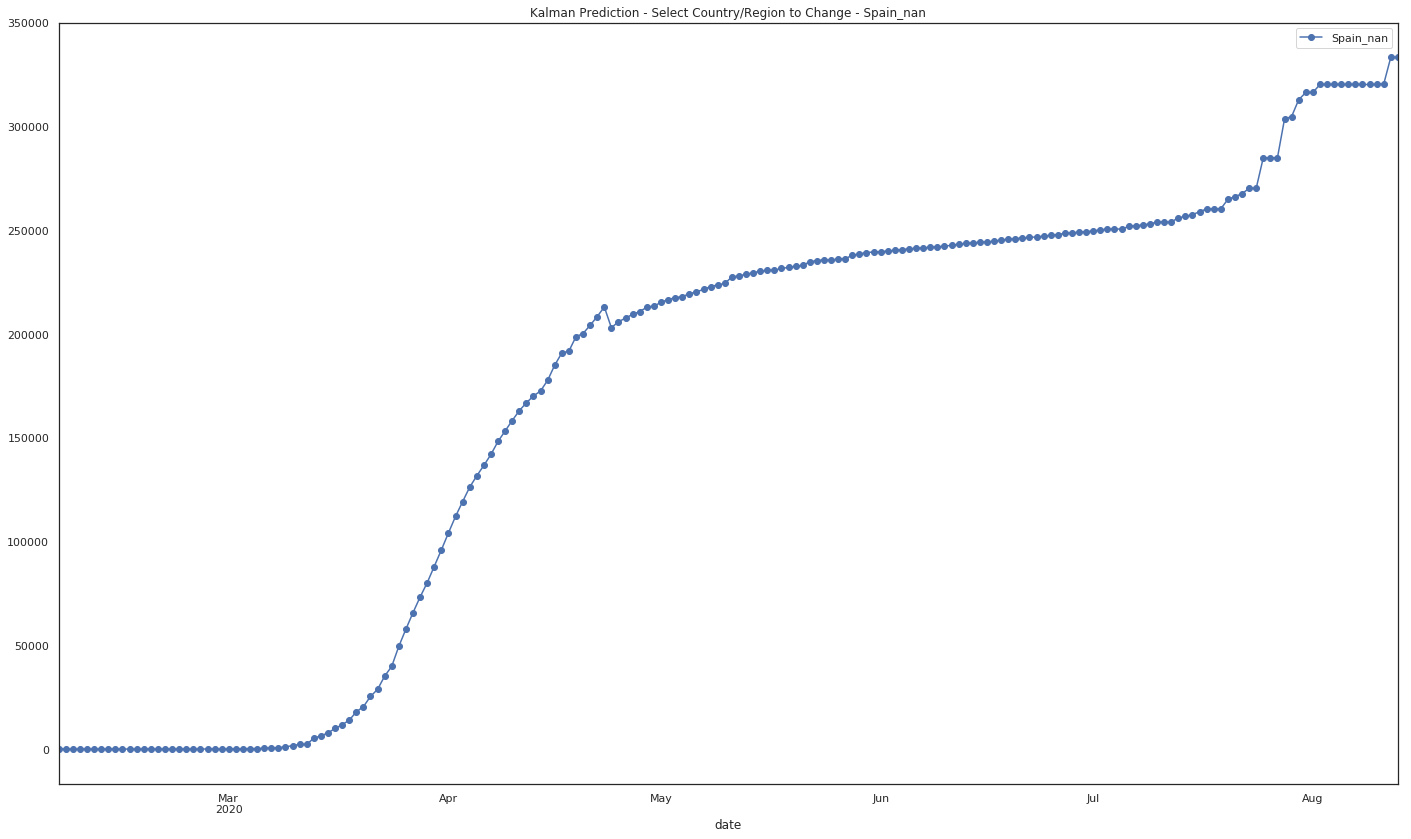

In [64]:
#
### Joao - Moving Forward ...
# Select regions From my_train_list
#
region=['date']+my_train_list
p_kalman=all_new[region]
#p=all_new
#p.iloc[len(p)-1,2]=None
p_kalman=p_kalman.set_index(['date'])
p_kalman=p_kalman.reindex(p_kalman.max().sort_values(ascending=False).index, axis=1)
p_kalman.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction')
#
p_kalman2=all_new[['date','United States_nan']] ## Joao
p_kalman2=p_kalman2.set_index(['date'])
p_kalman2.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman2.columns[0]))
#
p_kalman3=all_new[['date','Italy_nan']] ## Joao
p_kalman3=p_kalman3.set_index(['date'])
p_kalman3.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman3.columns[0]))
#
p_kalman4=all_new[['date','Spain_nan']] ## Joao
p_kalman4=p_kalman4.set_index(['date'])
p_kalman4.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman4.columns[0]))
#

/home/notebookuser/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


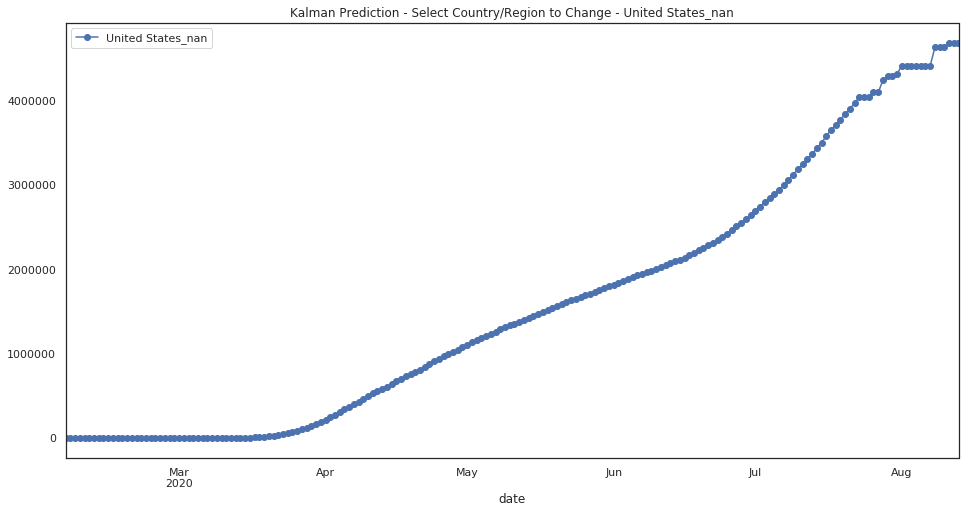

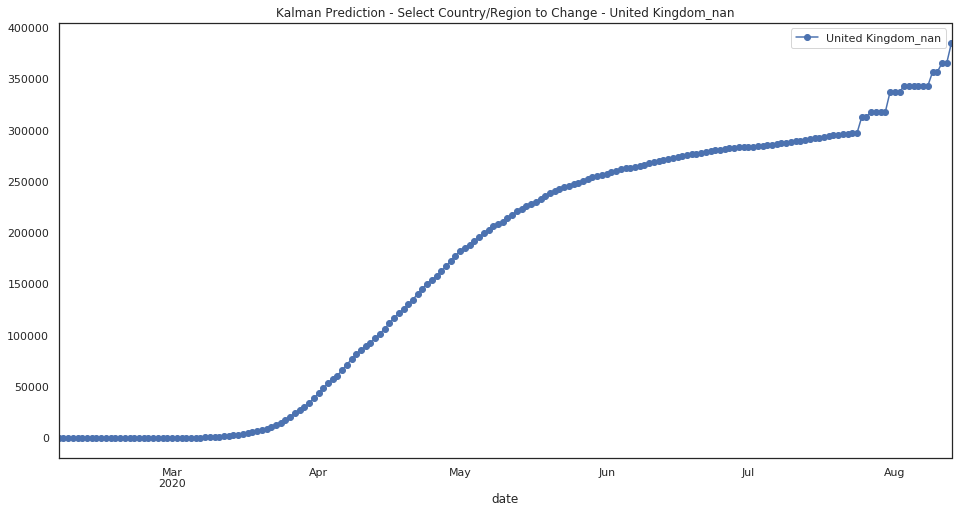

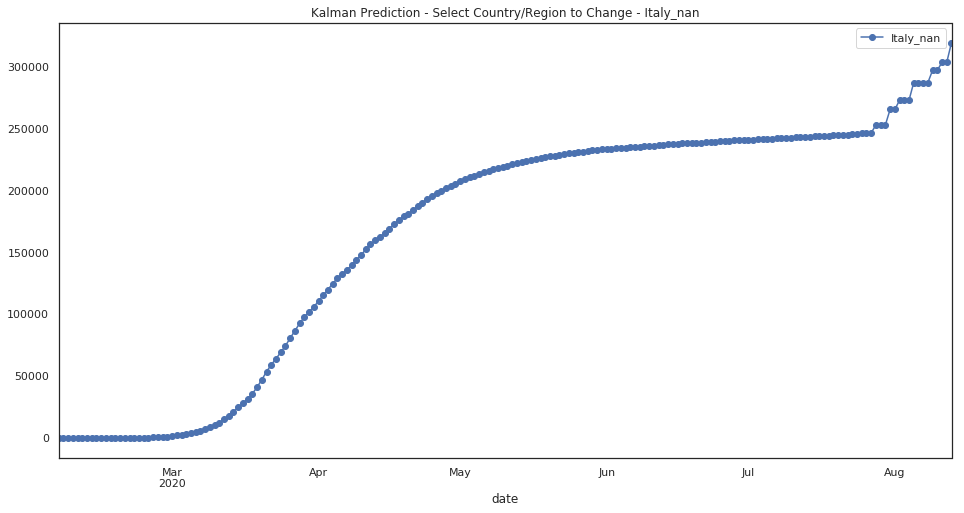

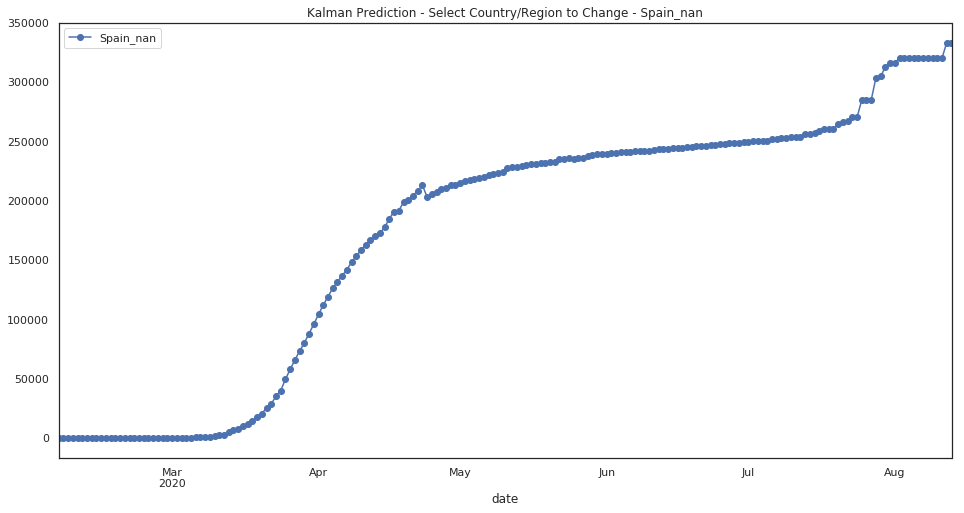

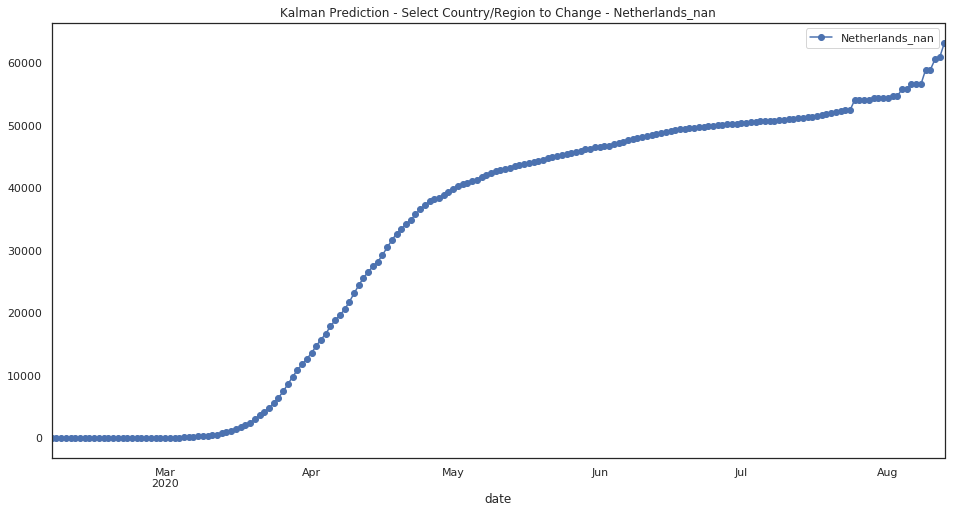

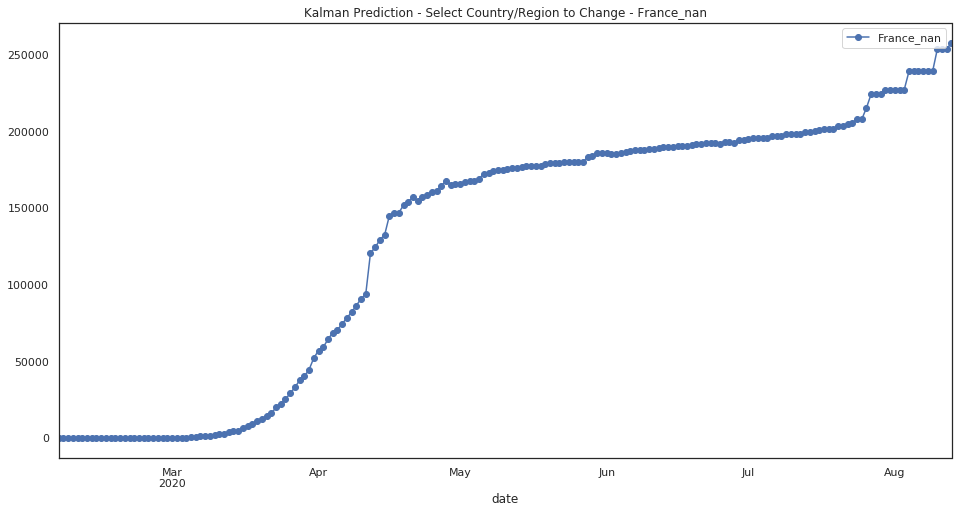

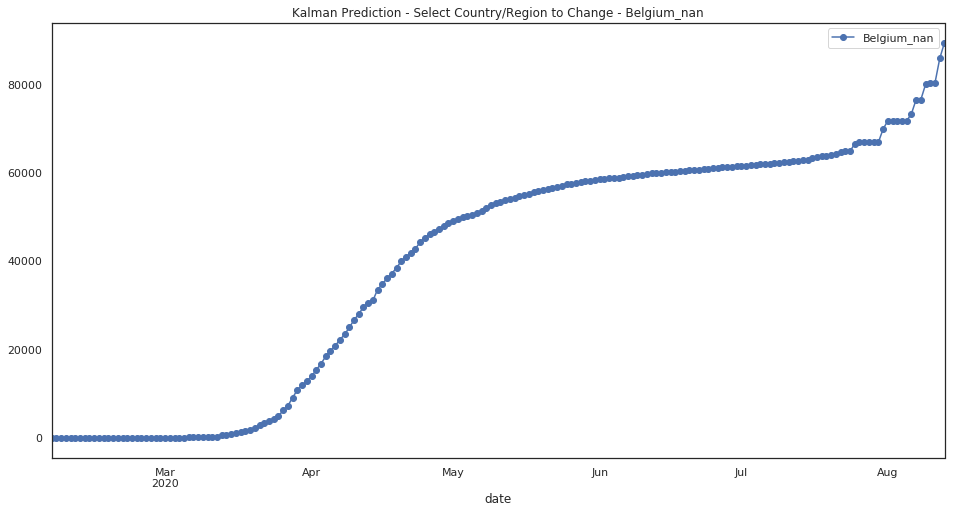

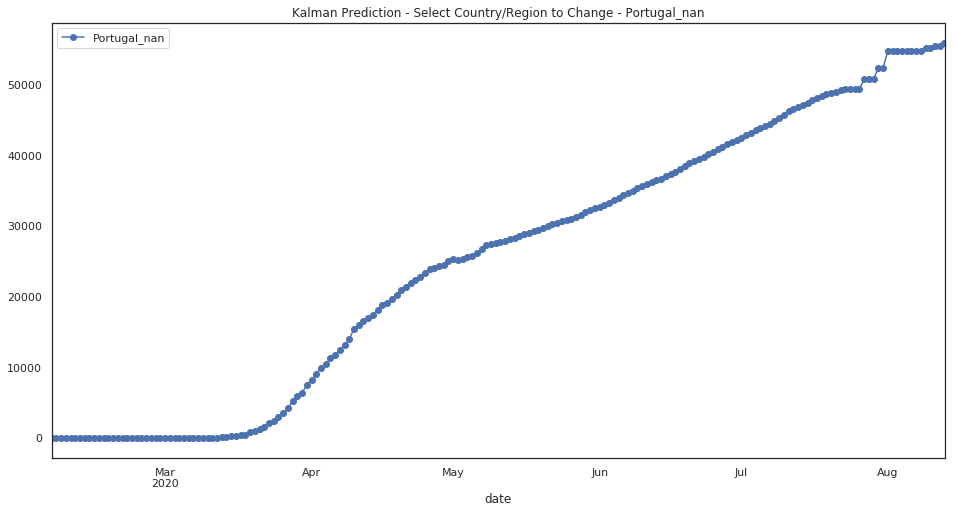

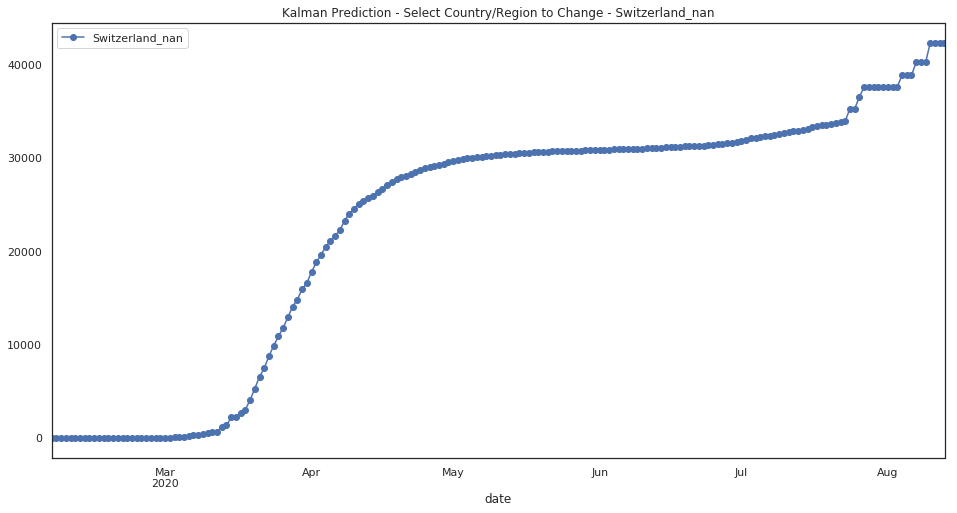

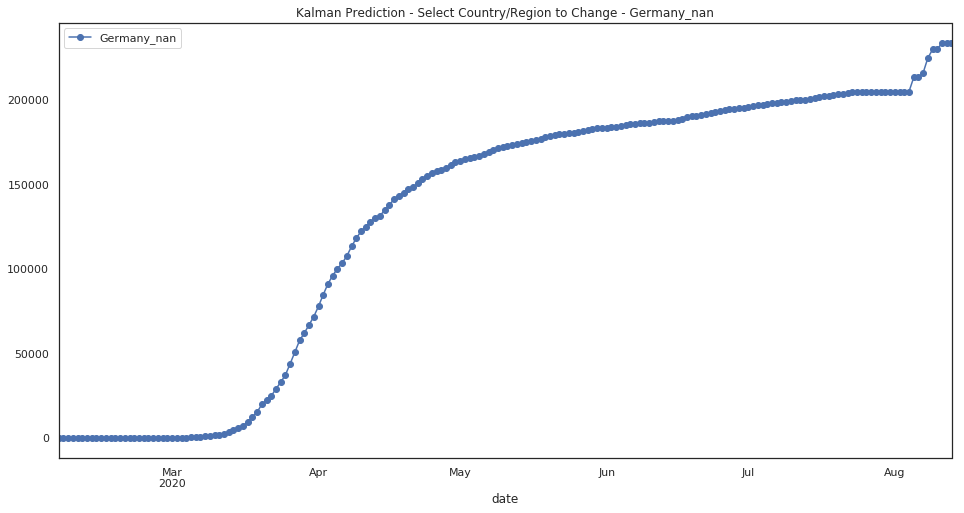

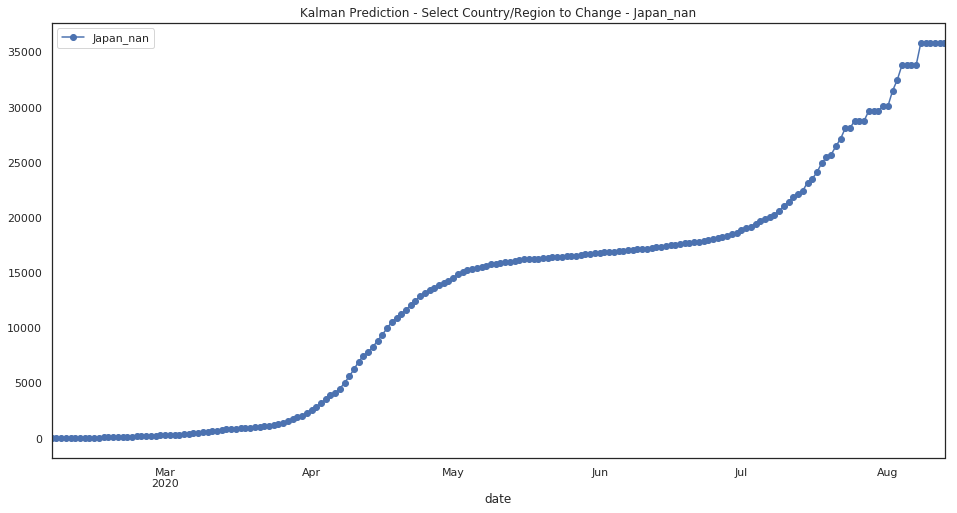

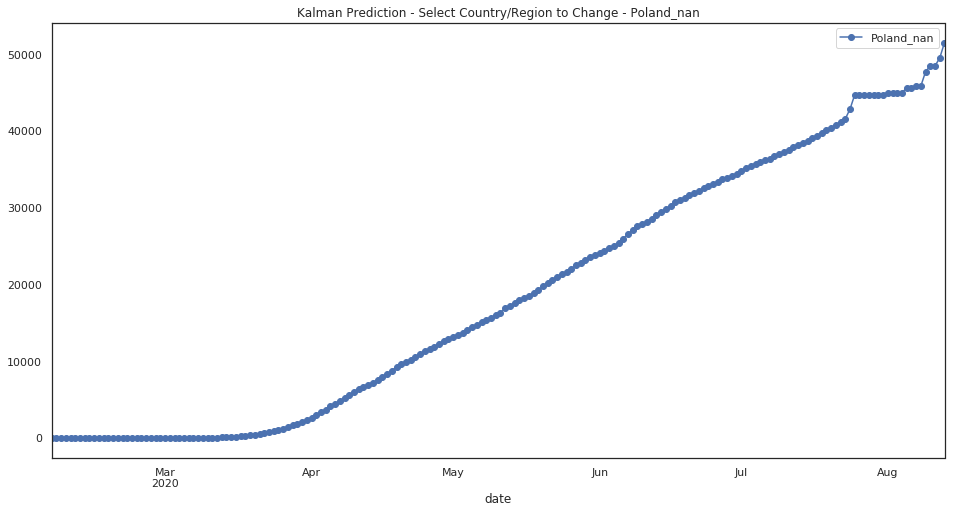

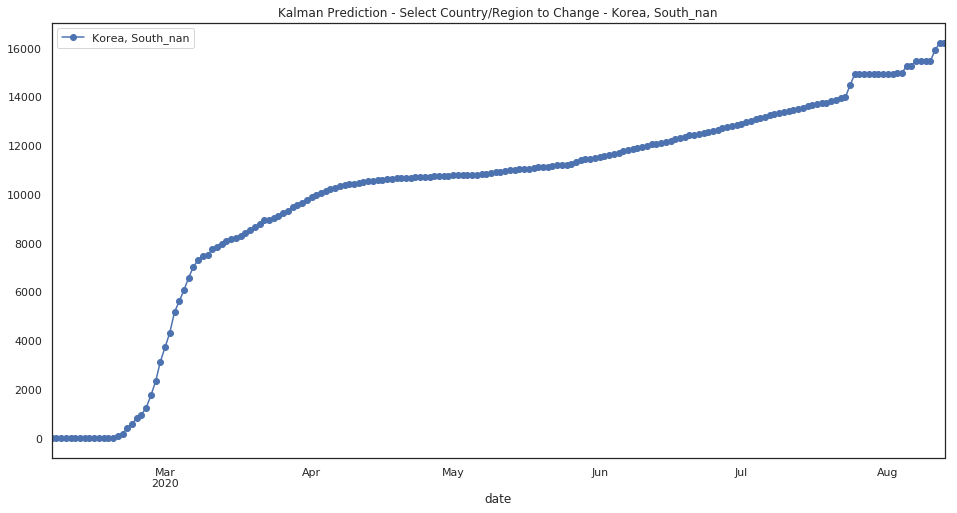

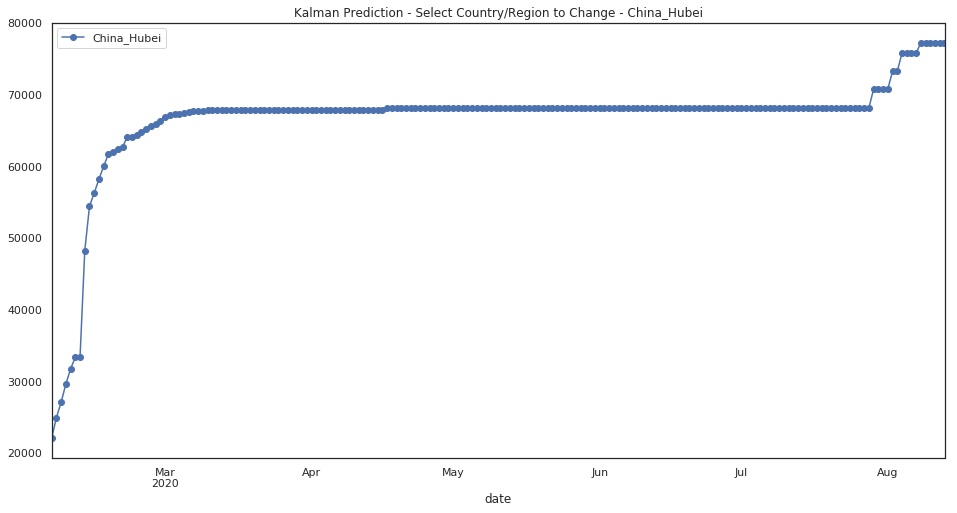

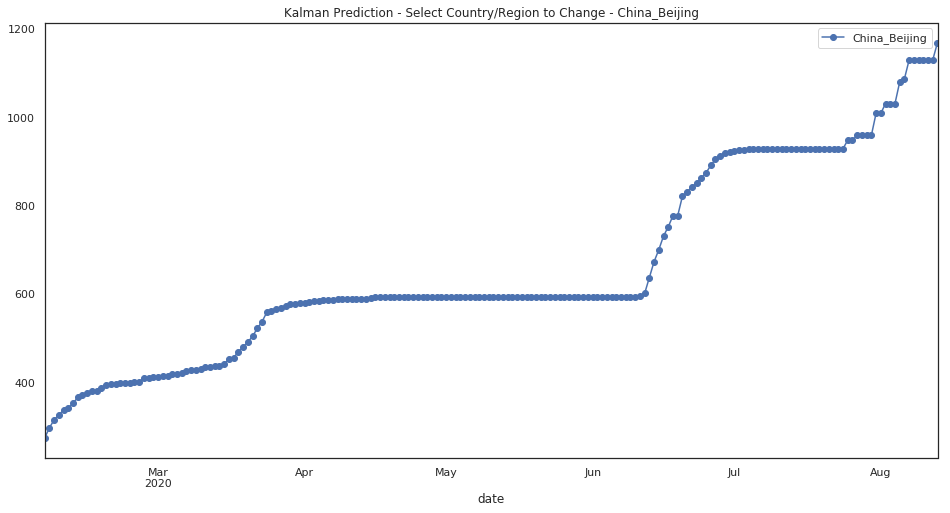

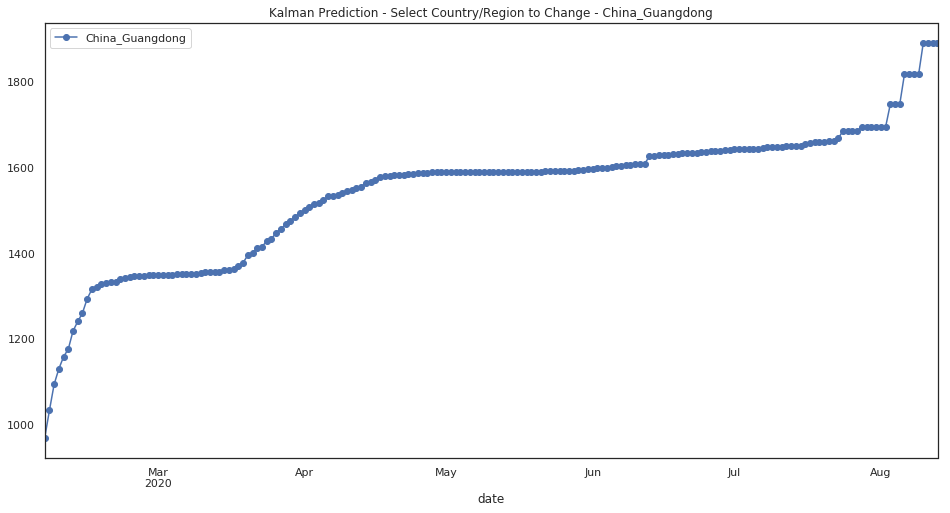

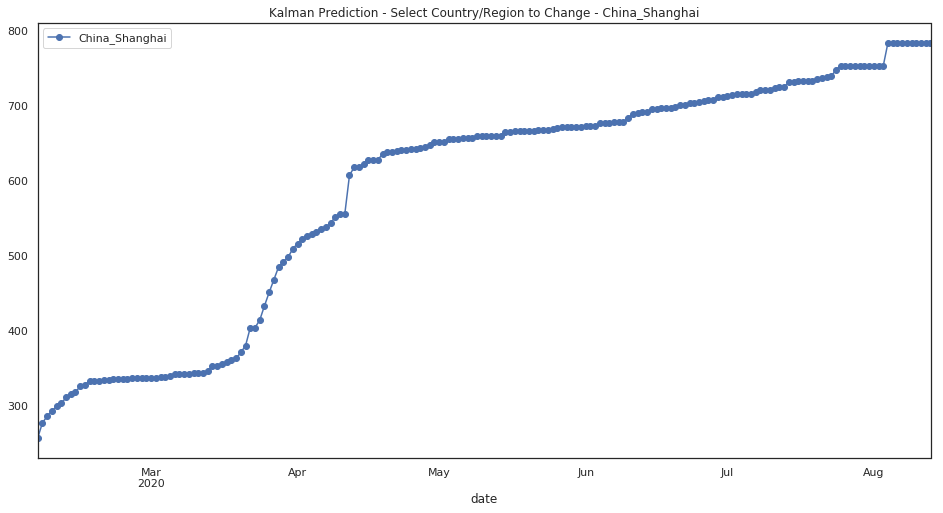

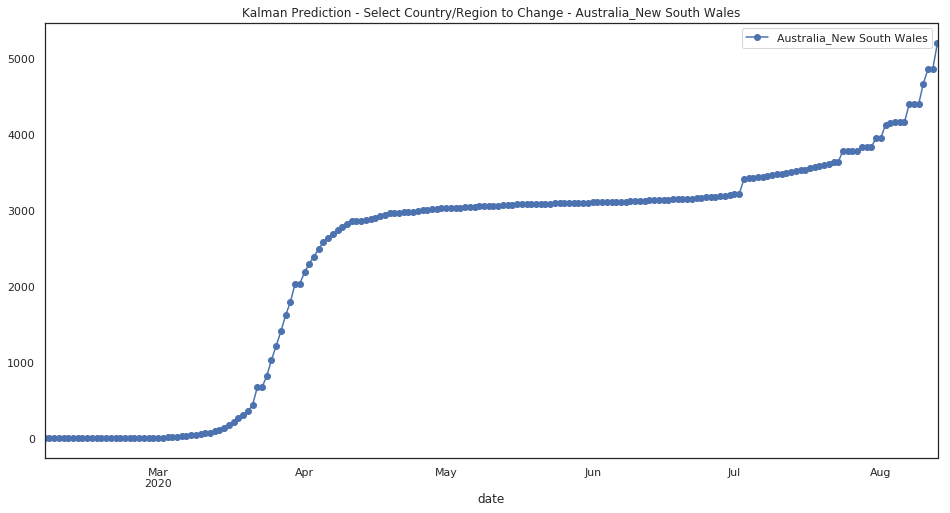

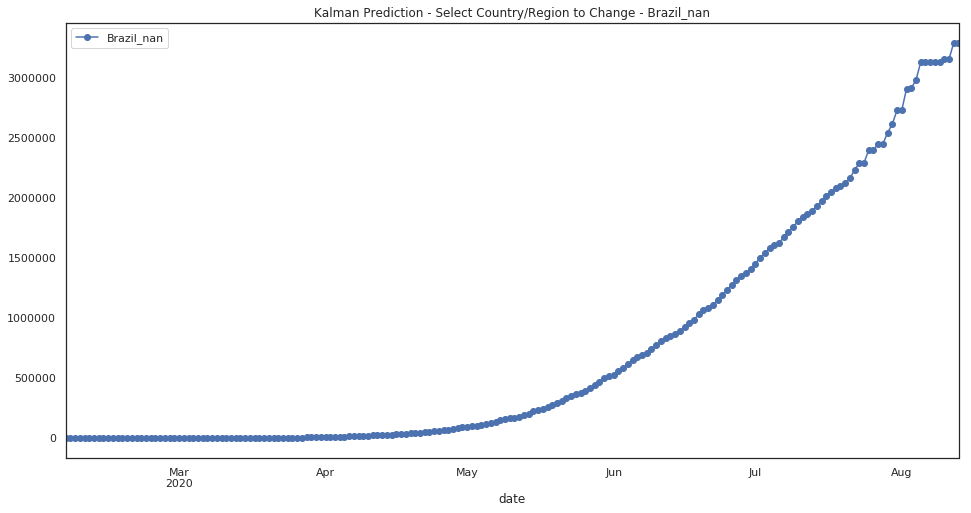

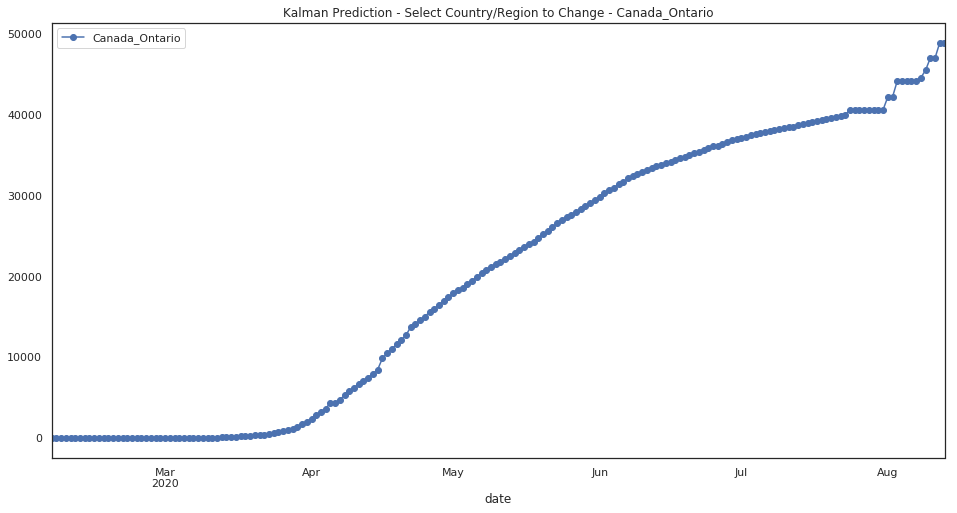

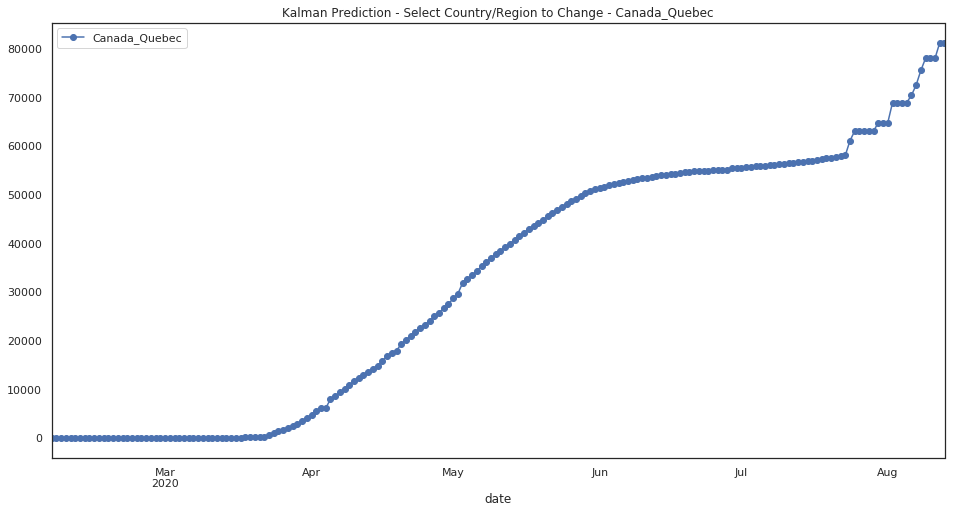

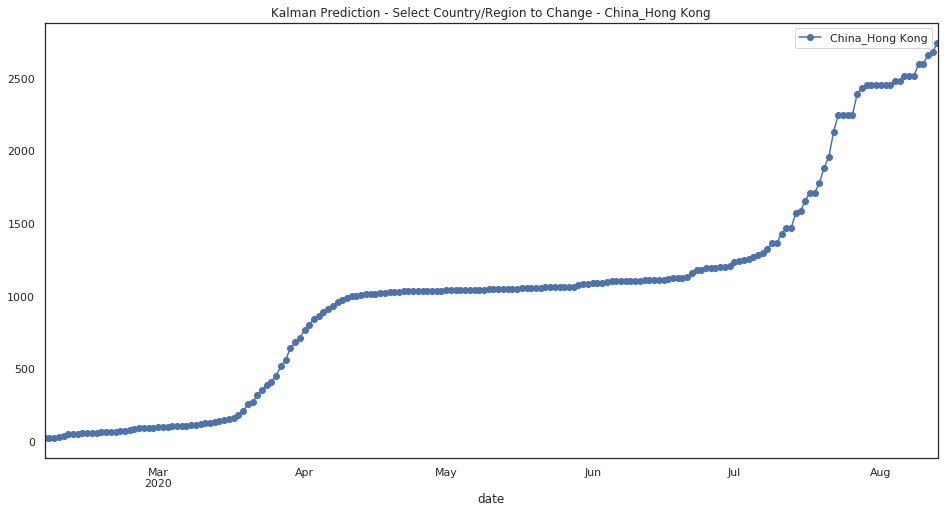

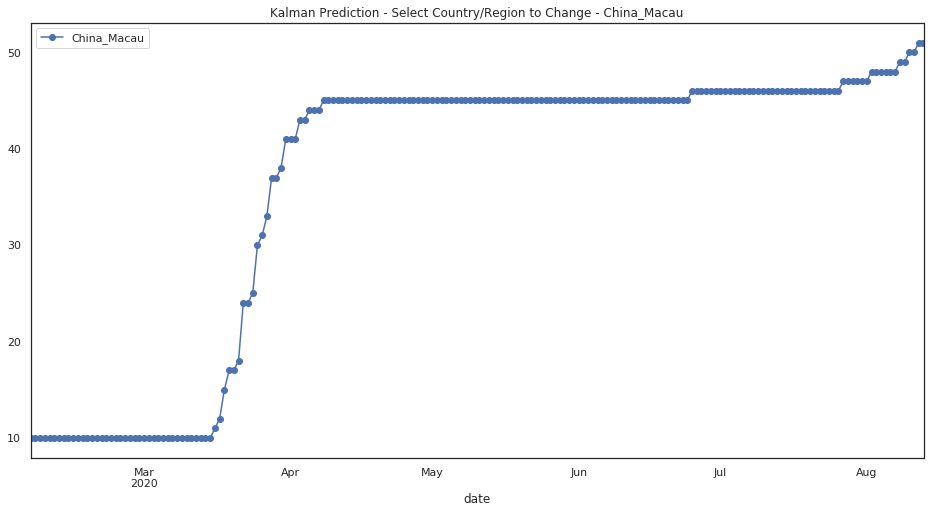

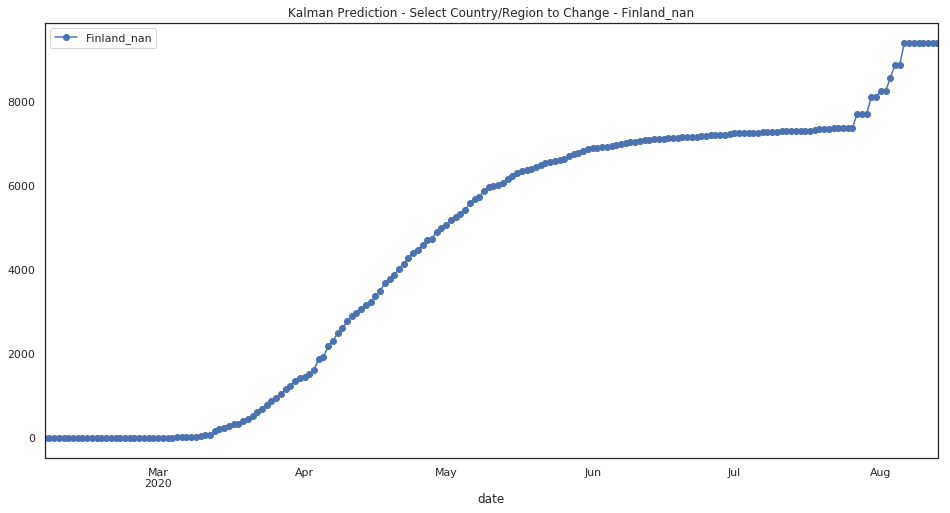

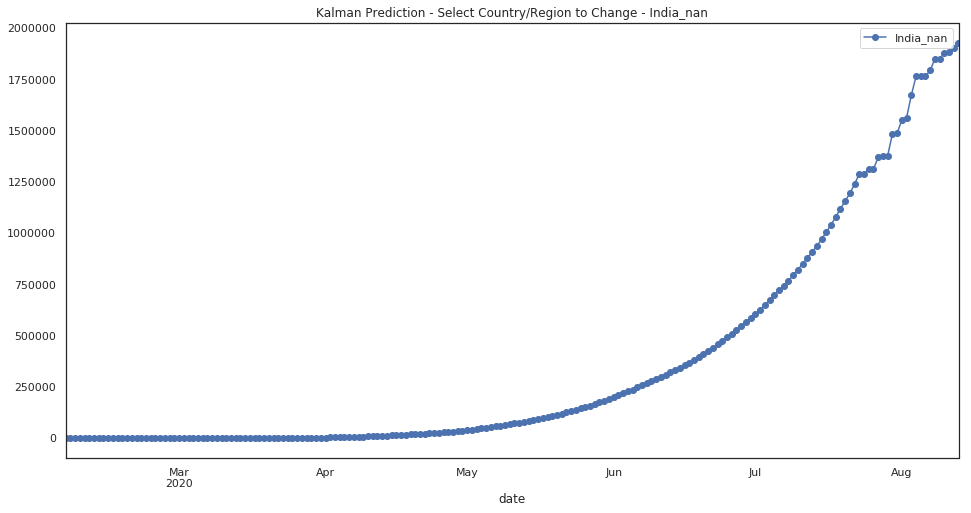

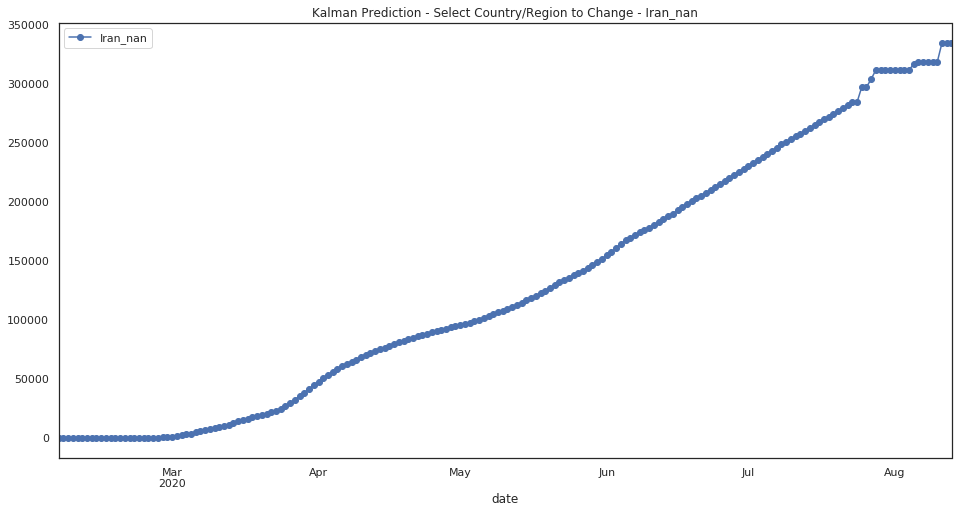

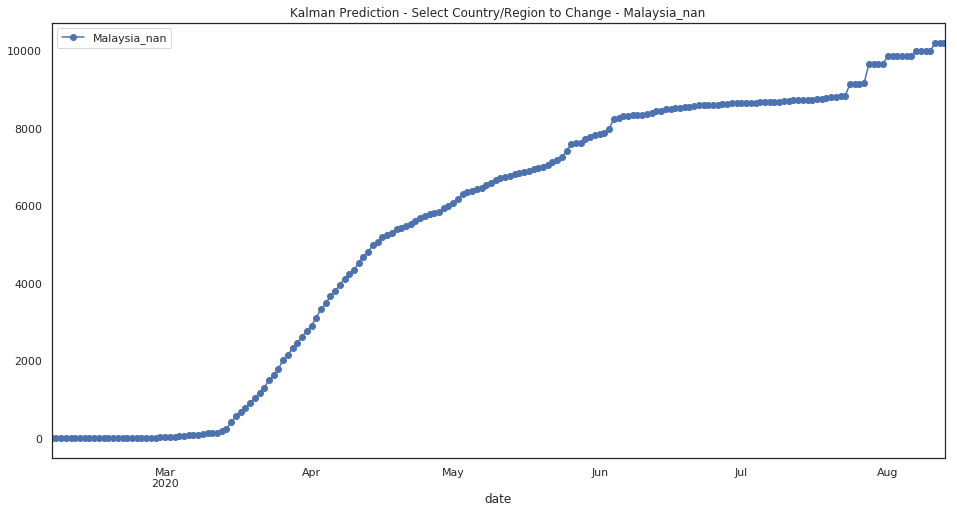

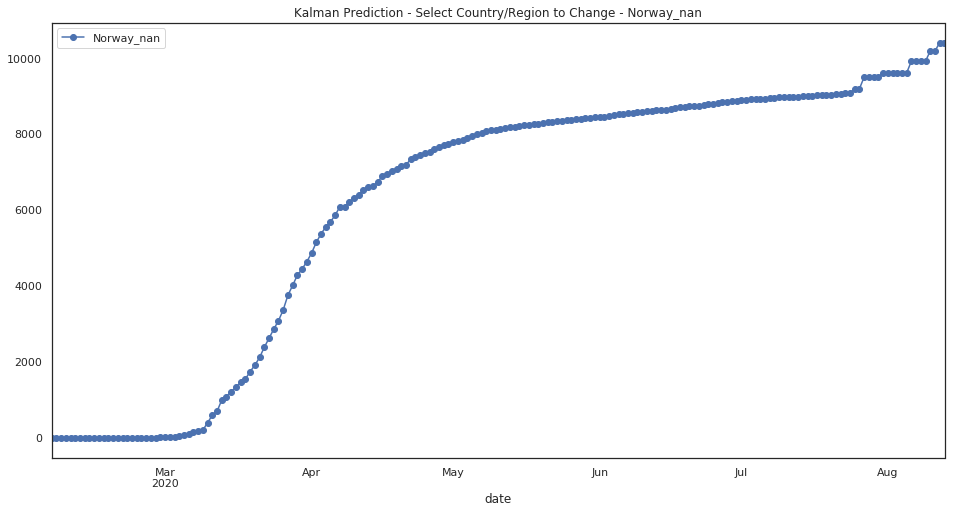

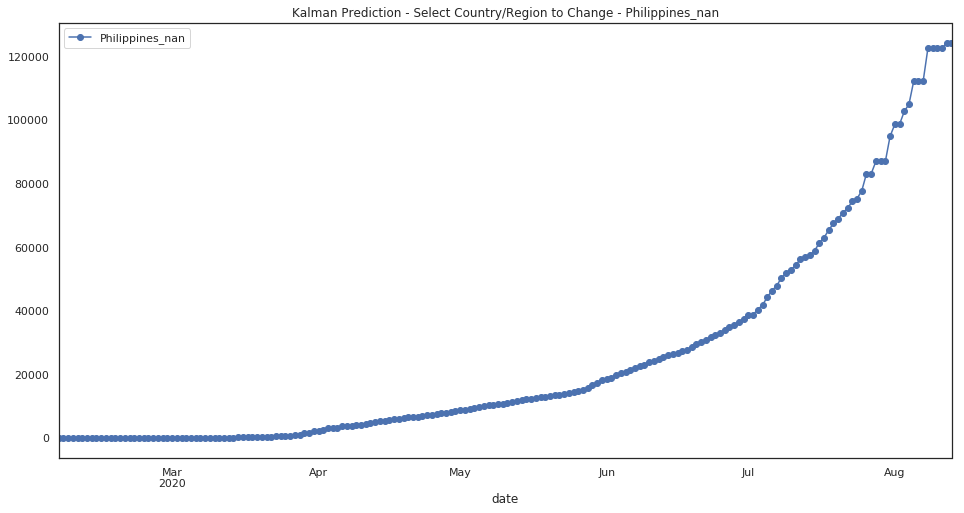

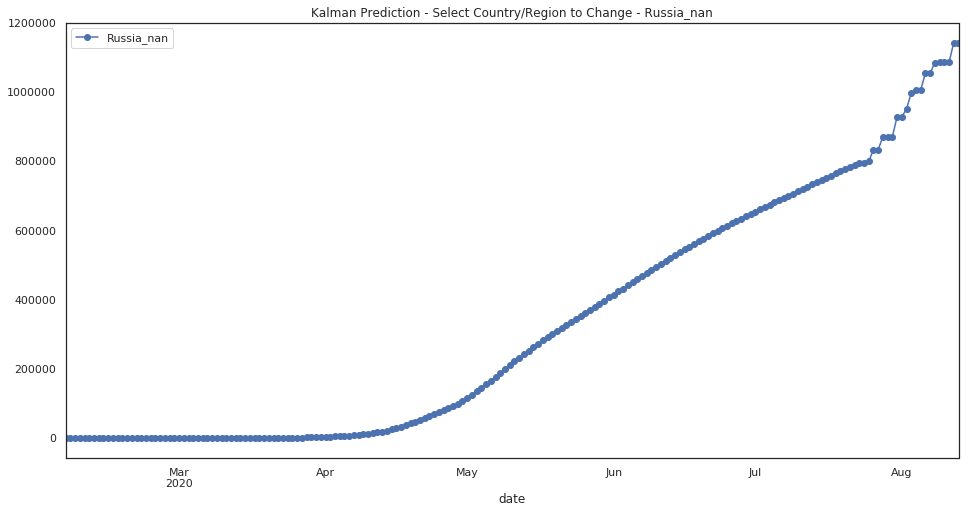

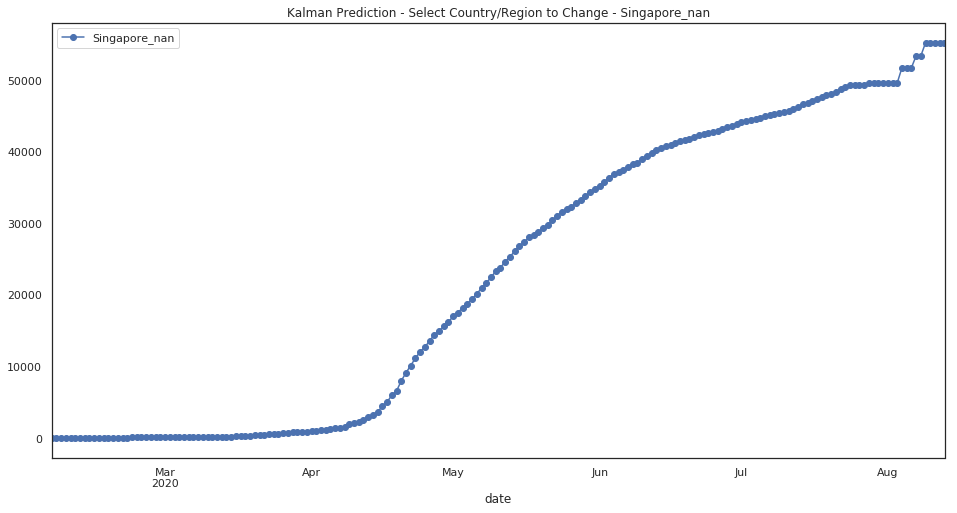

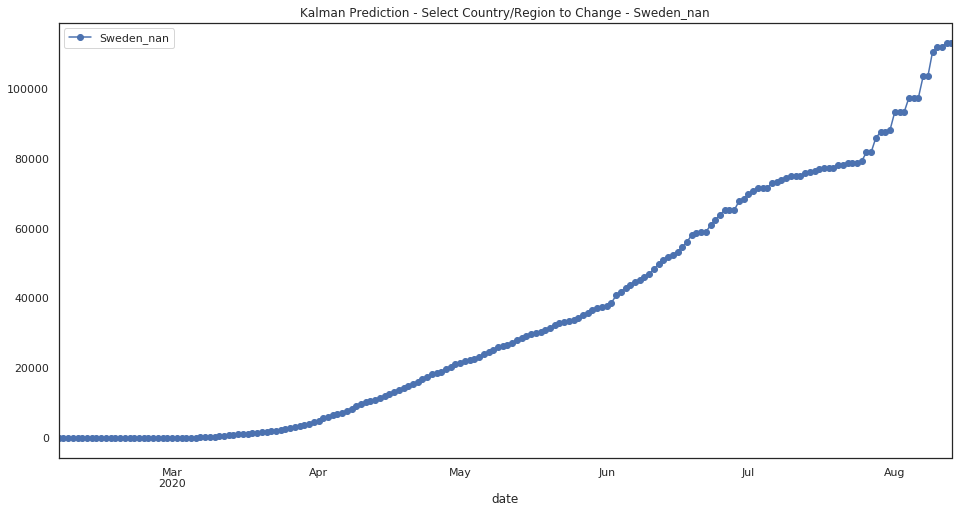

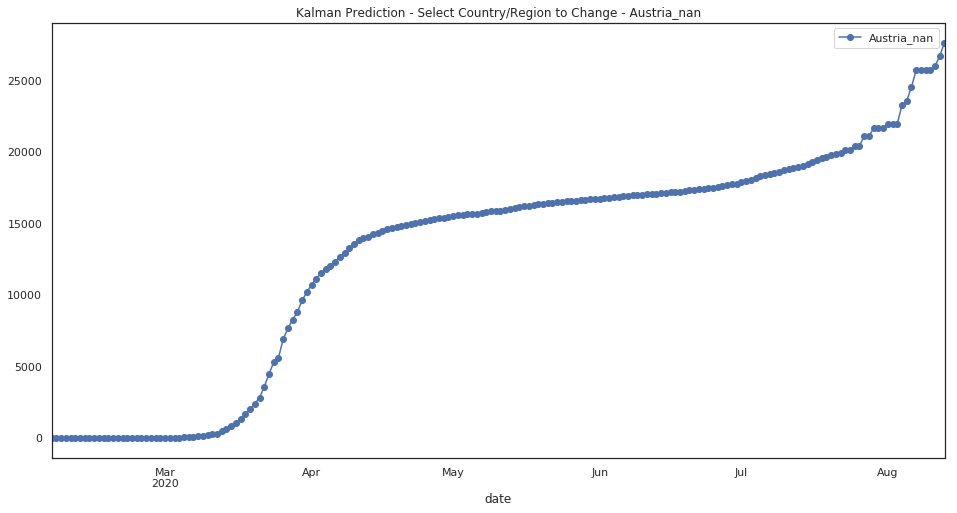

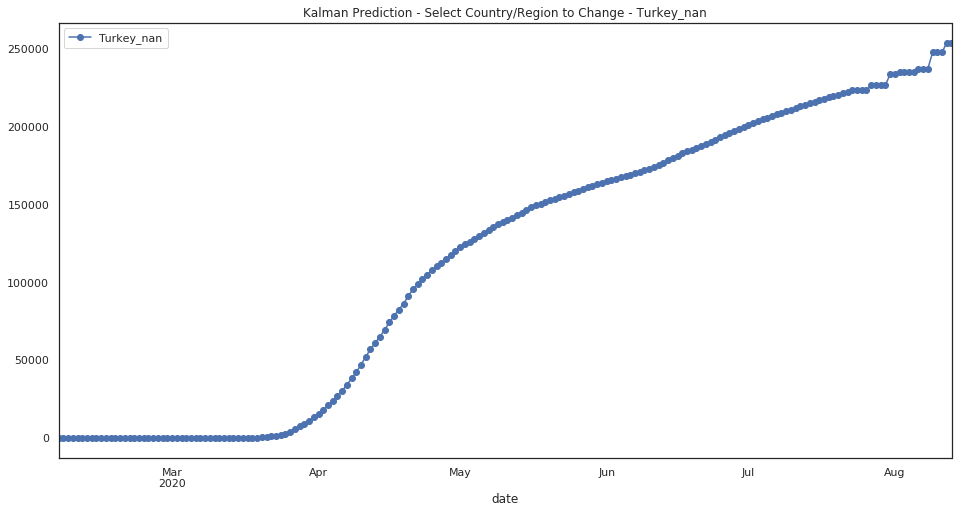

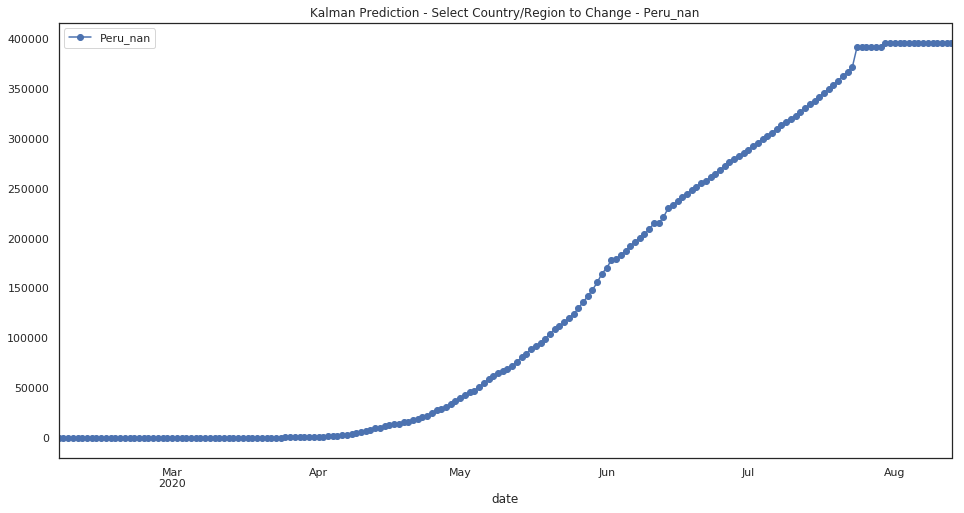

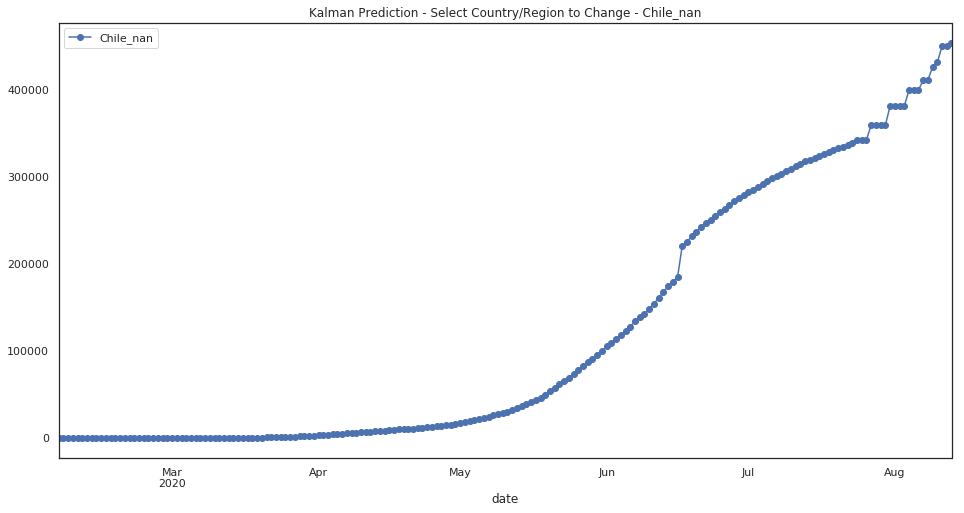

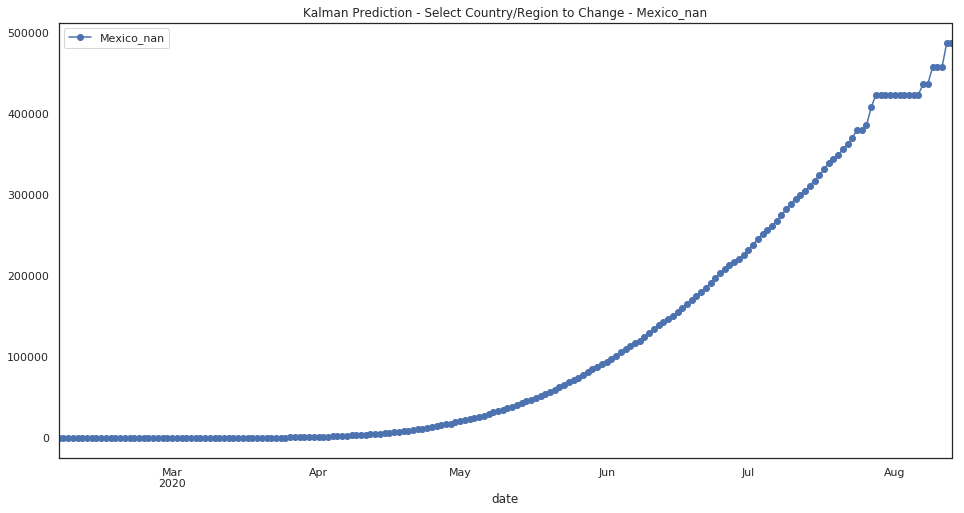

In [65]:
### Joao - Dynamic plot all regions individually
#print(region[:])
for i in range(1,len(region)):
    country_print=region[i]
    #print("here:"+country_print)
    p_kalman_rg=all_new[['date',country_print]]
    p_kalman_rg=p_kalman_rg.set_index(['date'])
    p_kalman_rg.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman_rg.columns[0]))
    

In [66]:
max_p0=all_new[:]
max_p0=max_p0.max()
max_date=max_p0[:1]
max_p0=max_p0[1:]
max_p0=pd.DataFrame(max_p0)
max_p0=max_p0.astype(str)
max_p0['pred_confirmed']=max_p0[max_p0.columns[0]].str.split(' ').str[-1].astype(float)
max_p0[max_p0.columns[0]]=max_p0[max_p0.columns[0]][:-len(max_p0['pred_confirmed'])]
max_p0=max_p0.sort_values(by='pred_confirmed', ascending=False)
#
print("### -- Confirmed max cases per country at last prediction date -- ###")
print(max_date)
max_p0[:]

### -- Confirmed max cases per country at last prediction date -- ###
date    2020-08-13 00:00:00
dtype: object


0  pred_confirmed
United States_nan                             NaN       4685769.0
Brazil_nan                                    NaN       3288162.0
India_nan                                     NaN       1929045.0
Russia_nan                                    NaN       1142331.0
South Africa_nan                              NaN        496163.0
Mexico_nan                                    NaN        487880.0
Chile_nan                                     NaN        454042.0
Colombia_nan                                  NaN        405347.0
Peru_nan                                      NaN        395760.0
United Kingdom_nan                            NaN        385310.0
Pakistan_nan                                  NaN        353399.0
Iran_nan                                      NaN        334490.0
Spain_nan                                     NaN        333308.0
Italy_nan                                     NaN        319297.0
Saudi Arabia_nan                              NaN        317257.0
Bangladesh_nan                                NaN        295490.0
France_nan                                    NaN        257872.0
Turkey_nan                                    NaN        253963.0
Germany_nan                                   NaN        233880.0
Argentina_nan                                 NaN        203314.0
Qatar_nan                                     NaN        165533.0
Indonesia_nan                                 NaN        155154.0
Egypt_nan                                     NaN        137602.0
Bolivia_nan                                   NaN        135330.0
Iraq_nan                                      NaN        131538.0
Philippines_nan                               NaN        124313.0
Sweden_nan                                    NaN        113083.0
Oman_nan                                      NaN         91068.0
Ecuador_nan                                   NaN         90828.0
Belgium_nan                                   NaN         89425.0
...                                           ...             ...
France_St Martin                              NaN            60.0
China_Macau                                   NaN            51.0
Fiji_nan                                      NaN            48.0
Canada_Prince Edward Island                   NaN            47.0
Saint Lucia_nan                               NaN            38.0
Timor-Leste_nan                               NaN            35.0
Australia_Northern Territory                  NaN            35.0
Netherlands_Curacao                           NaN            34.0
Grenada_nan                                   NaN            29.0
France_New Caledonia                          NaN            24.0
Laos_nan                                      NaN            24.0
Saint Kitts and Nevis_nan                     NaN            23.0
Dominica_nan                                  NaN            22.0
Denmark_Greenland                             NaN            18.0
Canada_Yukon                                  NaN            18.0
China_Qinghai                                 NaN            18.0
United Kingdom_Falkland Islands (Malvinas)    NaN            17.0
Canada_Grand Princess                         NaN            14.0
Holy See_nan                                  NaN            13.0
United Kingdom_Montserrat                     NaN            12.0
Western Sahara_nan                            NaN            10.0
Netherlands_Bonaire, Sint Eustatius and Saba  NaN            10.0
MS Zaandam_nan                                NaN             9.0
United Kingdom_British Virgin Islands         NaN             8.0
France_Saint Barthelemy                       NaN             6.0
Canada_Northwest Territories                  NaN             5.0
France_Saint Pierre and Miquelon              NaN             4.0
United Kingdom_Anguilla                       NaN             3.0
China_Tibet                                   NaN             1.0
Canada_Diamond Princes

In [67]:
t.to_csv(r'data/t_confirmed_global.csv', index = False, header=True)

In [68]:
all_new.to_csv(r'data/prediction_kalman_filter_global.csv', index = False, header=True)

## Iterative Regression

In [69]:
t_iter=all_new.set_index(['date'])
t_iter=t_iter.stack().reset_index(name='confirmed')
t_iter.columns=['date', 'region','confirmed']
t_iter['date']=pd.to_datetime(t_iter['date'] ,errors ='coerce')
t_iter=t_iter.sort_values(['region', 'date'])

t_iter=t_iter.reset_index(drop=True)
for i in range(1,len(t_iter)+1):
    if(t_iter.iloc[i,1] is not t_iter.iloc[i-1,1]):
        t_iter.loc[len(t_iter)+1] = [t_iter.iloc[i-1,0]+ pd.DateOffset(1),t_iter.iloc[i-1,1], 0] 
t_iter=t_iter.sort_values(['region', 'date'])
t_iter=t_iter.reset_index(drop=True)

### Joao - Fix - RuntimeWarning: divide by zero encountered in double_scalars
#
t_iter['1_day_change']=t_iter['3_day_change']=t_iter['7_day_change']=t_iter['1_day_change_rate']=t_iter['3_day_change_rate']=t_iter['7_day_change_rate']=t_iter['last_day']=0
for i in range(1,len(t_iter)):
    if(t_iter.iloc[i,1] is t_iter.iloc[i-2,1]):
        t_iter.iloc[i,3]=t_iter.iloc[i-1,2]-t_iter.iloc[i-2,2]
        t_iter.iloc[i,6]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-2,2]*100 -1 +1))*100
        t_iter.iloc[i,9]=t_iter.iloc[i-1,2]
    if(t_iter.iloc[i,1] is t_iter.iloc[i-4,1]):
        t_iter.iloc[i,4]=t_iter.iloc[i-1,2]-t_iter.iloc[i-4,2]
        t_iter.iloc[i,7]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-4,2]*100 -1 +1))*100
    if(t_iter.iloc[i,1] is t_iter.iloc[i-8,1]):
        t_iter.iloc[i,5]=t_iter.iloc[i-1,2]-t_iter.iloc[i-8,2]
        t_iter.iloc[i,8]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-8,2]*100 -1 +1))*100
t_iter=t_iter.fillna(0)  

# t_iter=t_iter.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
# t_iter=t_iter.rename(columns = {'X':'kalman_prediction'}) 
t_iter=t_iter.replace([np.inf, -np.inf], 0)
t_iter['kalman_prediction']=round(t_iter['confirmed'])

test_iter=t_iter.merge(confirmed[['region',' Population ']],how='left',on='region')
test_iter=test_iter.rename(columns = {' Population ':'population'})
test_iter['population']=test_iter['population'].str.replace(r" ", '')
test_iter['population']=test_iter['population'].str.replace(r",", '')
test_iter['population']=test_iter['population'].fillna(10000000) # Fill 10M population if null
test_iter['population']=test_iter['population'].astype('int32')
## Joao - Fix Divid By Zero
#test_iter['infected_rate'] =test_iter['last_day']/test_iter['population']*10000
#test_iter['infected_rate'] =((test_iter['last_day']+1)*10000)/((test_iter['population']+1)*100)*100
test_iter['infected_rate']=(((test_iter['last_day'] +1)*100)/((test_iter['population'] +1)*100000) *10)
#
test_iter=test_iter.merge(w,how='left',on=['date','region'])
#test_iter=test_iter.sort_values(['region', 'date'])

test_iter_temp=test_iter[np.isnan(test_iter['min'])]
test_iter_temp=test_iter_temp.drop(columns=['min', 'max'])
test_iter_temp=test_iter_temp.merge(w_forecast,how='left',on=['date','region'])
test_iter=test_iter.dropna()
test_iter=test_iter.append(test_iter_temp)
test_iter=test_iter.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(test_iter)):
    if(np.isnan(test_iter.iloc[i,13])):
        if(test_iter.iloc[i,1] is test_iter.iloc[i-1,1]):
            test_iter.iloc[i,13]=test_iter.iloc[i-1,13]+abs(test_iter.iloc[i-1,13]*.01)
            test_iter.iloc[i,14]=test_iter.iloc[i-1,14]+abs(test_iter.iloc[i-1,14]*.01)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


In [70]:
test_iter=test_iter.fillna(0) 
test_iter[test_iter.isnull().any(axis=1)]


Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [71]:
### JOAO - ERROR - ValueError: Index contains duplicate entries, cannot reshape
pred=reg.predict(test_iter[x_col]); pred=pd.DataFrame(pred); pred.columns = ['prediction'];pred=round(pred)
pred['confirmed']=test_iter['confirmed'].values; pred['date']=test_iter['date'].values; pred['region']=test_iter['region'].values

for i in range(1,len(pred)):
    if(pred.iloc[i,3] is pred.iloc[i-1,3]):
        if(pred.iloc[i,0]<pred.iloc[i-1,1]):
            pred.iloc[i,0]=pred.iloc[i-1,1]
### JOAO - Drop Duplicates
pred=pred.drop_duplicates(subset=['date','region'], keep='last', inplace=False)        
### Joao - Save long term predictions
pred.to_csv('data/pred_'+str(num_days_R_prediction)+'_days.csv', index = False, header=True)
###
pred=pred.pivot(index='date',columns='region',values='prediction') # pivot pred df

In [72]:
pred[:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-02-06              9.0          9.0          9.0          9.0   
2020-02-07              9.0          9.0          9.0          9.0   
2020-02-08              9.0          9.0          9.0          9.0   
2020-02-09              9.0          9.0          9.0          9.0   
2020-02-10              9.0          9.0          9.0          9.0   
2020-02-11              9.0          9.0          9.0          9.0   
2020-02-12              9.0          9.0          9.0          9.0   
2020-02-13              9.0          9.0          9.0          9.0   
2020-02-14              9.0          9.0          9.0          9.0   
2020-02-15              9.0          9.0          9.0          9.0   
2020-02-16              9.0          9.0          9.0          9.0   
2020-02-17              9.0          9.0          9.0          9.0   
2020-02-18              8.0          9.0         23.0          9.0   
2020-02-19             15.0          9.0         24.0          9.0   
2020-02-20              8.0          9.0         28.0          9.0   
2020-02-21              7.0          9.0         25.0          9.0   
2020-02-22             16.0          9.0         25.0          9.0   
2020-02-23             18.0          9.0         27.0          9.0   
2020-02-24             20.0          9.0         17.0          9.0   
2020-02-25             18.0          9.0         30.0          9.0   
2020-02-26              3.0          9.0         26.0          9.0   
2020-02-27              6.0          9.0          5.0          9.0   
2020-02-28              7.0          9.0         16.0          9.0   
2020-02-29              8.0          9.0         21.0          9.0   
2020-03-01              8.0          9.0         26.0          9.0   
2020-03-02              9.0          9.0         27.0          9.0   
2020-03-03             12.0          9.0         17.0         11.0   
2020-03-04              7.0          9.0         49.0          1.0   
2020-03-05              5.0          9.0         96.0          1.0   
2020-03-06              6.0          9.0         68.0          3.0   
...                     ...          ...          ...          ...   
2020-07-16          35282.0       3834.0      21381.0        862.0   
2020-07-17          35163.0       3952.0      21985.0        877.0   
2020-07-18          35401.0       3978.0      22592.0        880.0   
2020-07-19          35439.0       4112.0      23210.0        880.0   
2020-07-20          35680.0       4184.0      23717.0        880.0   
2020-07-21          35676.0       4250.0      24394.0        884.0   
2020-07-22          35756.0       4397.0      24980.0        884.0   
2020-07-23          35878.0       4427.0      25570.0        889.0   
2020-07-24          36129.0       4561.0      26185.0        889.0   
2020-07-25          35947.0       4504.0      28013.0        929.0   
2020-07-26          38351.0       4503.0      27064.0        929.0   
2020-07-27          37364.0       4751.0      28622.0        929.0   
2020-07-28          37364.0       5064.0      31440.0        929.0   
2020-07-29          37649.0       4871.0      29867.0        958.0   
2020-07-30          39682.0       4873.0      30931.0        958.0   
2020-07-31          40222.0       5172.0      30910.0       1011.0   
2020-08-01          39536.0       5061.0      35020.0       1011.0   
2020-08-02          39645.0       5061.0      33206.0       1067.0   
2020-08-03          39859.0       5078.0      33055.0       1067.0   
2020-08-04          43251.0       5032.0      33461.0       1067.0   
2020-08-05          41712.0       5290.0      33462.0       1067.0   
2020-08-06          41564.0       5174.0      33372.0       1067.0   
2020-08-07          41924.0       5601.0      33373.0       1067.0   
2020-08-08          41902.0       5544.0      32924.0       1067.0   
2020-08-09

In [73]:
### JOAO - FIX - issue if all source days ts[:]
## Comment for -35days start. 26feb.2020 ts=ts[35:]
#pred=pred[:-1]

In [74]:
region1=max_p0[max_p0.columns[0]].astype(str).reset_index().rename(columns={"index": "region"}).get_values()
region=[region[0] for region in region1]
region

['United States_nan',
 'Brazil_nan',
 'India_nan',
 'Russia_nan',
 'South Africa_nan',
 'Mexico_nan',
 'Chile_nan',
 'Colombia_nan',
 'Peru_nan',
 'United Kingdom_nan',
 'Pakistan_nan',
 'Iran_nan',
 'Spain_nan',
 'Italy_nan',
 'Saudi Arabia_nan',
 'Bangladesh_nan',
 'France_nan',
 'Turkey_nan',
 'Germany_nan',
 'Argentina_nan',
 'Qatar_nan',
 'Indonesia_nan',
 'Egypt_nan',
 'Bolivia_nan',
 'Iraq_nan',
 'Philippines_nan',
 'Sweden_nan',
 'Oman_nan',
 'Ecuador_nan',
 'Belgium_nan',
 'Dominican Republic_nan',
 'Ukraine_nan',
 'Belarus_nan',
 'Kazakhstan_nan',
 'Canada_Quebec',
 'Israel_nan',
 'United Arab Emirates_nan',
 'China_Hubei',
 'Kuwait_nan',
 'Bahrain_nan',
 'Romania_nan',
 'Netherlands_nan',
 'Panama_nan',
 'Nigeria_nan',
 'Portugal_nan',
 'Singapore_nan',
 'Guatemala_nan',
 'Poland_nan',
 'Armenia_nan',
 'Kyrgyzstan_nan',
 'Canada_Ontario',
 'Honduras_nan',
 'Azerbaijan_nan',
 'Ghana_nan',
 'Afghanistan_nan',
 'Switzerland_nan',
 'Moldova_nan',
 'Japan_nan',
 'Algeria_nan',
 '

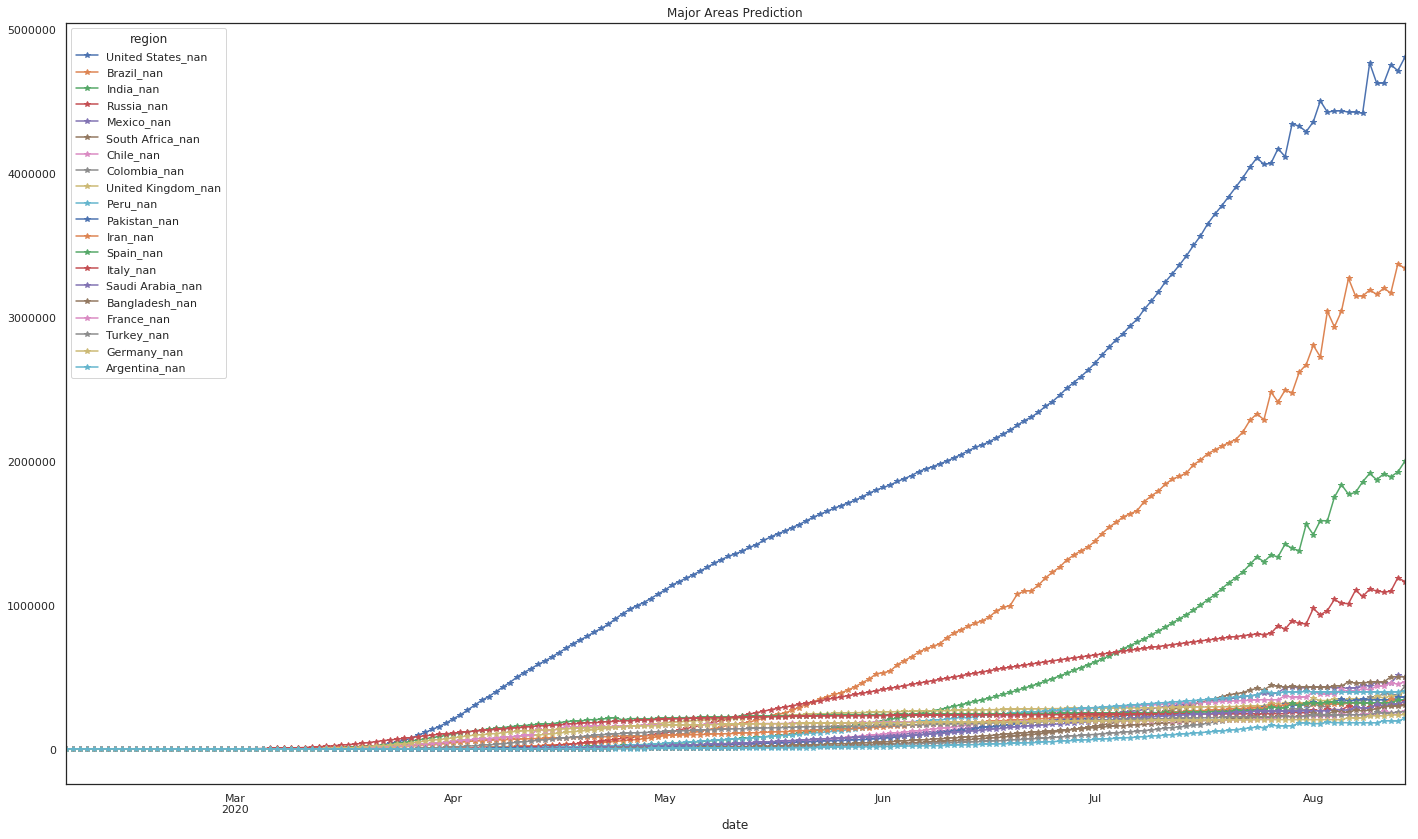

In [75]:
#
p=pred[region[:20]]
p[:].reindex(p.max().sort_values(ascending=False).index, axis=1).plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

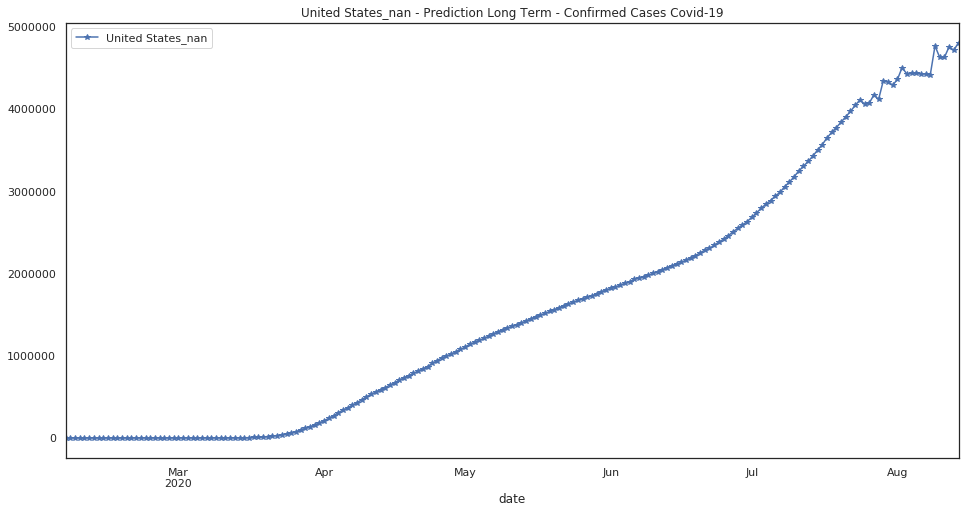

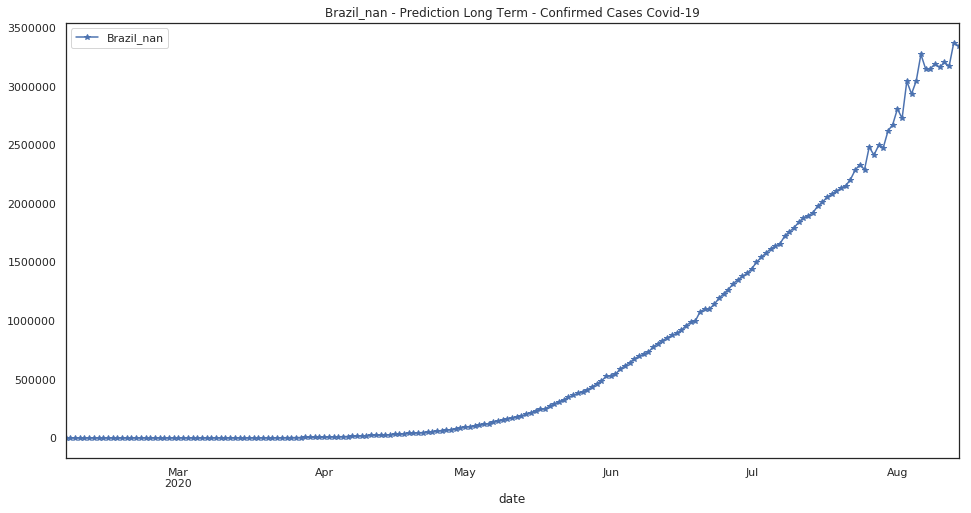

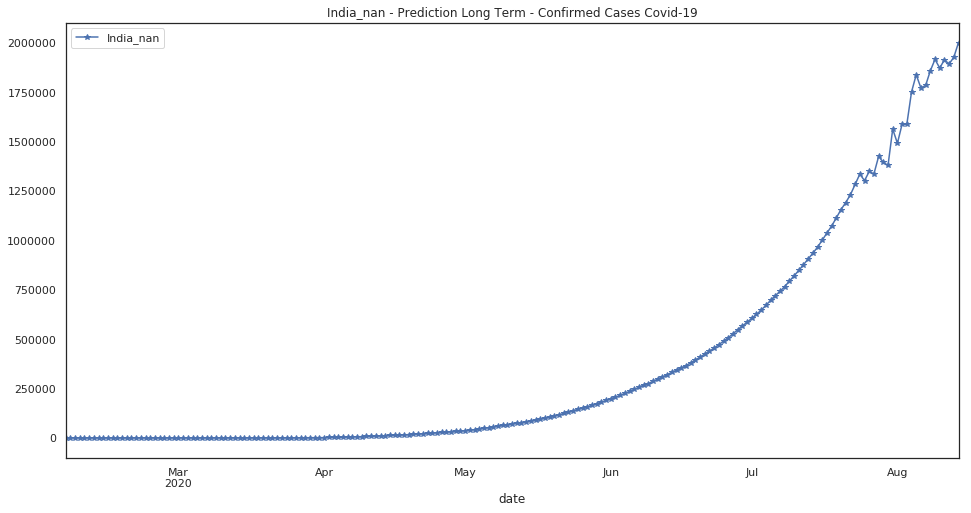

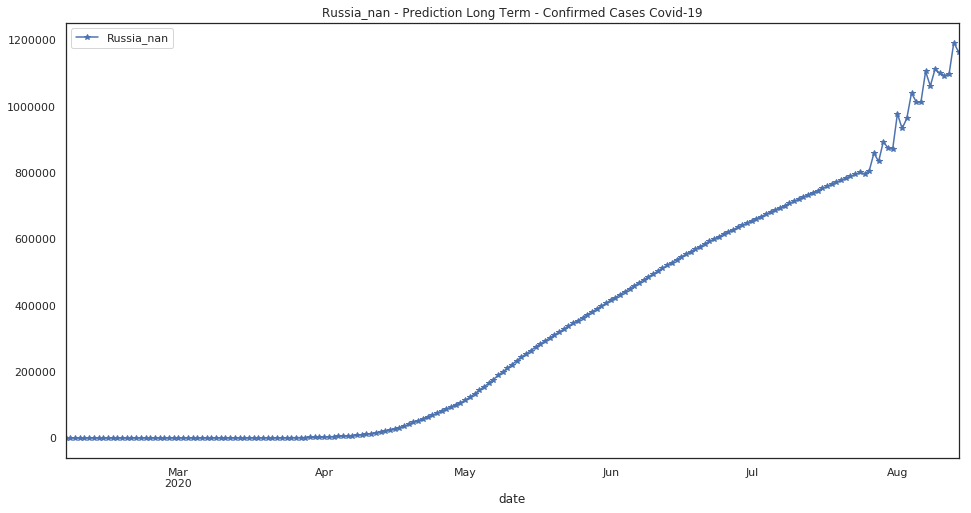

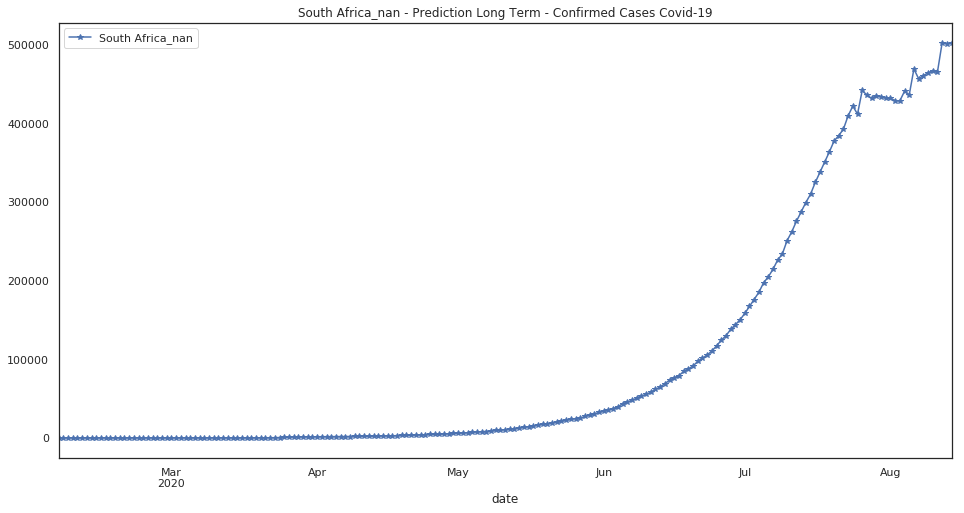

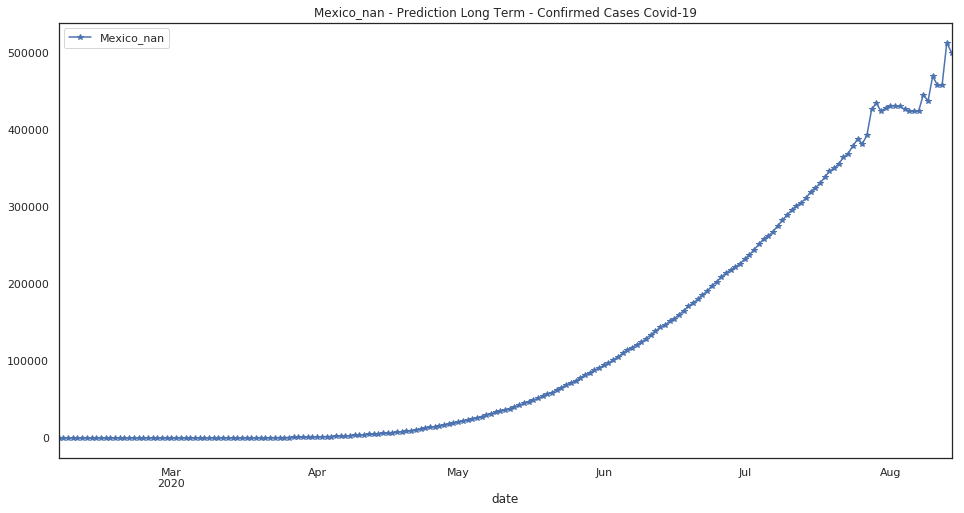

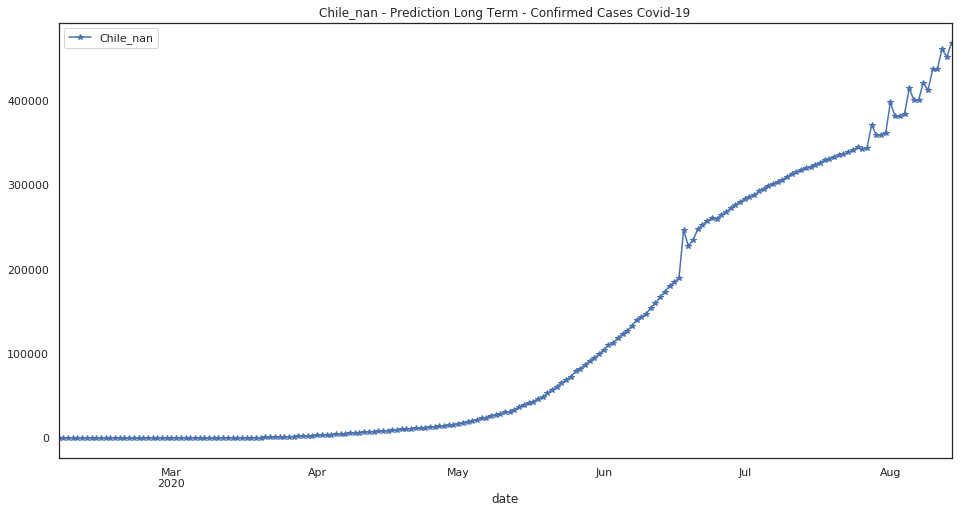

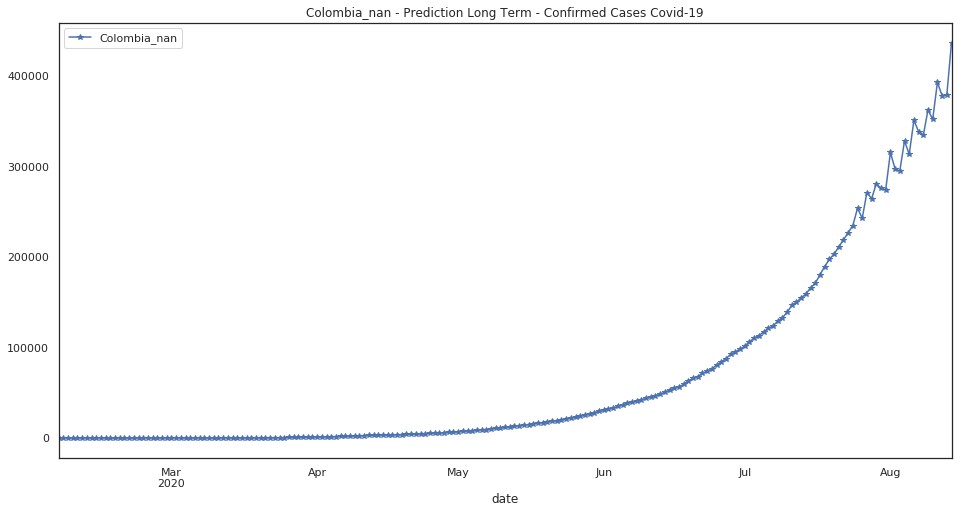

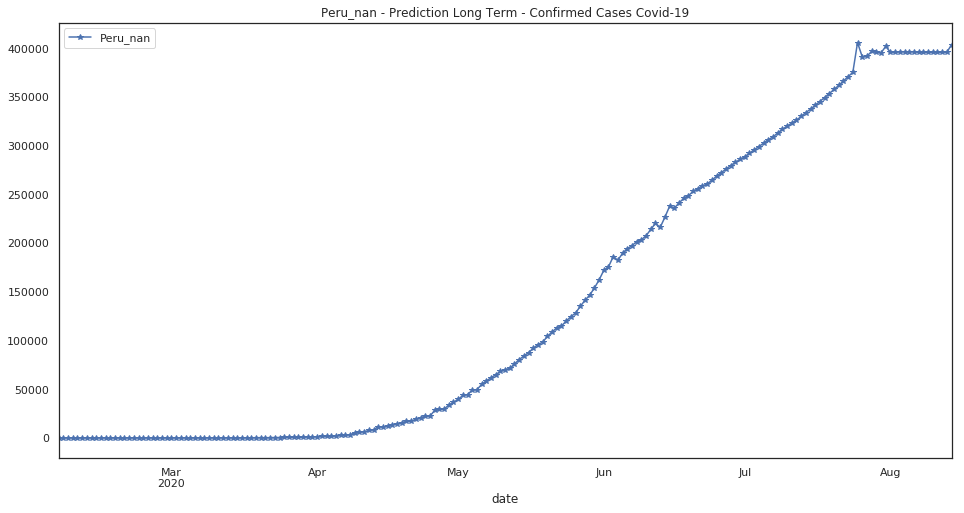

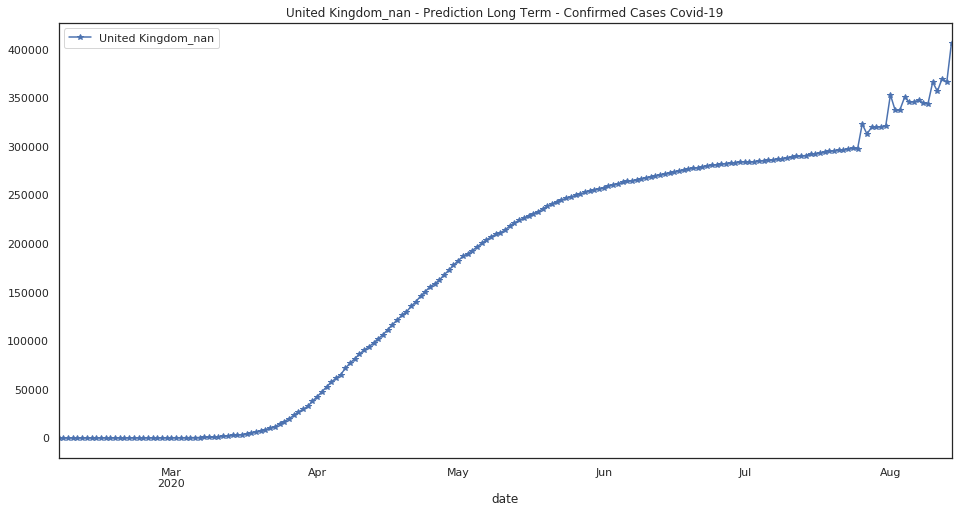

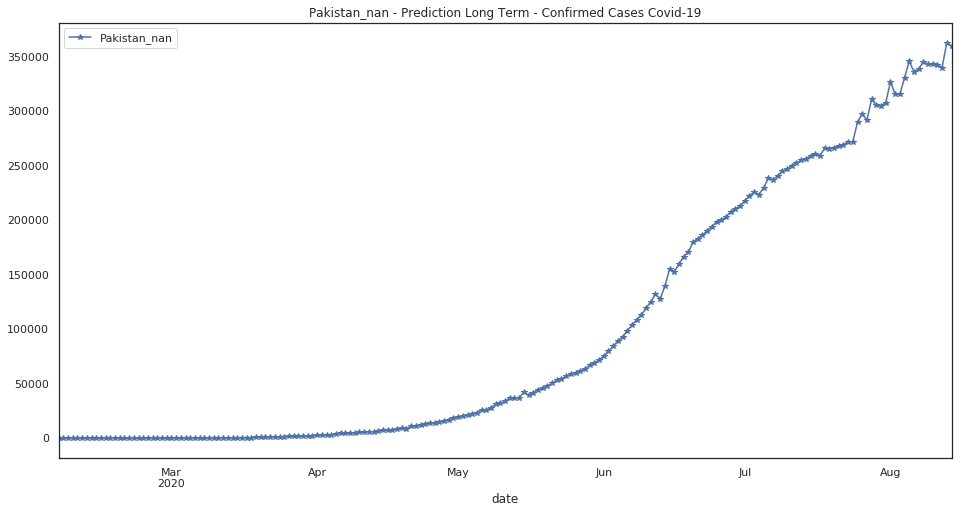

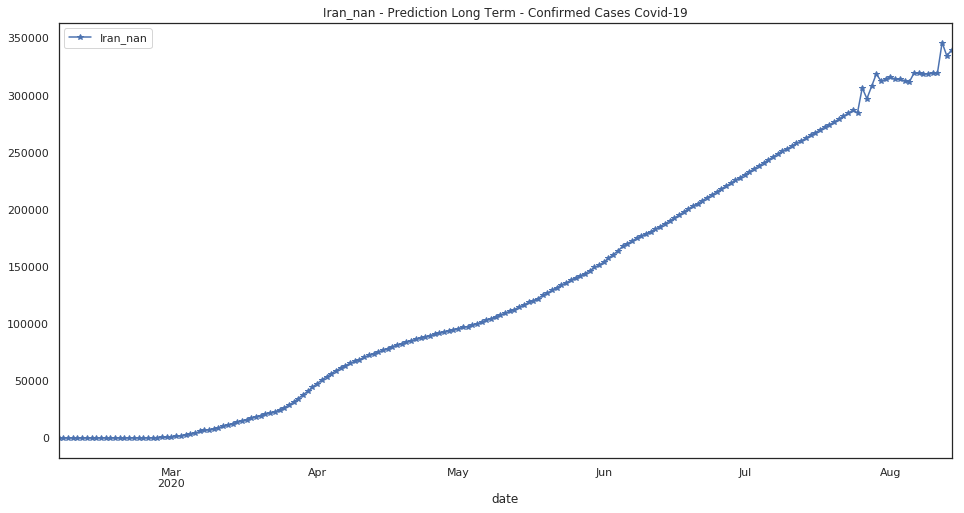

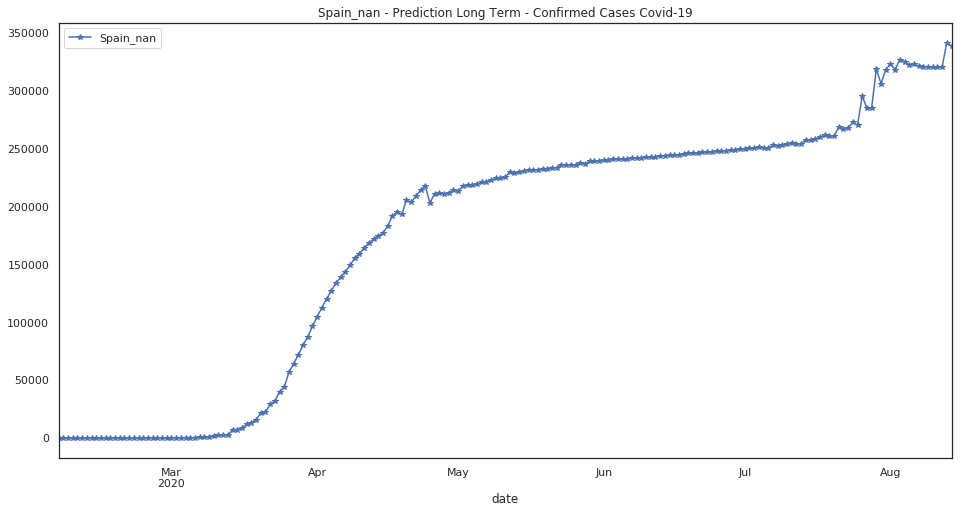

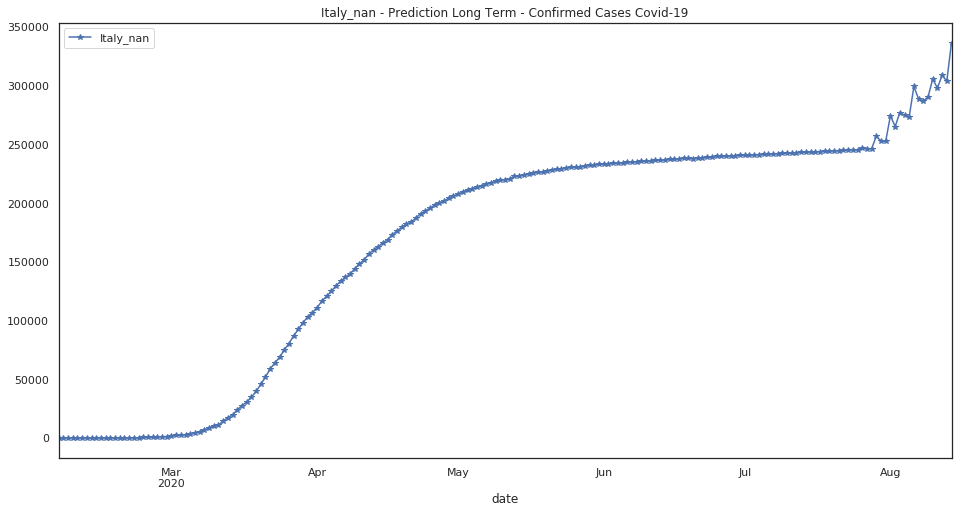

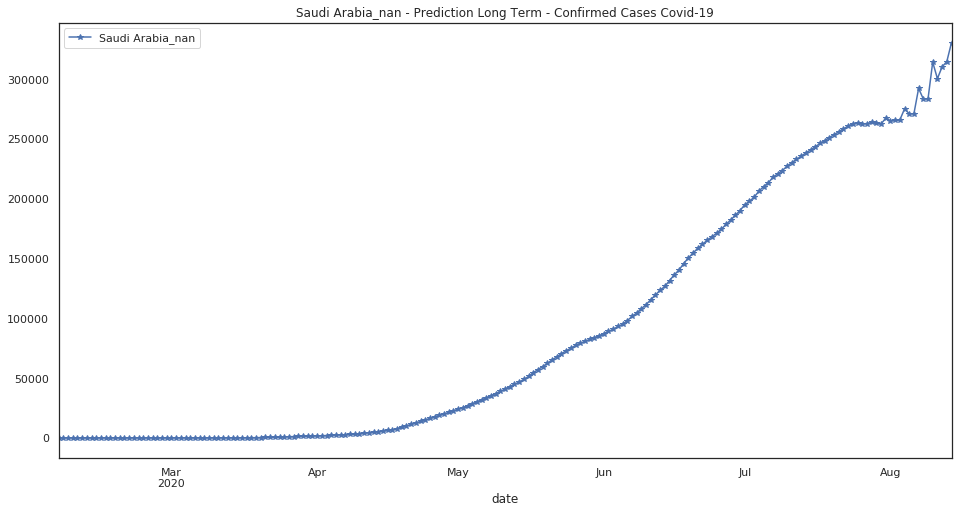

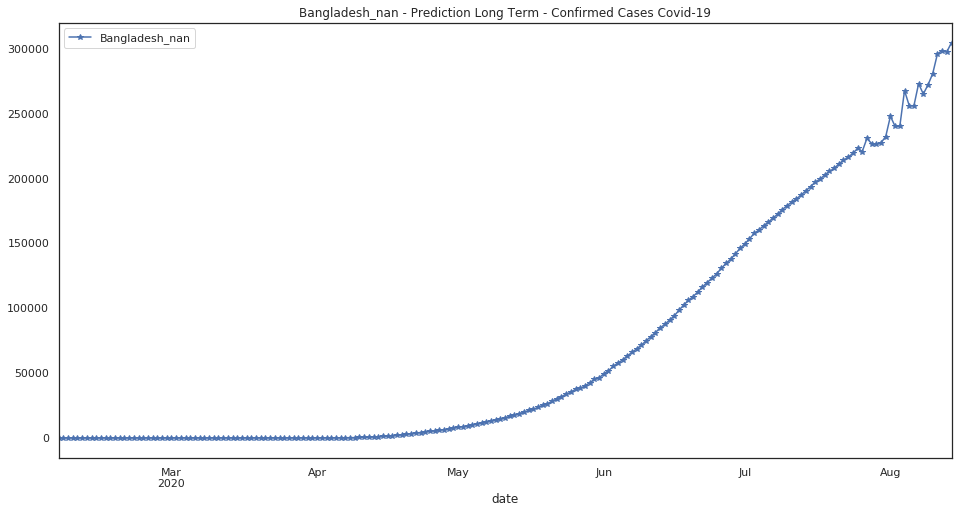

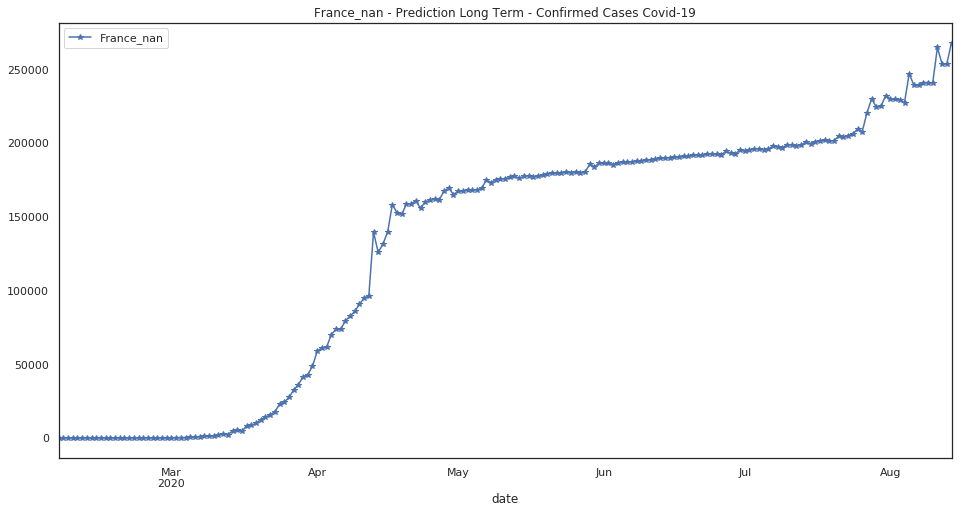

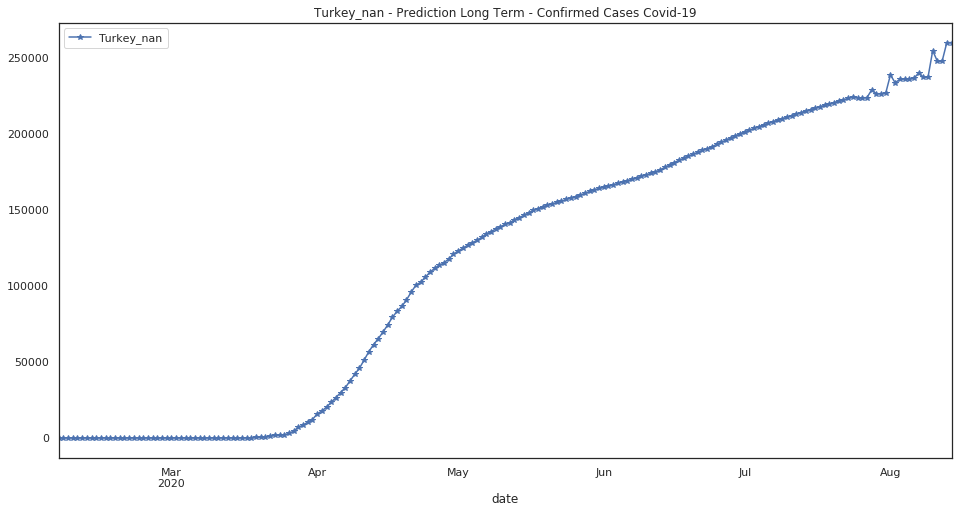

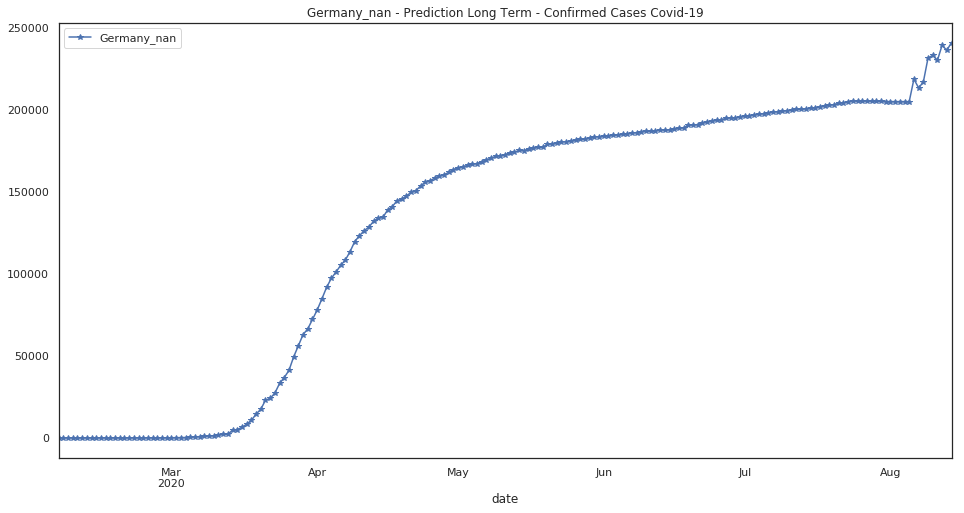

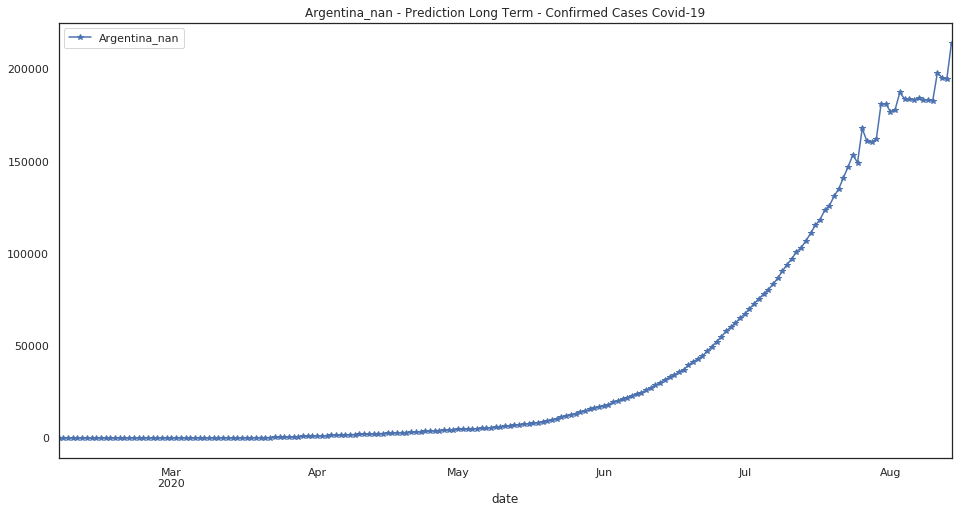

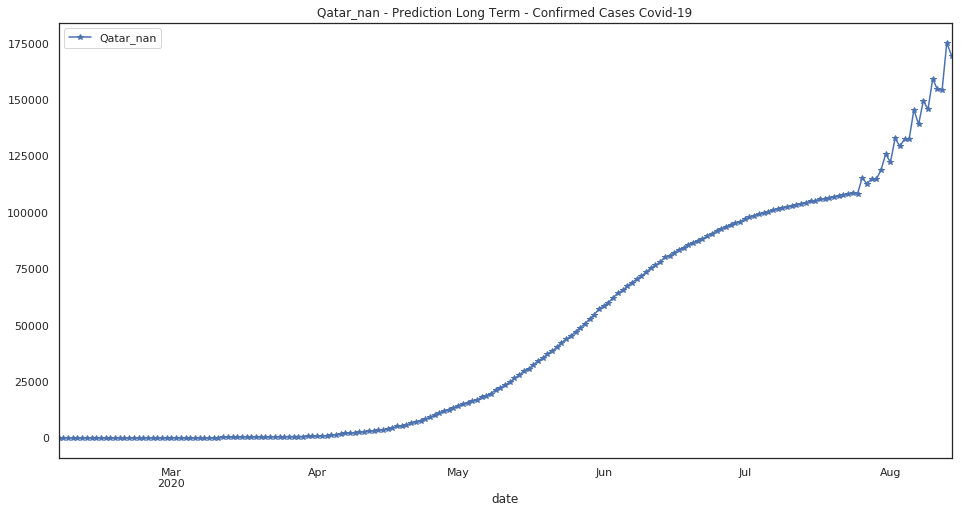

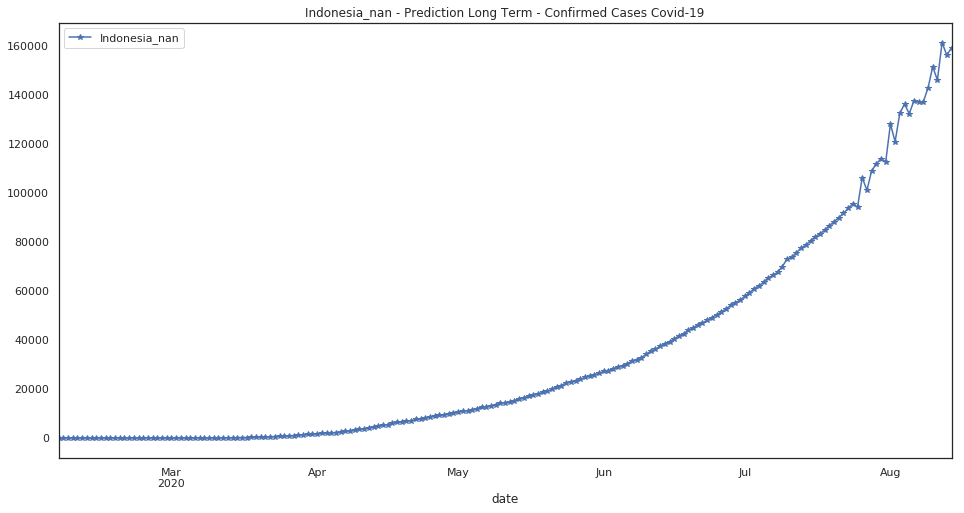

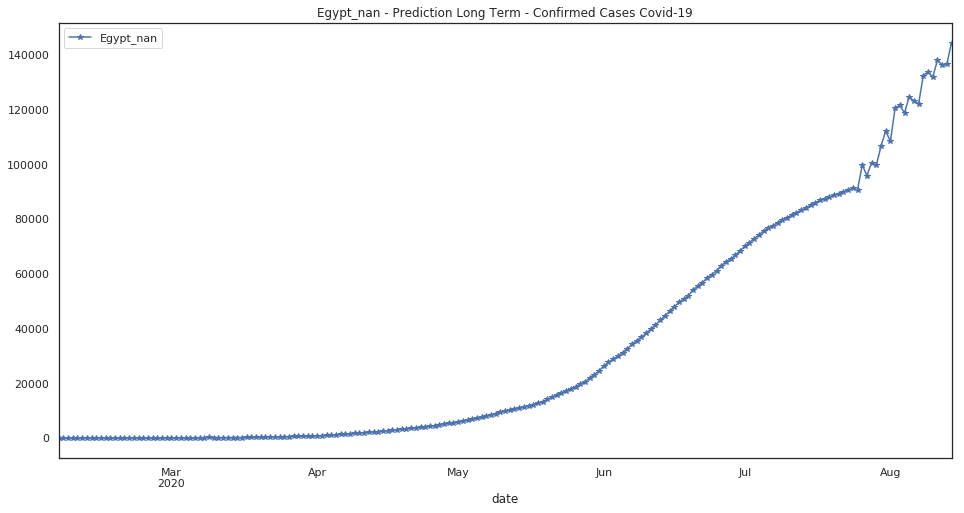

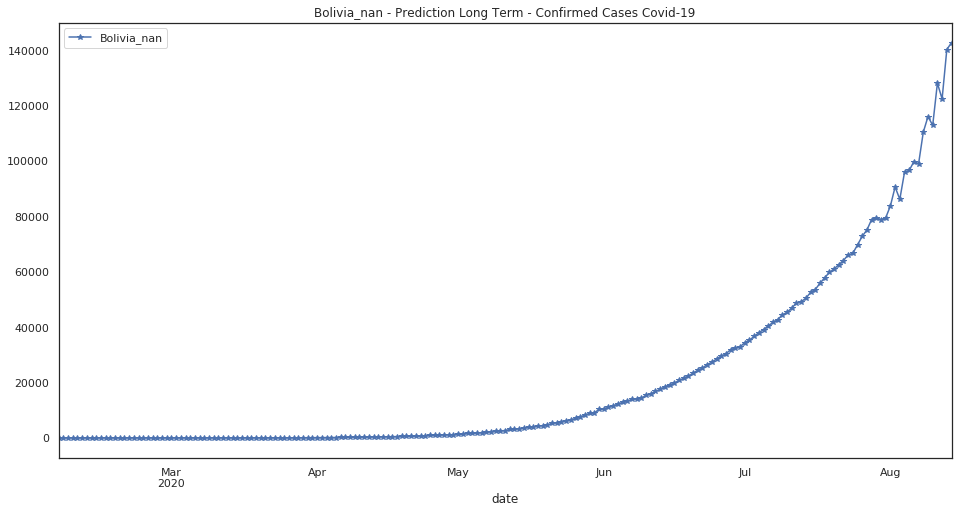

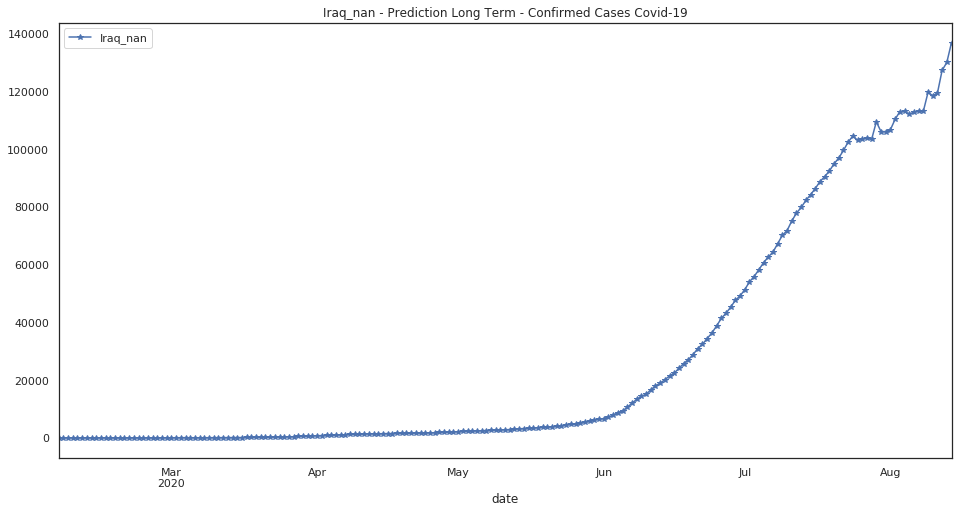

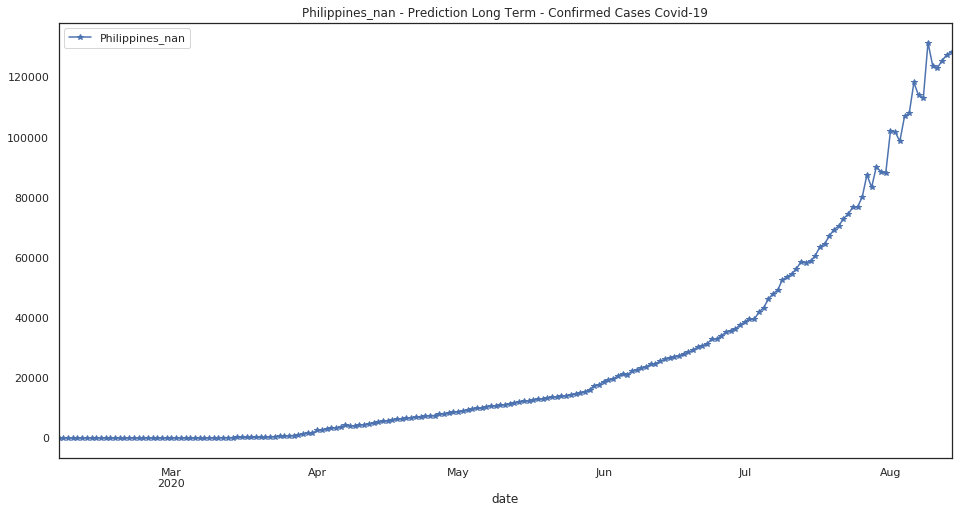

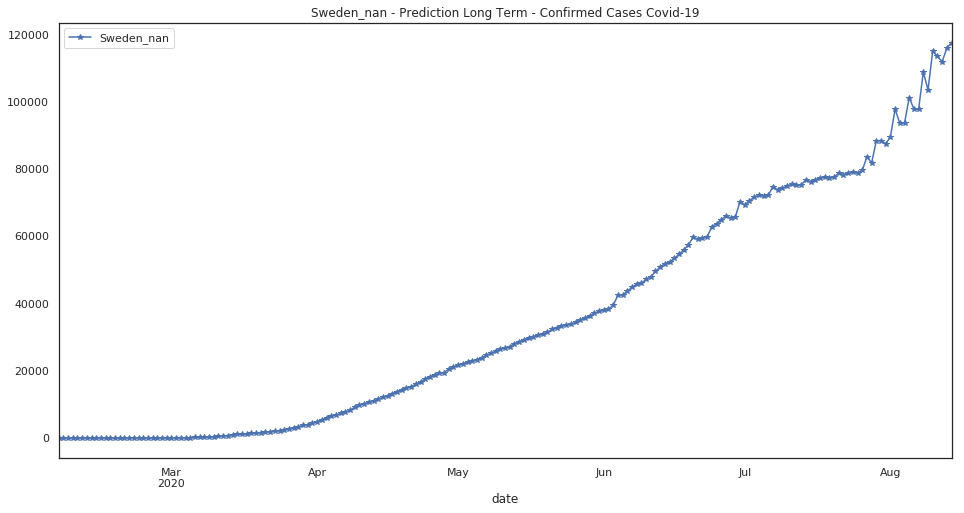

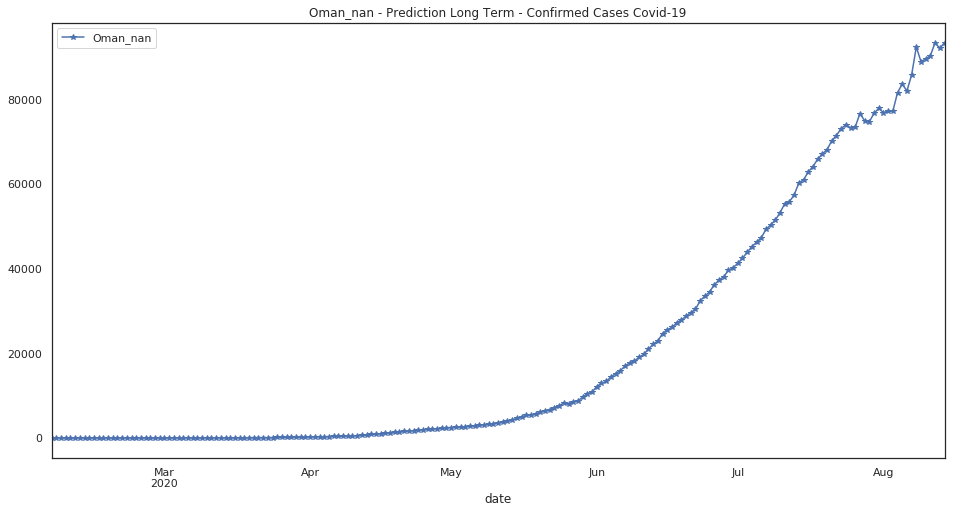

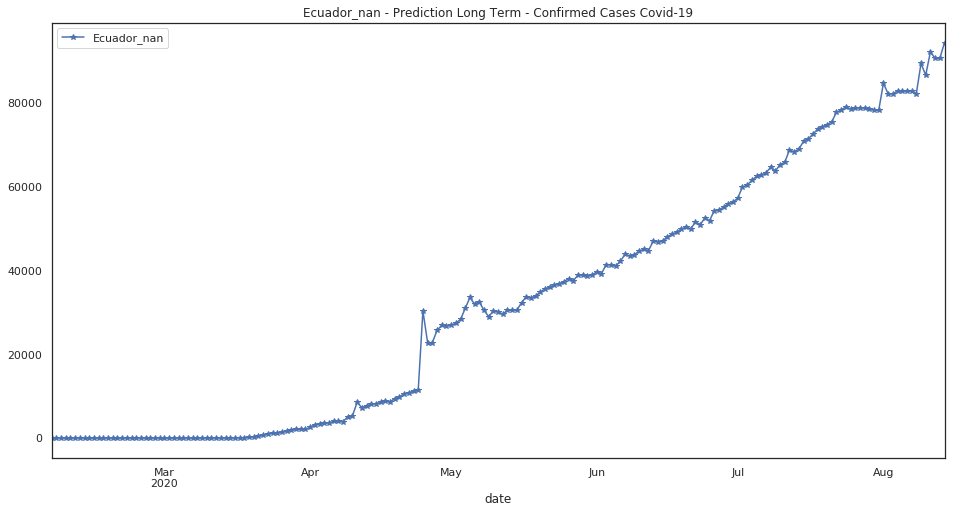

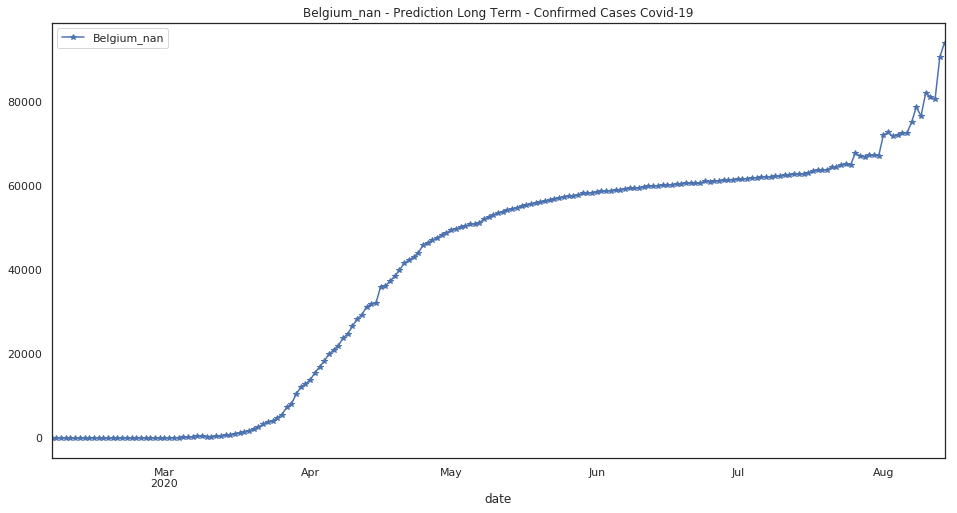

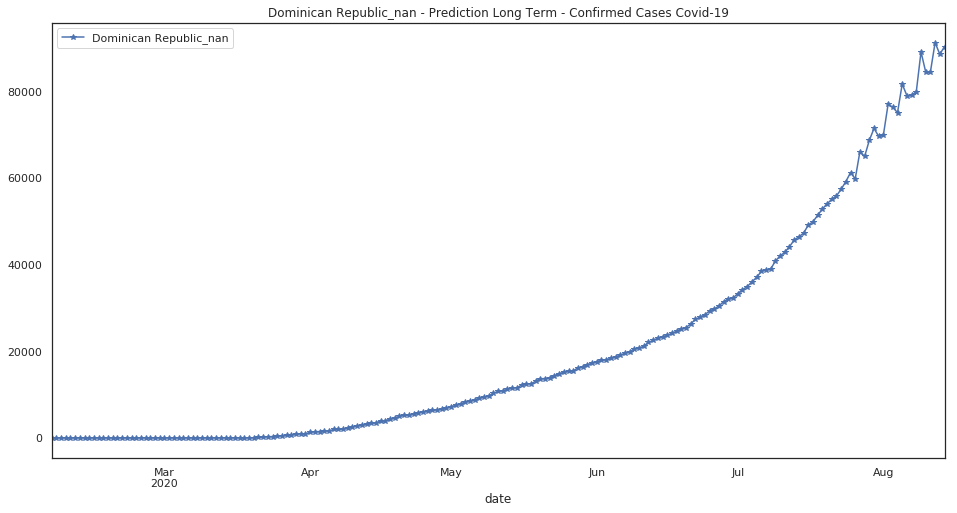

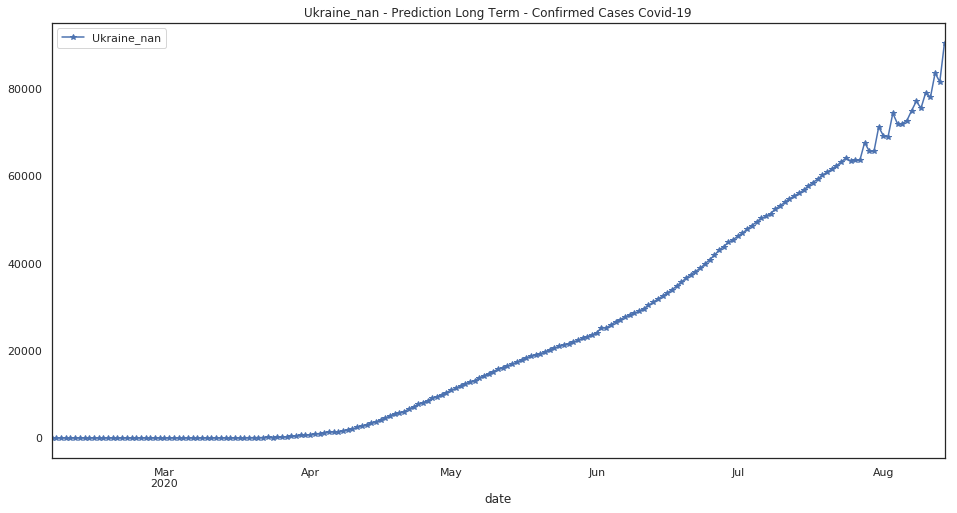

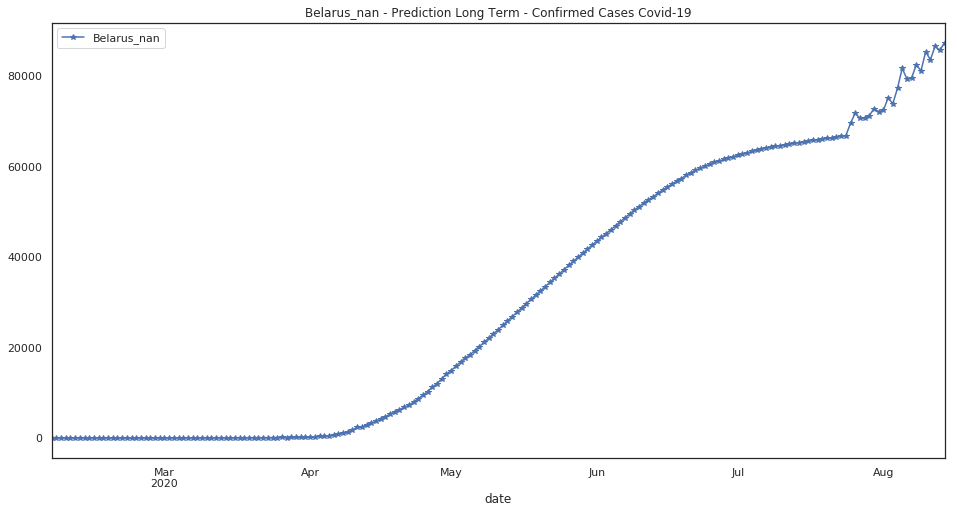

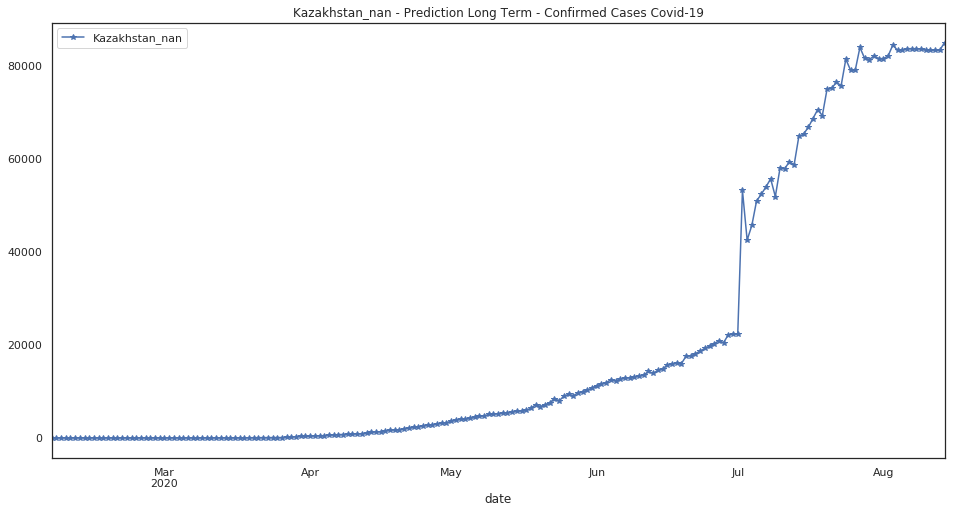

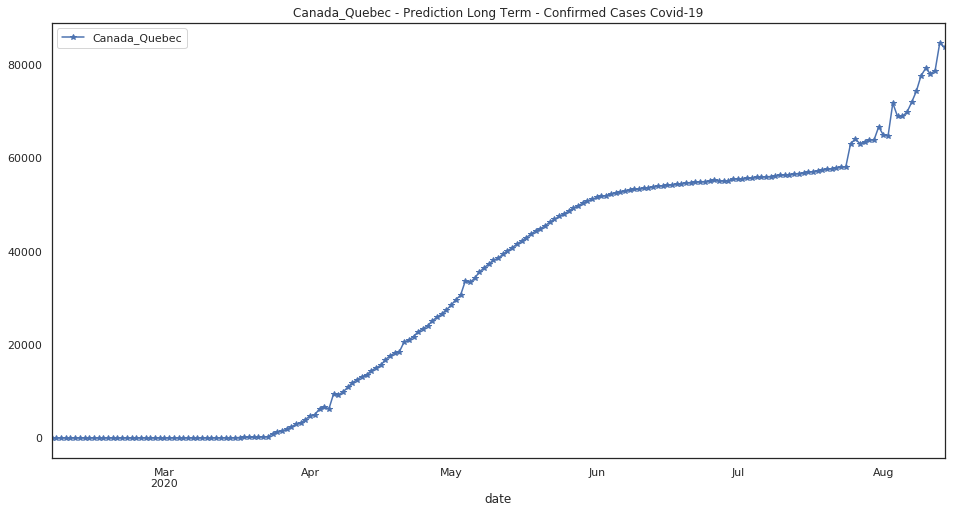

In [76]:
#
rgsx=region[:35]
for i in range (0,len(rgsx)):
        rg_print=rgsx[i]
        pred_prg=pd.DataFrame()
        pred_prg=pred[rg_print]
        pred_prg[:].plot(marker='*',figsize=(16,8),title =rg_print+' - Prediction Long Term - Confirmed Cases Covid-19')
        plt.legend(loc = 'upper left')
        plt.show()
#

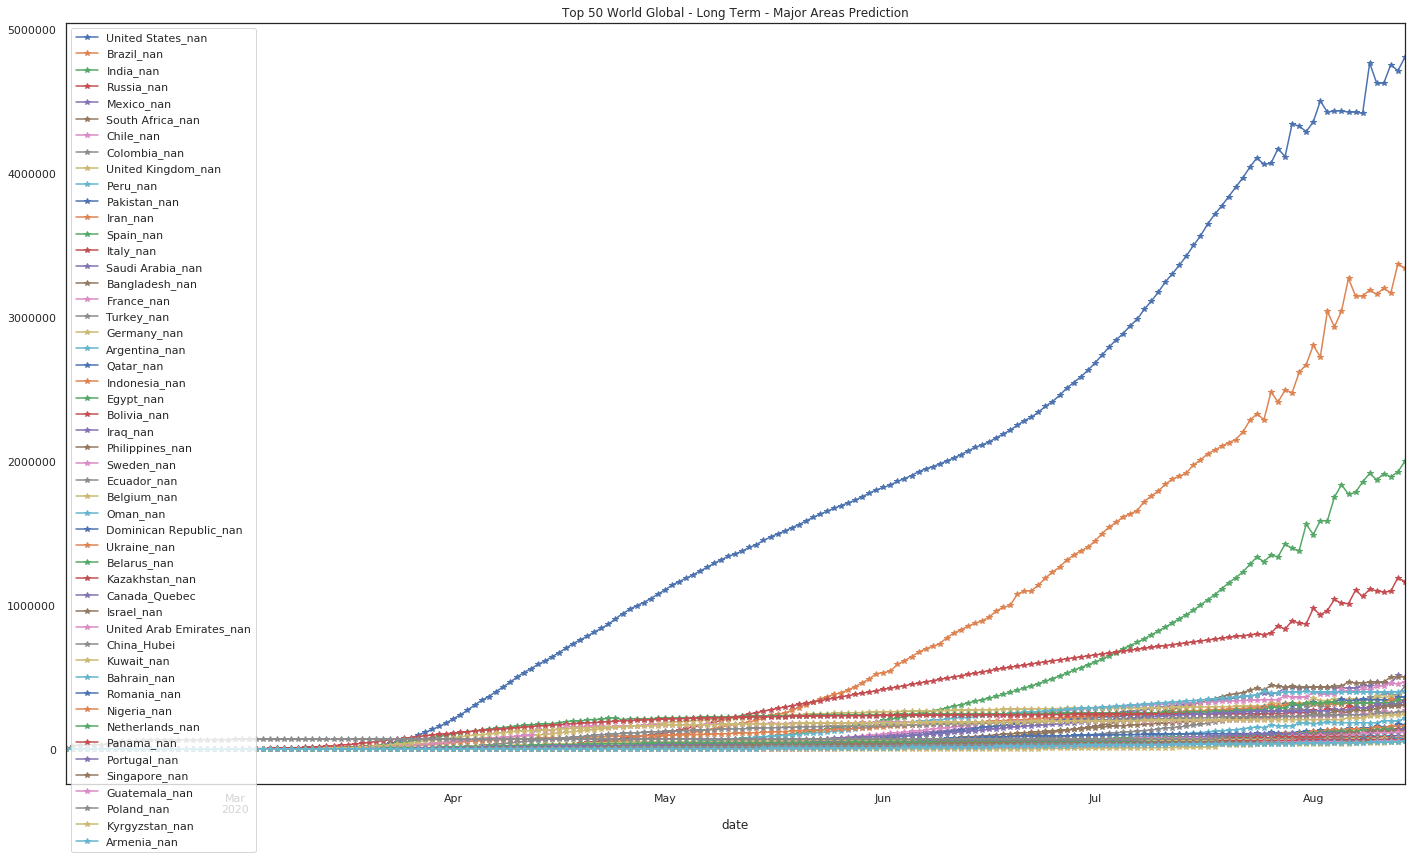

In [77]:
#region=my_train_list
pv2=pred
pv2=pv2.reindex(pv2.max().sort_values(ascending=False).index, axis=1)
pv2[:].iloc[:,0:50].plot(marker='*',figsize=(24,14),title ='Top 50 World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()

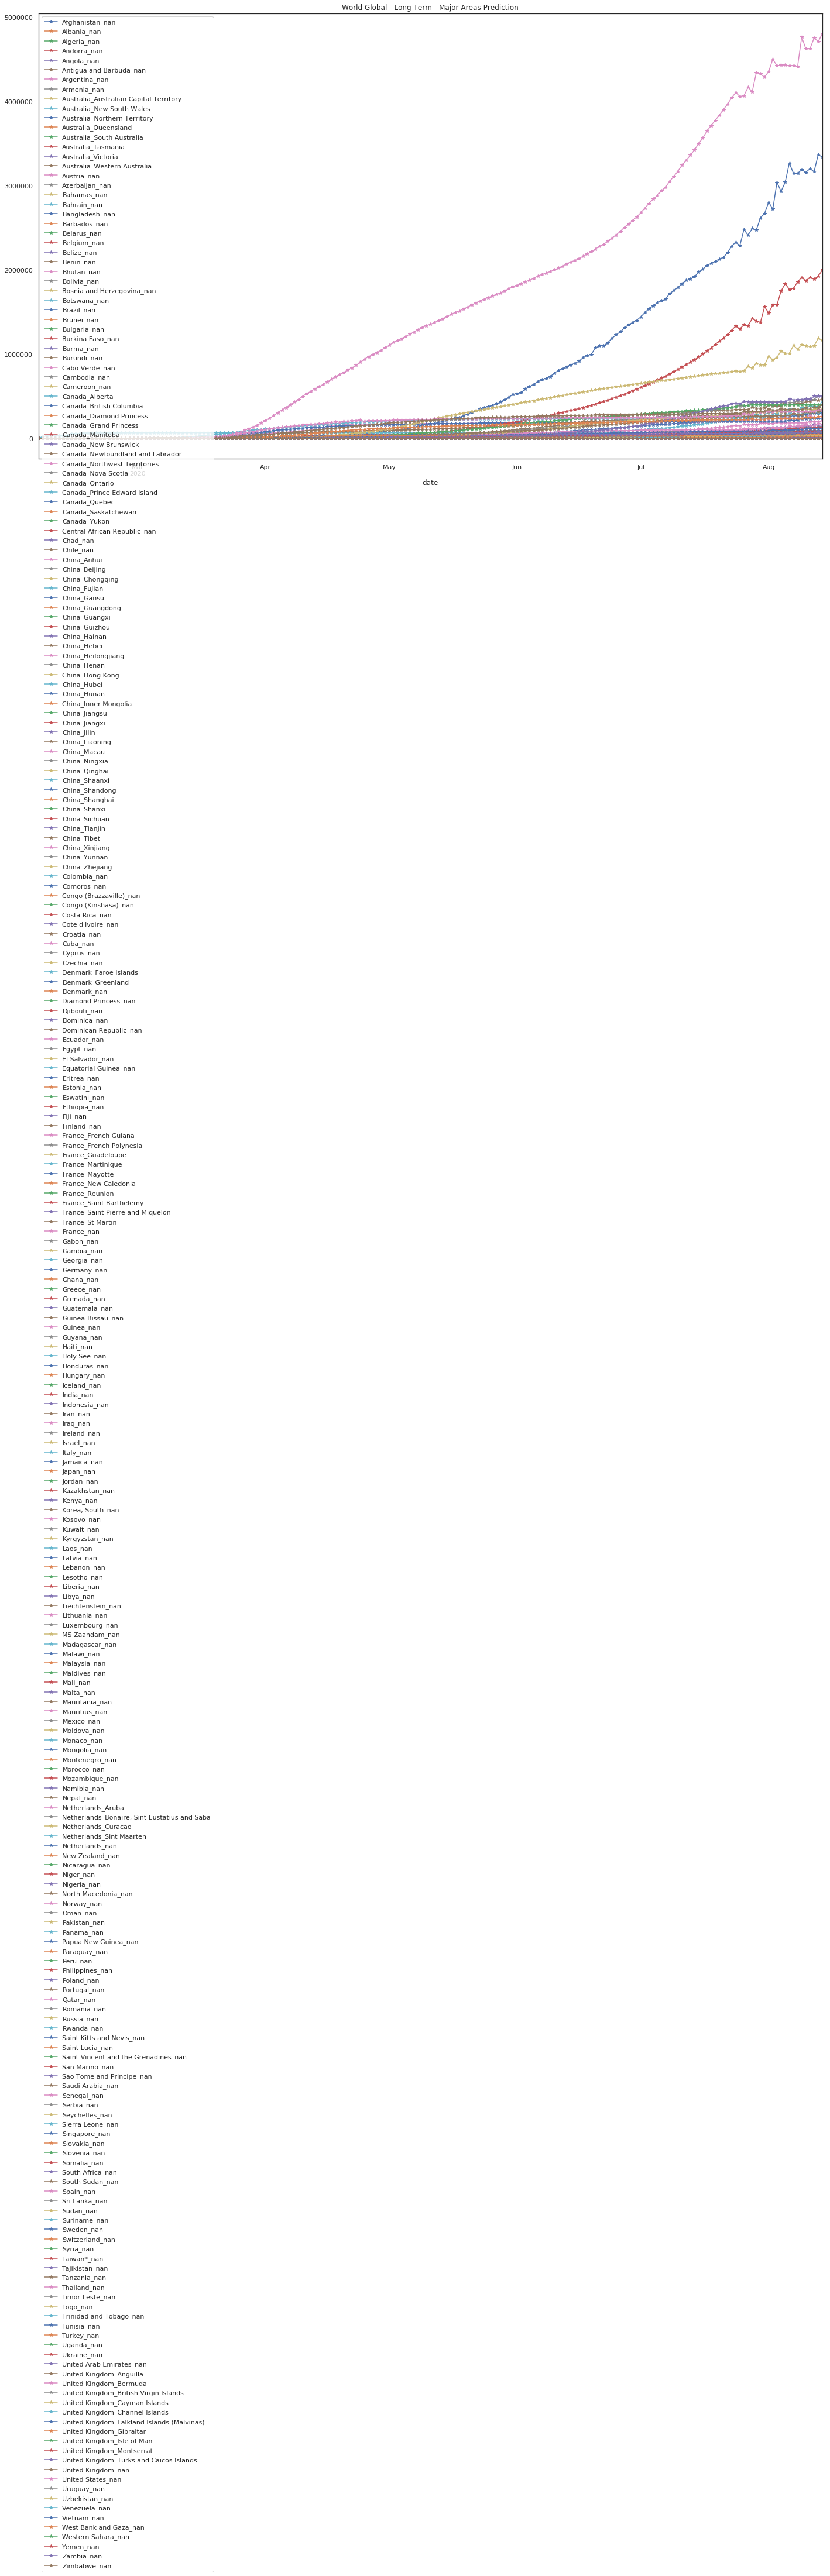

In [78]:
#region=my_train_list
pv2=pred
pv2[:].plot(marker='*',figsize=(24,14),title ='World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()


## Prediction Heatmap

In [79]:
pv1=pv2[:] #p  #p2.append(p3).append(p4).append(p5).append(p6).append(p8).append(p9).append(p11)
p=pd.DataFrame(pv1)

In [80]:
p[45:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-03-22             38.0         87.0        203.0        223.0   
2020-03-23             60.0        104.0        275.0        290.0   
2020-03-24             54.0        119.0        281.0        241.0   
2020-03-25            109.0        141.0        324.0        183.0   
2020-03-26            109.0        167.0        373.0        205.0   
2020-03-27            120.0        200.0        458.0        245.0   
2020-03-28            143.0        204.0        488.0        288.0   
2020-03-29            135.0        217.0        531.0        325.0   
2020-03-30            147.0        238.0        596.0        340.0   
2020-03-31            226.0        245.0        679.0        385.0   
2020-04-01            191.0        269.0        848.0        376.0   
2020-04-02            291.0        281.0        974.0        392.0   
2020-04-03            317.0        296.0       1112.0        444.0   
2020-04-04            302.0        330.0       1343.0        439.0   
2020-04-05            341.0        360.0       1365.0        466.0   
2020-04-06            417.0        387.0       1446.0        501.0   
2020-04-07            403.0        398.0       1603.0        525.0   
2020-04-08            486.0        400.0       1598.0        545.0   
2020-04-09            481.0        428.0       1732.0        564.0   
2020-04-10            530.0        432.0       1814.0        583.0   
2020-04-11            575.0        434.0       1882.0        601.0   
2020-04-12            605.0        456.0       1931.0        601.0   
2020-04-13            667.0        462.0       2044.0        638.0   
2020-04-14            731.0        486.0       2099.0        646.0   
2020-04-15            768.0        487.0       2200.0        659.0   
2020-04-16            857.0        513.0       2290.0        673.0   
2020-04-17            906.0        542.0       2402.0        673.0   
2020-04-18            980.0        560.0       2576.0        696.0   
2020-04-19            988.0        561.0       2669.0        704.0   
2020-04-20           1078.0        582.0       2753.0        713.0   
...                     ...          ...          ...          ...   
2020-07-16          35282.0       3834.0      21381.0        862.0   
2020-07-17          35163.0       3952.0      21985.0        877.0   
2020-07-18          35401.0       3978.0      22592.0        880.0   
2020-07-19          35439.0       4112.0      23210.0        880.0   
2020-07-20          35680.0       4184.0      23717.0        880.0   
2020-07-21          35676.0       4250.0      24394.0        884.0   
2020-07-22          35756.0       4397.0      24980.0        884.0   
2020-07-23          35878.0       4427.0      25570.0        889.0   
2020-07-24          36129.0       4561.0      26185.0        889.0   
2020-07-25          35947.0       4504.0      28013.0        929.0   
2020-07-26          38351.0       4503.0      27064.0        929.0   
2020-07-27          37364.0       4751.0      28622.0        929.0   
2020-07-28          37364.0       5064.0      31440.0        929.0   
2020-07-29          37649.0       4871.0      29867.0        958.0   
2020-07-30          39682.0       4873.0      30931.0        958.0   
2020-07-31          40222.0       5172.0      30910.0       1011.0   
2020-08-01          39536.0       5061.0      35020.0       1011.0   
2020-08-02          39645.0       5061.0      33206.0       1067.0   
2020-08-03          39859.0       5078.0      33055.0       1067.0   
2020-08-04          43251.0       5032.0      33461.0       1067.0   
2020-08-05          41712.0       5290.0      33462.0       1067.0   
2020-08-06          41564.0       5174.0      33372.0       1067.0   
2020-08-07          41924.0       5601.0      33373.0       1067.0   
2020-08-08          41902.0       5544.0      32924.0       1067.0   
2020-08-09

In [81]:
pfname='data/p+'+str(num_days_R_prediction)+'_confirmed_daily.csv'
p.to_csv(pfname, index = False, header=True)

In [82]:
#!pip install gmplot
# Import the necessary libraries
import pandas as pd
import gmplot
# For improved table display in the notebook
#from IPython.display import display
import random 

In [83]:
heatmap=confirmed[['region','Lat','Long']]
p_m=p.T # pred.T #
### JOAO - Change Global HeapMap print - USA is too small, as USA States datasets are not used! 
#heatmap=heatmap[heatmap['region'].isin(region)]  ## heatmap for region dataset only 
heatmap=heatmap[heatmap['region'].isin(confirmed['region'])] ## Global heatmap
p_m=p_m.reset_index()
heatmap_m=heatmap.merge(p_m,how='left',on='region')


In [84]:
heatmap_m[:]

region        Lat        Long  \
0                                 Afghanistan_nan  33.939110   67.709953   
1                                     Albania_nan  41.153300   20.168300   
2                                     Algeria_nan  28.033900    1.659600   
3                                     Andorra_nan  42.506300    1.521800   
4                                      Angola_nan -11.202700   17.873900   
5                         Antigua and Barbuda_nan  17.060800  -61.796400   
6                                   Argentina_nan -38.416100  -63.616700   
7                                     Armenia_nan  40.069100   45.038200   
8          Australia_Australian Capital Territory -35.473500  149.012400   
9                       Australia_New South Wales -33.868800  151.209300   
10                   Australia_Northern Territory -12.463400  130.845600   
11                           Australia_Queensland -27.469800  153.025100   
12                      Australia_South Australia -34.928500  138.600700   
13                             Australia_Tasmania -42.882100  147.327200   
14                             Australia_Victoria -37.813600  144.963100   
15                    Australia_Western Australia -31.950500  115.860500   
16                                    Austria_nan  47.516200   14.550100   
17                                 Azerbaijan_nan  40.143100   47.576900   
18                                    Bahamas_nan  25.025885  -78.035889   
19                                    Bahrain_nan  26.027500   50.550000   
20                                 Bangladesh_nan  23.685000   90.356300   
21                                   Barbados_nan  13.193900  -59.543200   
22                                    Belarus_nan  53.709800   27.953400   
23                                    Belgium_nan  50.833300    4.469936   
24                                      Benin_nan   9.307700    2.315800   
25                                     Bhutan_nan  27.514200   90.433600   
26                                    Bolivia_nan -16.290200  -63.588700   
27                     Bosnia and Herzegovina_nan  43.915900   17.679100   
28                                     Brazil_nan -14.235000  -51.925300   
29                                     Brunei_nan   4.535300  114.727700   
..                                            ...        ...         ...   
238                               Timor-Leste_nan  -8.874217  125.727539   
239                                    Belize_nan  17.189900  -88.497600   
240                                      Laos_nan  19.856270  102.495496   
241                                     Libya_nan  26.335100   17.228331   
242                        West Bank and Gaza_nan  31.952200   35.233200   
243                             Guinea-Bissau_nan  11.803700  -15.180400   
244                                      Mali_nan  17.570692   -3.996166   
245                     Saint Kitts and Nevis_nan  17.357822  -62.782998   
246                  Canada_Northwest Territories  64.825500 -124.845700   
247                                  Canada_Yukon  64.282300 -135.000000   
248                                    Kosovo_nan  42.602636   20.902977   
249                                     Burma_nan  21.916200   95.956000   
250                       United Kingdom_Anguilla  18.220600  -63.068600   
251         United Kingdom_British Virgin Islands  18.420700  -64.640000   
252       United Kingdom_Turks and Caicos Islands  21.694000  -71.797900   
253                                MS Zaandam_nan   0.000000    0.000000   
254                                  Botswana_nan -22.328500   24.684900   
255                                   Burundi_nan  -3.373100   29.918900   
256                              Sierra Leone_nan   8.460555  -11.779889   
257  Netherlands_Bonaire, Sint Eustatius and Saba  12.178400  -68.238500   
258                                    Malawi_nan -13.254300   34.301500   
259    United K

In [85]:
#!pip install folium
import folium
import re

lat=40.99474
lang=6.87237

p21_cluster=folium.Map(location=[lat,lang],zoom_start=2)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
ndayarray=-1-num_days_R_prediction

for lat,lng,num,totpred,ldaygrowth in zip(heatmap_m.Lat,heatmap_m.Long,range(0,heatmap_m.shape[0]), heatmap_m[heatmap_m.columns[-1]],  (heatmap_m[heatmap_m.columns[-1]]-heatmap_m[heatmap_m.columns[ndayarray]])/ndaysavg ):
    use_color=heatmap_m['region'][num][0]
    print_region=re.sub('_nan',  '', heatmap_m['region'][num])
    popup = folium.Popup( print_region+' ConfirmedPred='+str(round(totpred))+' 1DayChangePred='+str(round(ldaygrowth))+' Date='+date_pred , parse_html=True)
    #
    folium.Marker(
                    [lat,lng],
                    popup=popup,
                    icon=folium.Icon(color=colors[use_color])
            ).add_to(p21_cluster)
p21_cluster

In [86]:
# Top 50 Regions in the World impacted
region_m2=region[:50]
heatmap_m2=heatmap_m[heatmap_m['region'].isin(region_m2)].reset_index()
#
heatmap_m2[:]

index                    region        Lat        Long  \
0       6             Argentina_nan -38.416100  -63.616700   
1       7               Armenia_nan  40.069100   45.038200   
2      19               Bahrain_nan  26.027500   50.550000   
3      20            Bangladesh_nan  23.685000   90.356300   
4      22               Belarus_nan  53.709800   27.953400   
5      23               Belgium_nan  50.833300    4.469936   
6      26               Bolivia_nan -16.290200  -63.588700   
7      28                Brazil_nan -14.235000  -51.925300   
8      44             Canada_Quebec  52.939900  -73.549100   
9      48                 Chile_nan -35.675100  -71.543000   
10     62               China_Hubei  30.975600  112.270700   
11     82              Colombia_nan   4.570900  -74.297300   
12     96    Dominican Republic_nan  18.735700  -70.162700   
13     97               Ecuador_nan  -1.831200  -78.183400   
14     98                 Egypt_nan  26.820553   30.802498   
15    116                France_nan  46.227600    2.213700   
16    121               Germany_nan  51.165691   10.451526   
17    124             Guatemala_nan  15.783500  -90.230800   
18    132                 India_nan  20.593684   78.962880   
19    133             Indonesia_nan  -0.789300  113.921300   
20    134                  Iran_nan  32.427908   53.688046   
21    135                  Iraq_nan  33.223191   43.679291   
22    137                Israel_nan  31.046051   34.851612   
23    138                 Italy_nan  41.871940   12.567380   
24    142            Kazakhstan_nan  48.019600   66.923700   
25    145                Kuwait_nan  29.311660   47.481766   
26    146            Kyrgyzstan_nan  41.204380   74.766098   
27    160                Mexico_nan  23.634500 -102.552800   
28    171           Netherlands_nan  52.132600    5.291300   
29    175               Nigeria_nan   9.082000    8.675300   
30    178                  Oman_nan  21.512583   55.923255   
31    179              Pakistan_nan  30.375300   69.345100   
32    180                Panama_nan   8.538000  -80.782100   
33    183                  Peru_nan  -9.190000  -75.015200   
34    184           Philippines_nan  12.879721  121.774017   
35    185                Poland_nan  51.919400   19.145100   
36    186              Portugal_nan  39.399900   -8.224500   
37    187                 Qatar_nan  25.354800   51.183900   
38    188               Romania_nan  45.943200   24.966800   
39    189                Russia_nan  61.524010  105.318756   
40    194          Saudi Arabia_nan  23.885942   45.079162   
41    198             Singapore_nan   1.283300  103.833300   
42    202          South Africa_nan -30.559500   22.937500   
43    203                 Spain_nan  40.463667   -3.749220   
44    207                Sweden_nan  60.128161   18.643501   
45    215                Turkey_nan  38.963700   35.243300   
46    217               Ukraine_nan  48.379400   31.165600   
47    218  United Arab Emirates_nan  23.424076   53.847818   
48    225        United Kingdom_nan  55.378100   -3.436000   
49    227         United States_nan  40.000000 -100.000000   

    2020-02-06 00:00:00  2020-02-07 00:00:00  2020-02-08 00:00:00  \
0                   9.0                  9.0                  9.0   
1                   9.0                  9.0                  9.0   
2                   9.0                  9.0                  9.0   
3                   9.0                  9.0                  9.0   
4                   9.0                  9.0                  9.0   
5                   6.0                  3.0                  4.0   
6                   9.0                  9.0                  9.0   
7                   9.0                  9.0                  9.0   
8                   9.0                  9.0                  9.0   
9                   9.0                  9.0                  9.0   
10               -433.0              22112.0              27041.0   
11           

In [87]:
import folium
import re

lat=40.99474
lang=6.87237

p21_reg_cluster=folium.Map(location=[lat,lang],zoom_start=2)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_reg_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
ndayarray=-1-num_days_R_prediction

for lat2,lng2,num2,totpred2,ldaygrowth2 in zip(heatmap_m2.Lat,heatmap_m2.Long,range(0,heatmap_m2.shape[0]), heatmap_m2[heatmap_m2.columns[-1]], (heatmap_m2[heatmap_m2.columns[-1]]-heatmap_m2[heatmap_m2.columns[ndayarray]])/ndaysavg ):
    use_color2=heatmap_m2['region'][num2][0]
    print_region=re.sub('_nan',  '', heatmap_m2['region'][num2])
    popup2 = folium.Popup( print_region+' ConfirmedPred='+str(round(totpred2))+' 1DayChangePred='+str(round(ldaygrowth2))+' Date='+date_pred , parse_html=True)  
    #
    folium.Marker(
                    [lat2,lng2],
                    popup=popup2,
                    icon=folium.Icon(color=colors[use_color2])
            ).add_to(p21_reg_cluster)
p21_reg_cluster

In [88]:
#
datemap=datetime.today().strftime('%Y-%m-%d')
p21_cluster.save("heatmaps/Heatmap_Folium-Global-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")
#
p21_reg_cluster.save("heatmaps/Heatmap_Folium-Regional-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")

In [89]:
print("Stats and Forecast Done for Today!")
print("I'm done with this past month of March, April and May!")
print(" April-May-June-July are going to be hard with this Global Lock-Down!")

Stats and Forecast Done for Today!
I'm done with this past month of March, April and May!
 April-May-June-July are going to be hard with this Global Lock-Down!


In [90]:
exit()